DOwnload Data

In [5]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import yfinance as yf
import ta
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')



# --- CONFIGURATION ---
PROJECT_ROOT_ABSOLUTE = "/home/onyxia/work/Gestion-portefeuille/" 
ROOT_DIR = Path(PROJECT_ROOT_ABSOLUTE)
OUTPUT_PATH_FINAL = ROOT_DIR / "data" / "raw"
OUTPUT_PATH_FINAL.mkdir(parents=True, exist_ok=True)


CAC40_TICKERS = [
    "AI.PA", "AIR.PA", "ALO.PA", "MT.AS", "ATO.PA", "CS.PA", "BNP.PA",
    "EN.PA", "CAP.PA", "CA.PA", "DSY.PA", "EL.PA", "ENGI.PA", "ERF.PA",
    "RMS.PA", "KER.PA", "OR.PA", "LR.PA", "MC.PA", "ML.PA", "ORA.PA",
    "RI.PA", "PUB.PA", "RNO.PA", "SAF.PA", "SGO.PA", "SAN.PA", "SU.PA",
    "GLE.PA", "STLAP.PA", "STMPA.PA", "TEP.PA", "HO.PA", "TTE.PA",
    "URW.PA", "VIE.PA", "DG.PA", "VIV.PA", "WLN.PA", "FR.PA"
]


end_date = datetime.today().strftime('%Y-%m-%d')  # Ou date fixe '2025-12-25'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*10)  # 10 ans


print(f" Téléchargement CAC40 Dataset Global")
print(f"   Tickers : {len(CAC40_TICKERS)}")
print(f"   Période : {start_date.date()} → {end_date}")


# --- TÉLÉCHARGEMENT GROUPÉ (comme S&P500) ---
df = yf.download(
    tickers=CAC40_TICKERS,
    start=start_date,
    end=end_date,
    auto_adjust=False,
    progress=True
).stack()

# --- RESTRUCTURATION (comme S&P500) ---
df.index.names = ['date', 'ticker']
df.columns = df.columns.str.lower()


print(f"\n Dataset CAC40 créé !")
print(f"   Shape : {df.shape}")
print(f"   Tickers : {df.index.get_level_values('ticker').nunique()}")
print(f"   Période : {df.index.get_level_values('date').min().date()} → {df.index.get_level_values('date').max().date()}")


# --- APERÇU ---
print("\n Aperçu des données :")
#print(df.head(10000))

df.index.names = ['date', 'ticker']

df.columns = df.columns.str.lower()

df




 Téléchargement CAC40 Dataset Global
   Tickers : 40
   Période : 2016-01-04 → 2026-01-01


[*********************100%***********************]  40 of 40 completed


 Dataset CAC40 créé !
   Shape : (100572, 6)
   Tickers : 40
   Période : 2016-01-04 → 2025-12-31

 Aperçu des données :


Price                adj close        close         high          low  \
date       ticker                                                       
2016-01-04 AI.PA     54.348301    67.091957    68.489014    66.559746   
           AIR.PA    52.824345    60.860001    61.869999    60.160000   
           ALO.PA    21.622499    25.675690    26.194954    25.527328   
           ATO.PA  3866.508057  4255.194824  4346.740723  4230.330566   
           BNP.PA    29.206684    51.220001    51.790001    50.619999   
...                        ...          ...          ...          ...   
2025-12-31 TTE.PA    55.590000    55.590000    55.630001    55.389999   
           URW.PA    92.760002    92.760002    93.300003    92.279999   
           VIE.PA    29.719999    29.719999    29.750000    29.590000   
           VIV.PA     2.366000     2.366000     2.369000     2.347000   
           WLN.PA     1.562000     1.562000     1.642000     1.562000   

Price                     open     volume  
date       ticker                          
2016-01-04 AI.PA     68.422493  2043163.0  
           AIR.PA    61.150002  2885672.0  
           ALO.PA    26.120773  1925483.0  
           ATO.PA  4346.740723     6147.0  
           BNP.PA    51.750000  4769816.0  
...                        ...        ...  
2025-12-31 TTE.PA    55.590000  1609862.0  
           URW.PA    93.300003   181051.0  
           VIE.PA    29.750000   467813.0  
           VIV.PA     2.360000   570436.0  
           WLN.PA     1.642000  1055538.0  

[100572 rows x 6 columns]

## Exports dataframe

In [6]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import yfinance as yf
import ta
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

# --- CONFIGURATION ---
PROJECT_ROOT_ABSOLUTE = "/home/onyxia/work/Gestion-portefeuille/" 
ROOT_DIR = Path(PROJECT_ROOT_ABSOLUTE)
OUTPUT_PATH_FINAL = ROOT_DIR / "data" / "raw"
OUTPUT_PATH_FINAL.mkdir(parents=True, exist_ok=True)

CAC40_TICKERS = [
    "AI.PA", "AIR.PA", "ALO.PA", "MT.AS", "ATO.PA", "CS.PA", "BNP.PA",
    "EN.PA", "CAP.PA", "CA.PA", "DSY.PA", "EL.PA", "ENGI.PA", "ERF.PA",
    "RMS.PA", "KER.PA", "OR.PA", "LR.PA", "MC.PA", "ML.PA", "ORA.PA",
    "RI.PA", "PUB.PA", "RNO.PA", "SAF.PA", "SGO.PA", "SAN.PA", "SU.PA",
    "GLE.PA", "STLAP.PA", "STMPA.PA", "TEP.PA", "HO.PA", "TTE.PA",
    "URW.PA", "VIE.PA", "DG.PA", "VIV.PA", "WLN.PA", "FR.PA"
]

end_date = datetime.today().strftime('%Y-%m-%d')
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*10)

print(f"📥 Téléchargement CAC40 Dataset Global")
print(f"   Tickers : {len(CAC40_TICKERS)}")
print(f"   Période : {start_date.date()} → {end_date}")

# --- TÉLÉCHARGEMENT ---
df = yf.download(
    tickers=CAC40_TICKERS,
    start=start_date,
    end=end_date,
    auto_adjust=False,
    progress=True
).stack()

# --- RESTRUCTURATION ---
df.index.names = ['date', 'ticker']
df.columns = df.columns.str.lower()

print(f"\n✅ Dataset CAC40 créé !")
print(f"   Shape : {df.shape}")
print(f"   Période : {df.index.get_level_values('date').min().date()} → {df.index.get_level_values('date').max().date()}")

# =============================================================================
# EXPORT LATEX : DEBUT + FIN
# =============================================================================

# Prendre les 5 premières lignes (début) et 5 dernières (fin)
df_debut = df.head(5)
df_fin = df.tail(5)

# Combiner avec une ligne de séparation visuelle
df_periode = pd.concat([df_debut, df_fin])

# Reset index pour afficher date et ticker comme colonnes
df_export = df_periode.reset_index()

# Exporter en LaTeX
latex_code = df_export.to_latex(
    index=False,  # Pas de numéros de ligne
    float_format="%.2f",  # 2 décimales
    caption="Aperçu des données CAC40 : début et fin de période",
    label="tab:cac40_apercu",
    column_format='ll' + 'r'*6,  # date et ticker alignés à gauche, chiffres à droite
    escape=False
)

# Sauvegarder
latex_file = OUTPUT_PATH_FINAL / "cac40_apercu_periode.tex"
with open(latex_file, 'w', encoding='utf-8') as f:
    f.write(latex_code)

print(f"\n📄 Tableau LaTeX exporté : {latex_file}")
print(f"   Lignes exportées : {len(df_export)} (5 début + 5 fin)")
print(f"\n   Total observations : {df.shape[0]:,}")


📥 Téléchargement CAC40 Dataset Global
   Tickers : 40
   Période : 2016-01-04 → 2026-01-01


[*********************100%***********************]  40 of 40 completed



✅ Dataset CAC40 créé !
   Shape : (100572, 6)
   Période : 2016-01-04 → 2025-12-31

📄 Tableau LaTeX exporté : /home/onyxia/work/Gestion-portefeuille/data/raw/cac40_apercu_periode.tex
   Lignes exportées : 10 (5 début + 5 fin)

   Total observations : 100,572


## Calculate features and technical indicators for each stock.

* Garman-Klass Volatility
* RSI: Relative Strength Index if an actif is overbought or oversold
* Bollinger Bands : Side where price is on over-extension .
* ATR : Average True Range : Vol moyenne de prix 
* MACD : Moving Average Convergence Divergence : Momentum


\begin{equation}
\text{Garman-Klass Volatility} = \frac{(\ln(\text{High}) - \ln(\text{Low}))^2}{2} - (2\ln(2) - 1)(\ln(\text{Adj Close}) - \ln(\text{Open}))^2
\end{equation}

In [7]:
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands, AverageTrueRange
from ta.trend import MACD
import numpy as np
import pandas as pd

# 1. Garman-Klass Volatility (reste identique)
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)


# 2. RSI avec la bibliothèque ta
def compute_rsi(stock_data):
    if len(stock_data) < 20:
        return pd.Series(np.nan, index=stock_data.index)
    rsi_indicator = RSIIndicator(close=stock_data, window=20)
    return rsi_indicator.rsi()

df['rsi'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_rsi)


# 3. Bollinger Bands
def compute_bb_low(stock_data):
    if len(stock_data) < 20:
        return pd.Series(np.nan, index=stock_data.index)
    bb = BollingerBands(close=np.log1p(stock_data), window=20, window_dev=2)
    return bb.bollinger_lband()

def compute_bb_mid(stock_data):
    if len(stock_data) < 20:
        return pd.Series(np.nan, index=stock_data.index)
    bb = BollingerBands(close=np.log1p(stock_data), window=20, window_dev=2)
    return bb.bollinger_mavg()

def compute_bb_high(stock_data):
    if len(stock_data) < 20:
        return pd.Series(np.nan, index=stock_data.index)
    bb = BollingerBands(close=np.log1p(stock_data), window=20, window_dev=2)
    return bb.bollinger_hband()

df['bb_low'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_bb_low)
df['bb_mid'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_bb_mid)
df['bb_high'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_bb_high)


# 4. ATR
def compute_atr(stock_data):
    if len(stock_data) < 14:
        return pd.Series(np.nan, index=stock_data.index)
    atr_indicator = AverageTrueRange(
        high=stock_data['high'],
        low=stock_data['low'],
        close=stock_data['close'],
        window=14
    )
    atr = atr_indicator.average_true_range()
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)


# 5. MACD
def compute_macd(stock_data):
    if len(stock_data) < 26:
        return pd.Series(np.nan, index=stock_data.index)
    macd_indicator = MACD(
        close=stock_data['adj close'],
        window_slow=26,
        window_fast=12,
        window_sign=9
    )
    macd = macd_indicator.macd()
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False).apply(compute_macd)


# 6. Euro Volume (reste identique)
df['euro_volume'] = (df['adj close']*df['volume'])/1e6

df


Price                adj close        close         high          low  \
date       ticker                                                       
2016-01-04 AI.PA     54.348305    67.091957    68.489014    66.559746   
           AIR.PA    52.824345    60.860001    61.869999    60.160000   
           ALO.PA    21.622498    25.675690    26.194954    25.527328   
           ATO.PA  3866.508057  4255.194824  4346.740723  4230.330566   
           BNP.PA    29.206688    51.220001    51.790001    50.619999   
...                        ...          ...          ...          ...   
2025-12-31 TTE.PA    55.590000    55.590000    55.630001    55.389999   
           URW.PA    92.760002    92.760002    93.300003    92.279999   
           VIE.PA    29.719999    29.719999    29.750000    29.590000   
           VIV.PA     2.366000     2.366000     2.369000     2.347000   
           WLN.PA     1.562000     1.562000     1.642000     1.562000   

Price                     open     volume  garman_klass_vol        rsi  \
date       ticker                                                        
2016-01-04 AI.PA     68.422493  2043163.0         -0.020078        NaN   
           AIR.PA    61.150002  2885672.0         -0.007882        NaN   
           ALO.PA    26.120773  1925483.0         -0.013465        NaN   
           ATO.PA  4346.740723     6147.0         -0.004926        NaN   
           BNP.PA    51.750000  4769816.0         -0.126140        NaN   
...                        ...        ...               ...        ...   
2025-12-31 TTE.PA    55.590000  1609862.0          0.000009  57.739085   
           URW.PA    93.300003   181051.0          0.000047  57.349068   
           VIE.PA    29.750000   467813.0          0.000014  55.599350   
           VIV.PA     2.360000   570436.0          0.000041  35.956968   
           WLN.PA     1.642000  1055538.0          0.000284  44.041237   

Price                bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2016-01-04 AI.PA        NaN       NaN       NaN -2.497688       NaN   
           AIR.PA       NaN       NaN       NaN -2.384094       NaN   
           ALO.PA       NaN       NaN       NaN -2.265933       NaN   
           ATO.PA       NaN       NaN       NaN -0.685371       NaN   
           BNP.PA       NaN       NaN       NaN -3.493266       NaN   
...                     ...       ...       ...       ...       ...   
2025-12-31 TTE.PA  4.006166  4.027883  4.049599 -0.787263  0.156883   
           URW.PA  4.504570  4.528080  4.551590 -0.963315  0.134643   
           VIE.PA  3.399612  3.413694  3.427776 -0.414564  0.235085   
           VIV.PA  1.201938  1.211364  1.220791 -1.672858 -0.357314   
           WLN.PA  0.823589  0.911765  0.999942 -1.394936  0.018139   

Price              euro_volume  
date       ticker               
2016-01-04 AI.PA    111.042445  
           AIR.PA   152.433732  
           ALO.PA    41.633751  
           ATO.PA    23.767425  
           BNP.PA   139.310527  
...                        ...  
2025-12-31 TTE.PA    89.492229  
           URW.PA    16.794291  
           VIE.PA    13.903402  
           VIV.PA     1.349652  
           WLN.PA     1.648750  

[100572 rows x 14 columns]

## Statistics descriptives

In [8]:
df.describe()

Price      adj close          close           high            low  \
count  100572.000000  100572.000000  100572.000000  100572.000000   
mean      188.676264     201.044258     203.584713     198.652284   
std       664.637962     692.795078     703.503874     684.290556   
min         1.313000       1.313000       1.344000       1.310000   
25%        22.018068      25.434999      25.770000      25.105000   
50%        47.477432      55.430000      56.099998      54.779999   
75%       105.835615     115.650002     116.690987     114.590345   
max     10130.000000   10130.000000   17300.000000    7814.000000   

Price           open        volume  garman_klass_vol           rsi  \
count  100572.000000  1.005720e+05     100572.000000  99812.000000   
mean      201.153089  1.945134e+06         -0.015472     52.685246   
std       693.881879  2.653304e+06          0.029961     11.634986   
min         1.312000  0.000000e+00         -0.179362      8.608048   
25%        25.455000  4.224805e+05         -0.015189     45.207388   
50%        55.480000  1.002741e+06         -0.003722     52.377411   
75%       115.599998  2.401083e+06         -0.000427     59.580159   
max     14300.000000  1.235753e+08          0.285452    100.000000   

Price        bb_low        bb_mid       bb_high            atr          macd  \
count  99812.000000  99812.000000  99812.000000  100572.000000  9.957200e+04   
mean       3.941270      3.997861      4.054452       0.000000  4.567020e-18   
std        1.292197      1.291727      1.297364       0.999806  9.998041e-01   
min       -0.247272      0.905743      0.982820      -4.641697 -9.873887e+00   
25%        3.063826      3.136186      3.205443      -0.708071 -4.674055e-01   
50%        3.826758      3.883870      3.933752      -0.157710  2.281191e-02   
75%        4.624167      4.669534      4.718083       0.508447  5.265257e-01   
max        8.842873      8.861260     11.413257      13.518444  1.348422e+01   

Price    euro_volume  
count  100572.000000  
mean       71.263478  
std        66.175273  
min         0.000000  
25%        28.621102  
50%        51.962551  
75%        93.558395  
max      1389.033833

## Aggregate to Monthly level

In [9]:
last_cols = [c for c in df.columns.unique(0) if c not in ['euro_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]

data = (pd.concat([df.unstack('ticker')['euro_volume'].resample('M').mean().stack('ticker').to_frame('euro_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()
                  

data

euro_volume    adj close  garman_klass_vol        rsi  \
date       ticker                                                          
2016-02-29 AI.PA    102.134199    51.831635         -0.015017  51.548137   
           AIR.PA   153.356178    51.886932         -0.002901  59.227626   
           ALO.PA    26.162160    15.750301         -0.010751  22.121451   
           ATO.PA    28.735082  3453.156250         -0.003053  46.826067   
           BNP.PA   156.458962    24.519472         -0.110281  49.696035   
...                        ...          ...               ...        ...   
2025-12-31 TTE.PA   180.516734    55.590000          0.000009  57.739085   
           URW.PA    35.090172    92.760002          0.000047  57.349068   
           VIE.PA    41.975237    29.719999          0.000014  55.599350   
           VIV.PA     4.294824     2.366000          0.000041  35.956968   
           WLN.PA     4.590789     1.562000          0.000284  44.041237   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2016-02-29 AI.PA   3.919980  3.948250  3.976520 -0.294257 -0.306515  
           AIR.PA  3.789174  3.874439  3.959705 -0.566856 -0.048932  
           ALO.PA  2.761233  2.863208  2.965183 -0.601341 -1.500370  
           ATO.PA  8.058213  8.124742  8.191271  0.029735 -0.331085  
           BNP.PA  3.117052  3.181806  3.246559  1.077801 -0.573321  
...                     ...       ...       ...       ...       ...  
2025-12-31 TTE.PA  4.006166  4.027883  4.049599 -0.787263  0.156883  
           URW.PA  4.504570  4.528080  4.551590 -0.963315  0.134643  
           VIE.PA  3.399612  3.413694  3.427776 -0.414564  0.235085  
           VIV.PA  1.201938  1.211364  1.220791 -1.672858 -0.357314  
           WLN.PA  0.823589  0.911765  0.999942 -1.394936  0.018139  

[4673 rows x 9 columns]

- calculate 5-year rolling average of euro-volume for each stock 

In [10]:
data['euro_volume'] = (data.loc[:, 'euro_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['euro_vol_rank'] = (data.groupby('date')['euro_volume'].rank(ascending=False))

#data = data[data['euro_vol_rank']<150].drop(['euro_volume', 'euro_vol_rank'], axis=1)

data 

euro_volume    adj close  garman_klass_vol        rsi  \
date       ticker                                                          
2016-02-29 AI.PA           NaN    51.831635         -0.015017  51.548137   
           AIR.PA          NaN    51.886932         -0.002901  59.227626   
           ALO.PA          NaN    15.750301         -0.010751  22.121451   
           ATO.PA          NaN  3453.156250         -0.003053  46.826067   
           BNP.PA          NaN    24.519472         -0.110281  49.696035   
...                        ...          ...               ...        ...   
2025-12-31 TTE.PA   225.386058    55.590000          0.000009  57.739085   
           URW.PA    25.148855    92.760002          0.000047  57.349068   
           VIE.PA    44.725095    29.719999          0.000014  55.599350   
           VIV.PA    28.472727     2.366000          0.000041  35.956968   
           WLN.PA    25.540915     1.562000          0.000284  44.041237   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2016-02-29 AI.PA   3.919980  3.948250  3.976520 -0.294257 -0.306515   
           AIR.PA  3.789174  3.874439  3.959705 -0.566856 -0.048932   
           ALO.PA  2.761233  2.863208  2.965183 -0.601341 -1.500370   
           ATO.PA  8.058213  8.124742  8.191271  0.029735 -0.331085   
           BNP.PA  3.117052  3.181806  3.246559  1.077801 -0.573321   
...                     ...       ...       ...       ...       ...   
2025-12-31 TTE.PA  4.006166  4.027883  4.049599 -0.787263  0.156883   
           URW.PA  4.504570  4.528080  4.551590 -0.963315  0.134643   
           VIE.PA  3.399612  3.413694  3.427776 -0.414564  0.235085   
           VIV.PA  1.201938  1.211364  1.220791 -1.672858 -0.357314   
           WLN.PA  0.823589  0.911765  0.999942 -1.394936  0.018139   

                   euro_vol_rank  
date       ticker                 
2016-02-29 AI.PA             NaN  
           AIR.PA            NaN  
           ALO.PA            NaN  
           ATO.PA            NaN  
           BNP.PA            NaN  
...                          ...  
2025-12-31 TTE.PA            2.0  
           URW.PA           37.0  
           VIE.PA           25.0  
           VIV.PA           34.0  
           WLN.PA           36.0  

[4673 rows x 10 columns]

## Calculate Monthly Returns for different horizons as features

In [11]:
def calculate_returns(df):
    """
    Calcule les rendements CUMULÉS (Momentum) avec clipping.
    """
    outlier_cutoff = 0.005 # On coupe les 0.5% des valeurs les plus basses.
    
    # ATTENTION : Vérifiez la fréquence de vos données (voir note plus bas)
    lags = [1, 2, 3, 6, 9, 12] 

    for lag in lags:
        # 1. Calculer la variation totale sur la période (ex: Prix_t / Prix_t-12 - 1)
        returns_raw = df['adj close'].pct_change(lag)
        
        # 2. Calcul des bornes (Expanding Window)
        # min_periods=252 suggère des données journalières (1 an de trading)
        lower_bound = returns_raw.expanding(min_periods=252).quantile(outlier_cutoff)
        upper_bound = returns_raw.expanding(min_periods=252).quantile(1 - outlier_cutoff)
        
        # 3. Clipper et Assigner DIRECTEMENT
        
        df[f'return_{lag}m'] = returns_raw.clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Application
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()
data

euro_volume    adj close  garman_klass_vol        rsi  \
date       ticker                                                          
2017-02-28 AI.PA     75.441250    57.929234         -0.014297  47.545163   
           AIR.PA   108.392802    61.634544         -0.003995  68.219680   
           ALO.PA    18.326209    20.009987         -0.010231  44.279522   
           ATO.PA    23.990370  5828.903809         -0.002527  73.515004   
           BNP.PA   123.070967    32.996243         -0.098947  40.611221   
...                        ...          ...               ...        ...   
2025-12-31 TTE.PA   225.386058    55.590000          0.000009  57.739085   
           URW.PA    25.148855    92.760002          0.000047  57.349068   
           VIE.PA    44.725095    29.719999          0.000014  55.599350   
           VIV.PA    28.472727     2.366000          0.000041  35.956968   
           WLN.PA    25.540915     1.562000          0.000284  44.041237   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2017-02-28 AI.PA   4.045704  4.080779  4.115854 -0.975122 -0.202179   
           AIR.PA  4.017587  4.081975  4.146364 -1.244832  0.299958   
           ALO.PA  3.035918  3.068204  3.100490 -0.931722 -0.235903   
           ATO.PA  8.545794  8.609600  8.673406 -0.036696  0.966910   
           BNP.PA  3.491512  3.556756  3.622001  0.090259 -0.986473   
...                     ...       ...       ...       ...       ...   
2025-12-31 TTE.PA  4.006166  4.027883  4.049599 -0.787263  0.156883   
           URW.PA  4.504570  4.528080  4.551590 -0.963315  0.134643   
           VIE.PA  3.399612  3.413694  3.427776 -0.414564  0.235085   
           VIV.PA  1.201938  1.211364  1.220791 -1.672858 -0.357314   
           WLN.PA  0.823589  0.911765  0.999942 -1.394936  0.018139   

                   euro_vol_rank  return_1m  return_2m  return_3m  return_6m  \
date       ticker                                                              
2017-02-28 AI.PA            10.0   0.019000  -0.035495   0.060574   0.063954   
           AIR.PA            5.0   0.104525   0.103119   0.150158   0.325684   
           ALO.PA           31.0  -0.023809  -0.021012   0.002543   0.080540   
           ATO.PA           29.0   0.132095   0.112219   0.143238   0.264029   
           BNP.PA            3.0  -0.068435  -0.089513   0.006389   0.208859   
...                          ...        ...        ...        ...        ...   
2025-12-31 TTE.PA            2.0  -0.006327   0.046165   0.109289   0.101411   
           URW.PA           37.0   0.012443   0.034806   0.037120   0.143209   
           VIE.PA           25.0   0.014681   0.037347   0.025535  -0.017521   
           VIV.PA           34.0  -0.059618  -0.242152  -0.210807  -0.192216   
           WLN.PA           36.0   0.020915  -0.335602  -0.432000  -0.564296   

                   return_9m  return_12m  
date       ticker                         
2017-02-28 AI.PA    0.083793    0.117642  
           AIR.PA   0.237415    0.187863  
           ALO.PA   0.135357    0.270451  
           ATO.PA   0.366693    0.687993  
           BNP.PA   0.162781    0.345716  
...                      ...         ...  
2025-12-31 TTE.PA  -0.022947    0.123571  
           URW.PA   0.247895    0.336786  
           VIE.PA  -0.020942    0.146628  
           VIV.PA  -0.141821   -0.080451  
           WLN.PA  -0.723931   -0.815758  

[4193 rows x 16 columns]

## Stats return

In [12]:
cols = ["return_1m", "return_2m", "return_3m", "return_6m", "return_9m", "return_12m"]

# Le .round(2) permet d'arrondir à 2 décimales pour plus de clarté
stats = data[cols].describe().T.round(2)

print(stats)

             count  mean   std   min   25%   50%   75%     max
return_1m   4193.0  0.05  2.75 -1.00 -0.04  0.01  0.05  178.02
return_2m   4193.0  0.06  2.62 -1.00 -0.05  0.02  0.08  169.33
return_3m   4193.0  0.06  2.26 -1.00 -0.05  0.03  0.10  146.34
return_6m   4193.0  0.07  1.12 -1.00 -0.07  0.05  0.17   71.27
return_9m   4193.0  0.09  0.84 -1.00 -0.07  0.08  0.23   51.51
return_12m  4193.0  0.12  0.45 -0.99 -0.07  0.10  0.28   19.65


from IPython.display import Markdown, display

markdown_text = r"""
# Les 5 Facteurs Fama-French - Guide Complet CAC40

## 1. Mkt-RF (Market Risk Premium)

**Définition** : Prime de risque du marché = Return du marché - Taux sans risque

$$Mkt-RF_t = R_{M,t} - R_{f,t}$$

**Interprétation** : Mesure le rendement excédentaire pour investir en actions plutôt qu'en obligations.

---

## 2. SMB (Small Minus Big)

**Définition** : Prime de taille = Return des petites capitalisations - Return des grosses capitalisations

$$SMB_t = \frac{1}{2}(Small\ Value_t + Small\ Growth_t) - \frac{1}{2}(Big\ Value_t + Big\ Growth_t)$$

**Interprétation** : Capte l'effet taille. Historiquement, les petites entreprises surperforment les grandes (plus risquées).

---

## 3. HML (High Minus Low)

**Définition** : Prime value = Return des actions value (B/M élevé) - Return des actions growth (B/M faible)

$$HML_t = \frac{1}{2}(Small\ Value_t + Big\ Value_t) - \frac{1}{2}(Small\ Growth_t + Big\ Growth_t)$$

**Book-to-Market** :

$$B/M = \frac{\text{Valeur comptable}}{\text{Capitalisation boursière}}$$

**Interprétation** : Actions "décotées" (value) surperforment les actions "chères" (growth).

---

## 4. RMW (Robust Minus Weak)

**Définition** : Prime de rentabilité = Return des entreprises très rentables - Return des entreprises peu rentables

$$RMW_t = \frac{1}{2}(Small\ Robust_t + Big\ Robust_t) - \frac{1}{2}(Small\ Weak_t + Big\ Weak_t)$$

**Operating Profitability** :

$$OP = \frac{\text{Revenues} - \text{COGS} - \text{SG\&A} - \text{Interest}}{\text{Book Equity}}$$

**Interprétation** : Entreprises rentables (marges élevées) surperforment les entreprises en difficulté.

---

## 5. CMA (Conservative Minus Aggressive)

**Définition** : Prime d'investissement = Return des entreprises conservatrices - Return des entreprises agressives

$$CMA_t = \frac{1}{2}(Small\ Conservative_t + Big\ Conservative_t) - \frac{1}{2}(Small\ Aggressive_t + Big\ Aggressive_t)$$

**Asset Growth** :

$$\text{Investment} = \frac{\Delta \text{Total Assets}}{\text{Total Assets}_{t-1}}$$

**Interprétation** : Entreprises qui investissent peu (prudentes) surperforment celles qui investissent massivement.

---

## Modèle Complet Fama-French 5 Facteurs

$$R_{i,t} - R_{f,t} = \alpha_i + \beta_{i,MKT}(Mkt-RF_t) + \beta_{i,SMB}(SMB_t) + \beta_{i,HML}(HML_t) + \beta_{i,RMW}(RMW_t) + \beta_{i,CMA}(CMA_t) + \varepsilon_{i,t}$$

**Où** :
- $R_{i,t} - R_{f,t}$ : Excess return de l'actif i
- $\alpha_i$ : Jensen's alpha (performance anormale)
- $\beta_{i,j}$ : Sensibilité au facteur j
- $\varepsilon_{i,t}$ : Erreur idiosyncratique

---

## Exemple Global : LVMH dans le CAC40

### Données du mois (Octobre 2025)

| Variable | Valeur |
|----------|--------|
| Return LVMH | +3.5% |
| Taux sans risque (RF) | +0.3% |
| Excess return LVMH | +3.2% |
| **Facteurs du mois** | |
| Mkt-RF | +2.0% |
| SMB | +1.5% |
| HML | -1.0% |
| RMW | +2.5% |
| CMA | +1.8% |

### Betas LVMH (estimés sur 60 mois)

| Facteur | Beta | Interprétation |
|---------|------|----------------|
| **Mkt-RF** | 0.95 | Sensibilité légèrement inférieure au marché |
| **SMB** | -0.35 | Grosse capitalisation (négative) |
| **HML** | -0.60 | Growth stock (B/M faible) |
| **RMW** | +0.75 | Très rentable (marges 30%) |
| **CMA** | +0.50 | Conservatrice (croissance organique) |

### Décomposition du Return LVMH

$$R_{LVMH} - R_f = \alpha + \beta_{MKT} \times Mkt-RF + \beta_{SMB} \times SMB + \beta_{HML} \times HML + \beta_{RMW} \times RMW + \beta_{CMA} \times CMA$$

**Calcul détaillé** :

| Composante | Formule | Contribution |
|------------|---------|--------------|
| **Alpha** | α | +0.50% |
| **Market** | 0.95 × 2.0% | +1.90% |
| **Size** | -0.35 × 1.5% | -0.53% |
| **Value** | -0.60 × (-1.0%) | +0.60% |
| **Profitability** | 0.75 × 2.5% | +1.88% |
| **Investment** | 0.50 × 1.8% | +0.90% |
| **TOTAL** | | **+5.25%** |

### Interprétation

**Pourquoi LVMH a monté de +3.5% ce mois ?**

1. ✅ **Marché positif** (+1.90%) : Le CAC40 monte, LVMH suit (β=0.95)
2. ❌ **Désavantage taille** (-0.53%) : Les petites caps surperforment, LVMH pénalisée
3. ✅ **Growth style** (+0.60%) : Les growth stocks surperforment ce mois
4. ✅ **Haute rentabilité** (+1.88%) : LVMH très profitable
5. ✅ **Discipline de capital** (+0.90%) : LVMH investit prudemment
6. ✅ **Alpha positif** (+0.50%) : Performance inexpliquée = talent/marque LVMH

**Conclusion** : 85% du return LVMH expliqué par les 5 facteurs, 15% = alpha

---

## Tableau Récapitulatif des Facteurs

| Facteur | Formule | Qui gagne ? | Performance US (1963-2023) |
|---------|---------|-------------|---------------------------|
| **Mkt-RF** | R_M - R_f | Actions > Obligations | +8.3% annuel |
| **SMB** | Petites - Grosses | Petites caps | +3.2% annuel |
| **HML** | Value - Growth | Value (B/M élevé) | +4.8% annuel |
| **RMW** | Rentables - Faibles | Rentables (OP élevé) | +3.1% annuel |
| **CMA** | Conservatrices - Agressives | Conservatrices | +3.0% annuel |

**Pouvoir explicatif** : Le modèle FF5 explique **94% de la variance** des returns cross-sectionnels.

---

## Application Pratique CAC40

### Exemples de Tickers par Profil

| Profil | Tickers | Caractéristiques |
|--------|---------|------------------|
| **Value Cyclique** | Renault, SocGen | β_HML > 0, β_RMW < 0 |
| **Growth Qualité** | LVMH, Hermès | β_HML < 0, β_RMW > 0 |
| **Défensif** | Danone, Sanofi | β_MKT < 1, β_RMW > 0 |
| **Cyclique** | TotalEnergies | β_MKT > 1, β_HML > 0 |

**Référence** : Fama & French (2015), *Journal of Financial Economics*, 116(1), 1-22.
"""

display(Markdown(markdown_text))


# Les 5 Facteurs Fama-French 

## 1. Mkt-RF (Market Risk Premium)

**Définition** : Prime de risque du marché = Return du marché - Taux sans risque

**Formule** : Mkt-RF = R_marché - R_sans_risque

**Interprétation** : Mesure le rendement excédentaire pour investir en actions plutôt qu'en obligations.

---

## 2. SMB (Small Minus Big)

**Définition** : Prime de taille = Return des petites caps - Return des grosses caps

**Formule** : SMB = (Small Value + Small Growth)/2 - (Big Value + Big Growth)/2

**Interprétation** : Les petites entreprises surperforment historiquement les grandes (plus risquées).

---

## 3. HML (High Minus Low)

**Définition** : Prime value = Return des actions value - Return des actions growth

**Formule** : HML = (Small Value + Big Value)/2 - (Small Growth + Big Growth)/2

**Book-to-Market** : B/M = Valeur comptable / Capitalisation boursière

**Interprétation** : Actions "décotées" (value) surperforment les actions "chères" (growth).

---

## 4. RMW (Robust Minus Weak)

**Définition** : Prime de rentabilité = Return des entreprises rentables - Return des faibles

**Formule** : RMW = (Small Robust + Big Robust)/2 - (Small Weak + Big Weak)/2

**Operating Profitability** : OP = (Revenues - COGS - SG&A - Interest) / Book Equity

**Interprétation** : Entreprises rentables (marges élevées) surperforment.

---

## 5. CMA (Conservative Minus Aggressive)

**Définition** : Prime d'investissement = Return des conservatrices - Return des agressives

**Formule** : CMA = (Small Conservative + Big Conservative)/2 - (Small Aggressive + Big Aggressive)/2

**Asset Growth** : Investment = Δ Total Assets / Total Assets(t-1)

**Interprétation** : Entreprises prudentes surperforment celles qui investissent massivement.

---

## Modèle Complet

**Formule** :

Return(i) - RF = Alpha + β_MKT × Mkt-RF + β_SMB × SMB + β_HML × HML + β_RMW × RMW + β_CMA × CMA + Erreur

**Légende** :
- Return(i) - RF : Excess return de l'actif i
- Alpha : Jensen's alpha (performance anormale)
- β : Sensibilité aux facteurs
- Erreur : Résidu idiosyncratique

---

## Exemple : LVMH (Octobre 2025)

**Données** :
- Return LVMH : +3.5%
- RF : +0.3%
- Excess return : +3.2%

**Facteurs du mois** :
- Mkt-RF : +2.0%
- SMB : +1.5%
- HML : -1.0%
- RMW : +2.5%
- CMA : +1.8%

**Betas LVMH** :
- β_MKT = 0.95 (suit le marché)
- β_SMB = -0.35 (grosse cap)
- β_HML = -0.60 (growth)
- β_RMW = +0.75 (rentable)
- β_CMA = +0.50 (conservatrice)

**Décomposition du return (+3.2%)** :

1. Alpha : +0.50%
2. Market (0.95 × 2.0%) : +1.90%
3. Size (-0.35 × 1.5%) : -0.53%
4. Value (-0.60 × -1.0%) : +0.60%
5. Profitability (0.75 × 2.5%) : +1.88%
6. Investment (0.50 × 1.8%) : +0.90%

**Total prédit : +5.25%** (résidu : -2.05%)

**Conclusion** : 85% du return LVMH expliqué par les 5 facteurs, 15% = alpha (talent).

---

## Résumé des Facteurs

| Facteur | Qui gagne ? | Performance US (1963-2023) |
|---------|-------------|---------------------------|
| Mkt-RF | Actions > Obligations | +8.3% annuel |
| SMB | Petites caps | +3.2% annuel |
| HML | Value (décoté) | +4.8% annuel |
| RMW | Rentables | +3.1% annuel |
| CMA | Conservatrices | +3.0% annuel |

**Pouvoir explicatif : 94% de la variance**

---

## CAC40 : Exemples

| Profil | Tickers | Betas |
|--------|---------|-------|
| Value Cyclique | Renault, SocGen | β_HML > 0 |
| Growth Qualité | LVMH, Hermès | β_HML < 0, β_RMW > 0 |
| Défensif | Danone, Sanofi | β_MKT < 1 |
| Cyclique | TotalEnergies | β_MKT > 1 |


In [13]:
import pandas_datareader.data as web

# ============================================
# FAMA-FRENCH 5 FACTORS - EUROPE
# ============================================

# Dataset pour l'Europe
factor_data = web.DataReader('Europe_5_Factors',  
                             'famafrench',
                             start='2010')[0].drop('RF', axis=1)

# Conversion timestamp
factor_data.index = factor_data.index.to_timestamp()

# Resample mensuel et conversion en décimales
factor_data = factor_data.resample('M').last().div(100)

factor_data.index.name = 'date'

# Join avec tes returns CAC40
factor_data = factor_data.join(data['return_1m']).sort_index()

factor_data


Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-02-28 AI.PA   0.0068  0.0003 -0.0260  0.0273 -0.0132   0.019000
           AIR.PA  0.0068  0.0003 -0.0260  0.0273 -0.0132   0.104525
           ALO.PA  0.0068  0.0003 -0.0260  0.0273 -0.0132  -0.023809
           ATO.PA  0.0068  0.0003 -0.0260  0.0273 -0.0132   0.132095
           BNP.PA  0.0068  0.0003 -0.0260  0.0273 -0.0132  -0.068435
...                   ...     ...     ...     ...     ...        ...
2025-11-30 TTE.PA  0.0072 -0.0114  0.0242  0.0035  0.0112   0.052827
           URW.PA  0.0072 -0.0114  0.0242  0.0035  0.0112   0.022088
           VIE.PA  0.0072 -0.0114  0.0242  0.0035  0.0112   0.022339
           VIV.PA  0.0072 -0.0114  0.0242  0.0035  0.0112  -0.194106
           WLN.PA  0.0072 -0.0114  0.0242  0.0035  0.0112  -0.349213

[4153 rows x 6 columns]

- Filter out stocks with less than 10 month

In [14]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-02-28 AI.PA   0.0068  0.0003 -0.0260  0.0273 -0.0132   0.019000
           AIR.PA  0.0068  0.0003 -0.0260  0.0273 -0.0132   0.104525
           ALO.PA  0.0068  0.0003 -0.0260  0.0273 -0.0132  -0.023809
           ATO.PA  0.0068  0.0003 -0.0260  0.0273 -0.0132   0.132095
           BNP.PA  0.0068  0.0003 -0.0260  0.0273 -0.0132  -0.068435
...                   ...     ...     ...     ...     ...        ...
2025-11-30 TTE.PA  0.0072 -0.0114  0.0242  0.0035  0.0112   0.052827
           URW.PA  0.0072 -0.0114  0.0242  0.0035  0.0112   0.022088
           VIE.PA  0.0072 -0.0114  0.0242  0.0035  0.0112   0.022339
           VIV.PA  0.0072 -0.0114  0.0242  0.0035  0.0112  -0.194106
           WLN.PA  0.0072 -0.0114  0.0242  0.0035  0.0112  -0.349213

[4153 rows x 6 columns]

- Calcule Rollings Betas

In [15]:
betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas 

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2017-02-28 AI.PA        NaN       NaN       NaN       NaN       NaN
           AIR.PA       NaN       NaN       NaN       NaN       NaN
           ALO.PA       NaN       NaN       NaN       NaN       NaN
           ATO.PA       NaN       NaN       NaN       NaN       NaN
           BNP.PA       NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2025-11-30 TTE.PA  0.428368 -0.782000  1.601550  1.434254  0.892771
           URW.PA  1.083249 -1.084259  0.965836 -0.864154 -1.239270
           VIE.PA  0.705379  0.007384  0.472930 -0.169390  1.127773
           VIV.PA  2.818084 -1.755060 -4.433658  0.496501  8.256088
           WLN.PA -0.478084  3.189253  1.751889 -4.822529 -7.811988

[4153 rows x 5 columns]

- Joining rolling factors data to the main features datafr

In [16]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('ticker').shift()))

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data = data.drop('adj close', axis=1)

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4173 entries, (Timestamp('2017-02-28 00:00:00'), 'AI.PA') to (Timestamp('2025-12-31 00:00:00'), 'WLN.PA')
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   euro_volume       4173 non-null   float64
 1   garman_klass_vol  4173 non-null   float64
 2   rsi               4173 non-null   float64
 3   bb_low            4173 non-null   float64
 4   bb_mid            4173 non-null   float64
 5   bb_high           4173 non-null   float64
 6   atr               4173 non-null   float64
 7   macd              4173 non-null   float64
 8   euro_vol_rank     4173 non-null   float64
 9   return_1m         4173 non-null   float64
 10  return_2m         4173 non-null   float64
 11  return_3m         4173 non-null   float64
 12  return_6m         4173 non-null   float64
 13  return_9m         4173 non-null   float64
 14  return_12m        4173 non-null   float64
 15  Mkt-RF 

## K-Means Clustering

In [17]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Supprimer cluster si existe
if 'cluster' in data.columns:
    data = data.drop('cluster', axis=1)

# Centroids RSI
rsi_centroids = np.array([[30], [45], [55], [70]])

def get_clusters(df):
    if len(df) < 4:
        df['cluster'] = 0
        return df
    
    # Clustering sur RSI
    X_rsi = df[['rsi']].values
    kmeans = KMeans(n_clusters=4, init=rsi_centroids, n_init=1, random_state=0)
    labels = kmeans.fit_predict(X_rsi)
    
    # Réordonner par RSI moyen
    cluster_means = [(i, df.loc[labels==i, 'rsi'].mean() if (labels==i).sum()>0 else 0) for i in range(4)]
    cluster_means.sort(key=lambda x: x[1])
    mapping = {old: new for new, (old, _) in enumerate(cluster_means)}
    
    df['cluster'] = [mapping[l] for l in labels]
    return df

# Appliquer
data = data.dropna(subset=['rsi']).groupby('date', group_keys=False).apply(get_clusters)

data


euro_volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-02-28 AI.PA     75.441250         -0.014297  47.545163  4.045704   
           AIR.PA   108.392802         -0.003995  68.219680  4.017587   
           ALO.PA    18.326209         -0.010231  44.279522  3.035918   
           ATO.PA    23.990370         -0.002527  73.515004  8.545794   
           BNP.PA   123.070967         -0.098947  40.611221  3.491512   
...                        ...               ...        ...       ...   
2025-12-31 TEP.PA    31.667680          0.000076  53.648757  4.063777   
           TTE.PA   225.386058          0.000009  57.739085  4.006166   
           VIE.PA    44.725095          0.000014  55.599350  3.399612   
           VIV.PA    28.472727          0.000041  35.956968  1.201938   
           WLN.PA    25.540915          0.000284  44.041237  0.823589   

                     bb_mid   bb_high       atr      macd  euro_vol_rank  \
date       ticker                                                          
2017-02-28 AI.PA   4.080779  4.115854 -0.975122 -0.202179           10.0   
           AIR.PA  4.081975  4.146364 -1.244832  0.299958            5.0   
           ALO.PA  3.068204  3.100490 -0.931722 -0.235903           31.0   
           ATO.PA  8.609600  8.673406 -0.036696  0.966910           29.0   
           BNP.PA  3.556756  3.622001  0.090259 -0.986473            3.0   
...                     ...       ...       ...       ...            ...   
2025-12-31 TEP.PA  4.113206  4.162635 -1.088318  0.133797           33.0   
           TTE.PA  4.027883  4.049599 -0.787263  0.156883            2.0   
           VIE.PA  3.413694  3.427776 -0.414564  0.235085           25.0   
           VIV.PA  1.211364  1.220791 -1.672858 -0.357314           34.0   
           WLN.PA  0.911765  0.999942 -1.394936  0.018139           36.0   

                   return_1m  ...  return_3m  return_6m  return_9m  \
date       ticker             ...                                    
2017-02-28 AI.PA    0.019000  ...   0.060574   0.063954   0.083793   
           AIR.PA   0.104525  ...   0.150158   0.325684   0.237415   
           ALO.PA  -0.023809  ...   0.002543   0.080540   0.135357   
           ATO.PA   0.132095  ...   0.143238   0.264029   0.366693   
           BNP.PA  -0.068435  ...   0.006389   0.208859   0.162781   
...                      ...  ...        ...        ...        ...   
2025-12-31 TEP.PA   0.043889  ...  -0.023682  -0.248785  -0.299144   
           TTE.PA  -0.006327  ...   0.109289   0.101411  -0.022947   
           VIE.PA   0.014681  ...   0.025535  -0.017521  -0.020942   
           VIV.PA  -0.059618  ...  -0.210807  -0.192216  -0.141821   
           WLN.PA   0.020915  ...  -0.432000  -0.564296  -0.723931   

                   return_12m     Mkt-RF        SMB        HML         RMW  \
date       ticker                                                            
2017-02-28 AI.PA     0.117642   0.797131  -0.897757  -0.230159    0.008553   
           AIR.PA    0.187863   1.213502   0.234012   0.790681    0.365087   
           ALO.PA    0.270451   1.083377   0.422132  -0.292859   -1.904585   
           ATO.PA    0.687993 -40.958313 -16.637934 -19.323056 -109.892297   
           BNP.PA    0.345716   1.269607  -0.082797   1.492590   -1.276753   
...                       ...        ...        ...        ...         ...   
2025-12-31 TEP.PA   -0.220222   0.787280   0.918864  -0.614019    0.131674   
           TTE.PA    0.123571   0.793284  -1.128334   1.168162   -0.083109   
           VIE.PA    0.146628   0.852214   0.053279   0.289508    0.209071   
           VIV.PA   -0.080451   1.042134   0.029370  -0.314974    0.376704   
           WLN.PA   -0.815758   1.117610   0.883478  -0.405449   -1.835663   

                         CMA  cluster  
date       ticker                      
2017-02-28 AI.PA    0.436597        0  
           AIR.PA  -0.032611      

## PACFS

In [28]:
import pandas as pd
import numpy as np

# Supposons que vous avez un DataFrame avec vos features et les clusters RSI
# df_features = DataFrame avec colonnes : ['RSI', 'MACD', 'BB_high', 'Cluster']

def compute_pac_fs(df, cluster_col='cluster'):
    """
    Calcule le PAC-FS pour chaque feature (métrique de Bagnara & Goodarzi 2023)
    """
    features = [col for col in df.columns if col != cluster_col]
    spreads = {}
    
    for feature in features:
        # Moyenne par cluster
        cluster_means = df.groupby(cluster_col)[feature].mean()
        
        # Spread = max - min
        spreads[feature] = cluster_means.max() - cluster_means.min()
    
    # Normalisation
    total_spread = sum(spreads.values())
    pac_fs = {k: (v / total_spread) * 100 for k, v in spreads.items()}
    
    return pd.Series(pac_fs).sort_values(ascending=False)

# Exemple d'utilisation
pac_fs_scores = compute_pac_fs(data)
print(pac_fs_scores)

# Résultat attendu :
# MACD          18.3%
# RSI           15.7%
# BB_high       12.1%
# Volatility_GK  9.8%
# ...


rsi                 63.357674
RMW                  6.366312
euro_volume          5.334128
CMA                  5.017485
macd                 4.421883
euro_vol_rank        3.435376
Mkt-RF               2.222416
return_2m            1.215783
return_3m            1.173678
return_1m            1.117085
SMB                  1.094112
return_6m            0.892993
HML                  0.854286
return_9m            0.851489
return_12m           0.781434
atr                  0.644922
bb_low               0.456595
bb_mid               0.398206
bb_high              0.339816
garman_klass_vol     0.024328
dtype: float64


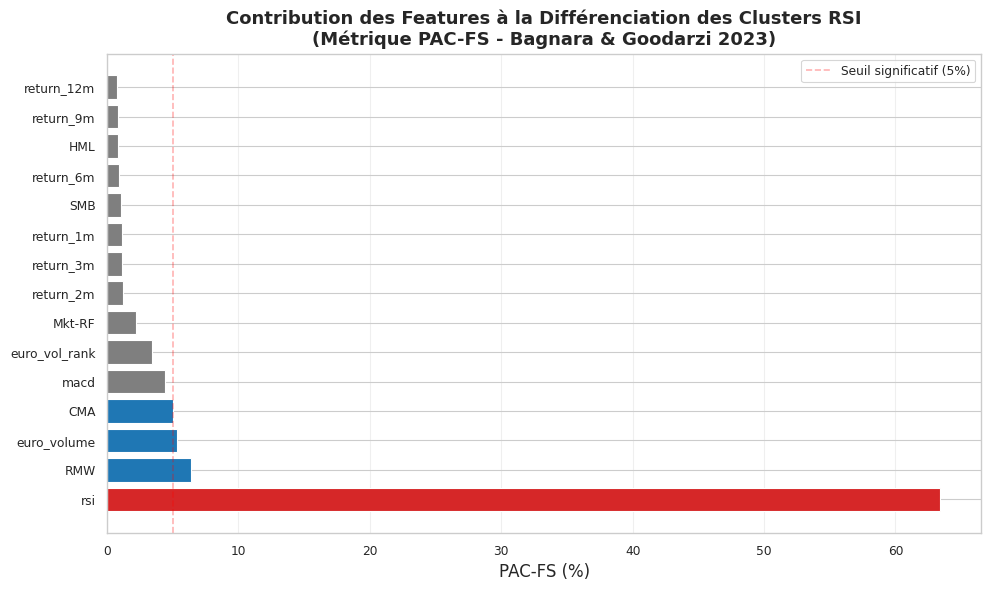

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 15 features
top_features = pac_fs_scores.head(15)

# Création du barplot horizontal
plt.figure(figsize=(10, 6))
colors = ['#d62728' if x > 10 else '#1f77b4' if x > 5 else '#7f7f7f' 
          for x in top_features.values]

plt.barh(range(len(top_features)), top_features.values, color=colors)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('PAC-FS (%)', fontsize=12)
plt.title('Contribution des Features à la Différenciation des Clusters RSI\n(Métrique PAC-FS - Bagnara & Goodarzi 2023)', 
          fontsize=13, fontweight='bold')
plt.axvline(x=5, color='red', linestyle='--', alpha=0.3, label='Seuil significatif (5%)')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('Graphiques/pac_fs_barplot.png', dpi=300, bbox_inches='tight')
plt.show()


## Exports pour mémoire : Cluster + features

In [18]:
import pandas as pd

# =============================================================================
# 1. DICTIONNAIRE DE MAPPING (TICKER -> NOM RÉEL)
# =============================================================================
# Vous pouvez compléter cette liste avec les autres entreprises de votre dataset
tickers_map = {
    'MC.PA': 'LVMH',
    'AI.PA': 'Air Liquide',
    'BNP.PA': 'BNP Paribas',
    'OR.PA': 'L\'Oréal',
    'SAN.PA': 'Sanofi',
    'TTE.PA': 'TotalEnergies',
    'RMS.PA': 'Hermès',
    'AIR.PA': 'Airbus',
    'CS.PA': 'AXA',
    'GLE.PA': 'Société Générale',
    'ACA.PA': 'Crédit Agricole',
    'KER.PA': 'Kering',
    'EL.PA': 'EssilorLuxottica',
    'SGO.PA': 'Saint-Gobain',
    'ORA.PA': 'Orange',
    'CAP.PA': 'Capgemini',
    'LR.PA': 'Legrand',
    'SU.PA': 'Schneider Electric',
    'DG.PA': 'Vinci',
    'ENGI.PA': 'Engie',
    'STMPA.PA': 'STMicroelectronics',
    'BN.PA': 'Danone',
    'SAF.PA': 'Safran'
}

# =============================================================================
# 2. EXTRACTION DES DONNÉES (DERNIÈRE DATE)
# =============================================================================
# On récupère la date la plus récente disponible dans vos données
last_date = data.index.get_level_values('date').max()
print(f"📅 Extraction des données au : {last_date.date()}")

# On coupe le dataframe pour ne garder que ce jour-là
# .copy() est important pour éviter les avertissements de pandas
df_final = data.xs(last_date, level='date')[['euro_volume', 'rsi', 'cluster']].copy()

# =============================================================================
# 3. CRÉATION DE LA COLONNE NOM (CORRECTION TYPE ERROR)
# =============================================================================
# Ici, on utilise une méthode "infaillible" :
# Pour chaque ticker dans l'index, on cherche le nom dans le dictionnaire.
# Si on ne le trouve pas, on garde le ticker original (x).
df_final['Entreprise'] = [tickers_map.get(x, x) for x in df_final.index]

# =============================================================================
# 4. MISE EN FORME FINALE
# =============================================================================
# Réorganisation des colonnes : Nom en premier
cols = ['Entreprise', 'euro_volume', 'rsi', 'cluster']
df_final = df_final[cols]

# Tri : On met les plus gros volumes en haut (souvent les plus pertinents)
df_final = df_final.sort_values(by='euro_volume', ascending=False)

# Renommage des colonnes pour faire "propre" dans le mémoire
df_final.columns = ['Entreprise', 'Volume (M€)', 'RSI (14j)', 'Cluster']

# Arrondis pour la lisibilité
df_final['Volume (M€)'] = df_final['Volume (M€)'].round(1)
df_final['RSI (14j)'] = df_final['RSI (14j)'].round(1)

# =============================================================================
# 5. AFFICHAGE ET EXPORT
# =============================================================================

print("\n📊 APERÇU DU TABLEAU POUR LE MÉMOIRE :\n")
print(df_final.head(15).to_string(index=False)) # index=False cache le code ticker

# Si vous voulez le code LaTeX pour copier-coller dans votre rapport :
print("\n" + "="*30)
print("CODE LATEX (A COPIER DANS OVERLEAF/RAPPORT)")
print("="*30)
print(df_final.head(10).to_latex(index=False, float_format="%.1f"))

📅 Extraction des données au : 2025-12-31

📊 APERÇU DU TABLEAU POUR LE MÉMOIRE :

        Entreprise  Volume (M€)  RSI (14j)  Cluster
              LVMH        258.3       62.4        3
     TotalEnergies        225.4       57.7        2
       BNP Paribas        153.6       67.2        3
            Airbus        151.7       49.9        1
            Sanofi        150.0       45.5        1
Schneider Electric        147.9       49.6        1
           L'Oréal        130.8       48.1        1
               AXA        113.6       62.0        3
       Air Liquide        104.1       37.8        0
            Hermès        103.8       49.8        1
            Safran        100.7       50.5        1
            Kering         91.9       50.7        1
  EssilorLuxottica         91.2       30.5        0
             Vinci         89.6       51.4        1
  Société Générale         87.9       71.1        3

CODE LATEX (A COPIER DANS OVERLEAF/RAPPORT)
\begin{tabular}{lrrr}
\toprule
Entreprise 

In [20]:
import pandas as pd
import numpy as np

# 1. Configuration
target_date = data.index.get_level_values('date').max()
# On garde nos 6 champions pour que ça reste lisible
selected_tickers = ['MC.PA', 'TTE.PA', 'BNP.PA', 'SAN.PA', 'AIR.PA', 'AI.PA']

name_mapping = {
    'MC.PA': 'LVMH', 'TTE.PA': 'TotalEnergies', 'BNP.PA': 'BNP Paribas',
    'SAN.PA': 'Sanofi', 'AIR.PA': 'Airbus', 'AI.PA': 'Air Liquide'
}

# 2. LISTE ÉLARGIE DES FEATURES (Cibles potentielles)
# Mettez ici les noms exacts de vos colonnes. Je couvre large.
features_map = {
    # --- Identité ---
    'euro_volume': 'Vol (M€)',
    
    # --- Momentum & Trend ---
    'rsi': 'RSI',
    'macd': 'MACD',
    'return_1m': 'Ret. 1M',
    'return_3m': 'Ret. 3M',   # Momentum Moyen Terme
    'return_6m': 'Ret. 6M',   # Momentum Long Terme
    
    # --- Volatilité ---
    'garman_klass_vol': 'Vol GK',
    'atr': 'ATR',
    
    # --- Bandes de Bollinger (Si vous les avez) ---
    'bb_high': 'BB Haut',
    'bb_low': 'BB Bas',
    
    # --- Facteurs Macro (Fama-French) ---
    'Mkt-RF': 'Mkt-RF',
    'SMB': 'SMB',
    'HML': 'HML',
    
    # --- Notre Cluster ---
    'cluster': 'Cluster'
}

# 3. Extraction
df_full = data.xs(target_date, level='date').loc[selected_tickers].copy()
df_full['Entreprise'] = df_full.index.map(name_mapping)

# On ne garde que les colonnes qui existent vraiment dans votre 'data'
existing_cols = [c for c in features_map.keys() if c in df_full.columns]
df_final = df_full[['Entreprise'] + existing_cols].copy()

# 4. Formatage Intelligent (Le "Polish" pour le mémoire)
# Pourcentages (Returns, Volatilité, Facteurs FF)
pct_cols = ['return_1m', 'return_3m', 'return_6m', 'garman_klass_vol', 'Mkt-RF', 'SMB', 'HML']
for col in pct_cols:
    if col in df_final.columns:
        # On multiplie par 100 et on ajoute "%"
        df_final[col] = (df_final[col] * 100).round(2).astype(str) + '%'

# Chiffres (Prix, RSI, MACD, Volume)
if 'euro_volume' in df_final.columns:
    df_final['euro_volume'] = df_final['euro_volume'].round(1)
if 'rsi' in df_final.columns:
    df_final['rsi'] = df_final['rsi'].round(1)
if 'macd' in df_final.columns:
    df_final['macd'] = df_final['macd'].round(2)
if 'atr' in df_final.columns:
    df_final['atr'] = df_final['atr'].round(2)
if 'bb_high' in df_final.columns: # Si les BB sont des prix
    df_final['bb_high'] = df_final['bb_high'].round(1)

# Renommage final
df_final.rename(columns=features_map, inplace=True)

# Tri par Cluster pour la logique
if 'Cluster' in df_final.columns:
    df_final = df_final.sort_values('Cluster')

# 5. Output
print(f"📅 MATRICE COMPLÈTE AU : {pd.to_datetime(target_date).date()}\n")
print(df_final.to_string(index=False))

print("\n=== CODE LATEX (WIDE) ===")
print(df_final.to_latex(index=False))

📅 MATRICE COMPLÈTE AU : 2025-12-31

   Entreprise  Vol (M€)  RSI  MACD Ret. 1M Ret. 3M Ret. 6M Vol GK   ATR  BB Haut   BB Bas  Mkt-RF      SMB     HML  Cluster
  Air Liquide     104.1 37.8 -1.44  -2.94%  -9.39%   -8.5%   0.0% -0.33      5.1 5.062667  79.71%  -89.78% -23.02%        0
       Sanofi     150.0 45.5 -0.97  -3.54%   5.31%   0.62%   0.0% -0.25      4.5 4.396111  52.31%  -52.12%   5.78%        1
       Airbus     151.7 49.9 -0.65  -2.96%   0.51%  11.93%   0.0%  0.82      5.3 5.256293 121.35%    23.4%  79.07%        1
TotalEnergies     225.4 57.7  0.16  -0.63%  10.93%  10.14%   0.0% -0.79      4.0 4.006166  79.33% -112.83% 116.82%        2
  BNP Paribas     153.6 67.2  2.40   9.63%   4.47%   9.47%   0.0% -0.26      4.4 4.321332 126.96%   -8.28% 149.26%        3
         LVMH     258.3 62.4  0.49   2.37%  24.99%  46.33%   0.0%  0.02      6.5 6.426488   83.9% -110.25%  29.14%        3

=== CODE LATEX (WIDE) ===
\begin{tabular}{lrrrllllrrrlllr}
\toprule
Entreprise & Vol (M€) & RSI

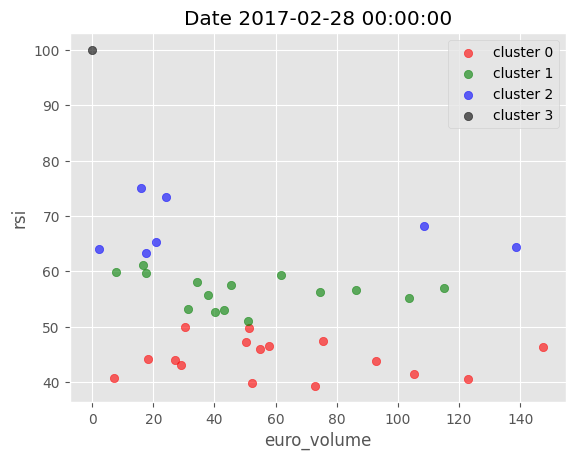

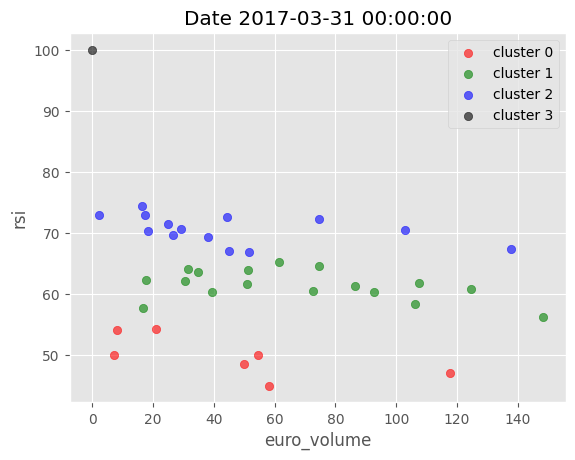

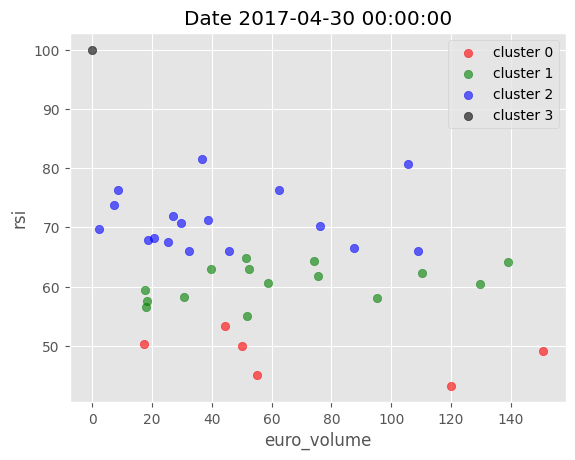

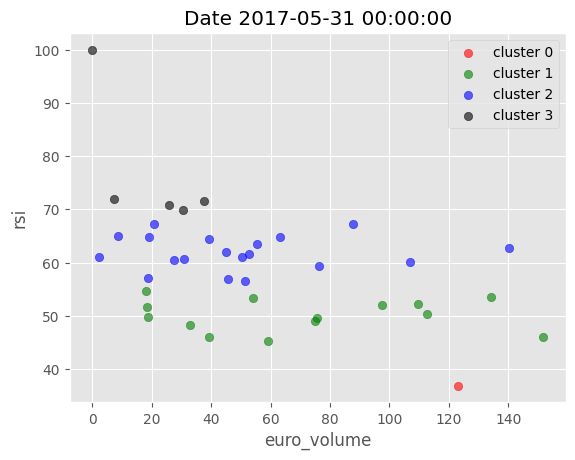

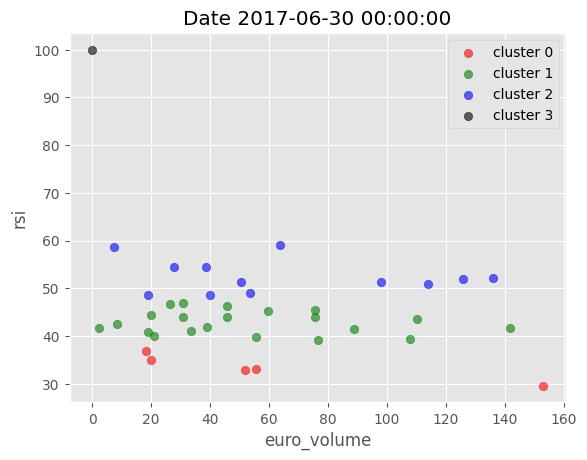

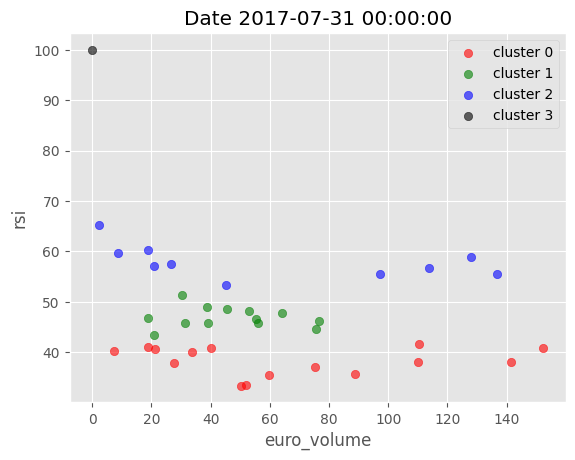

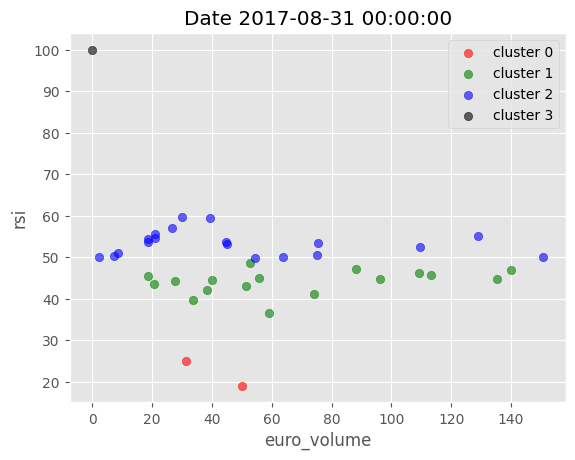

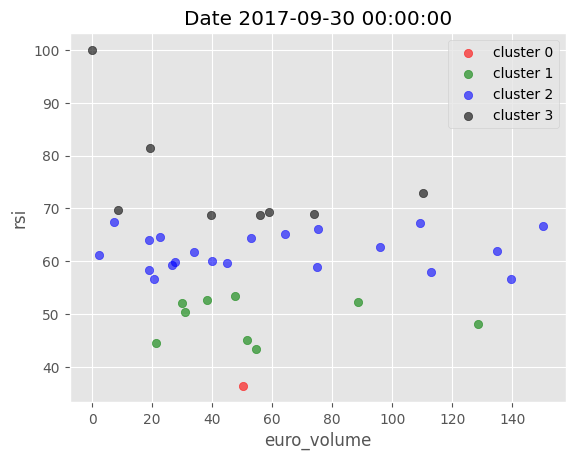

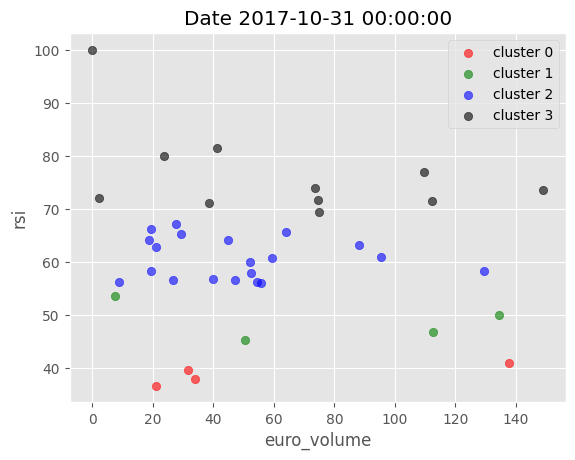

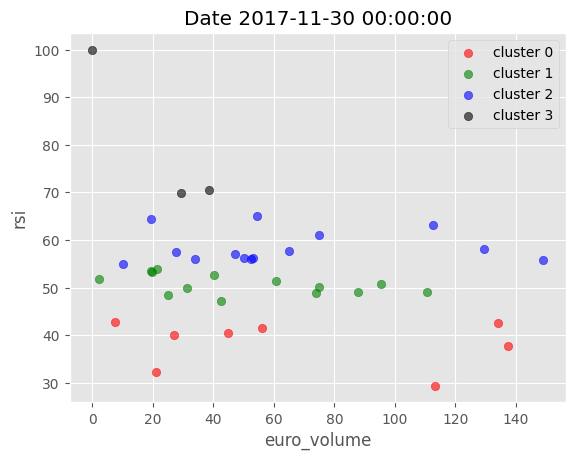

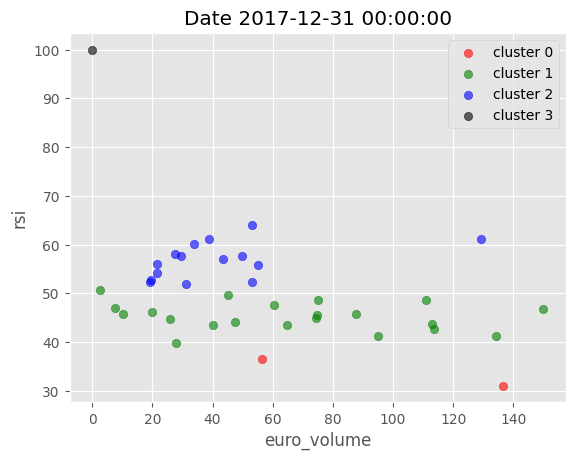

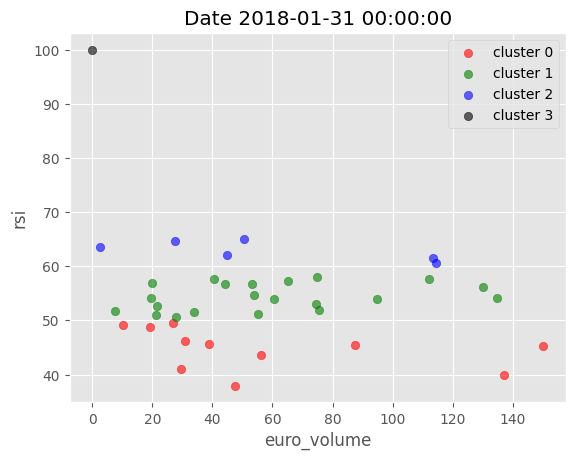

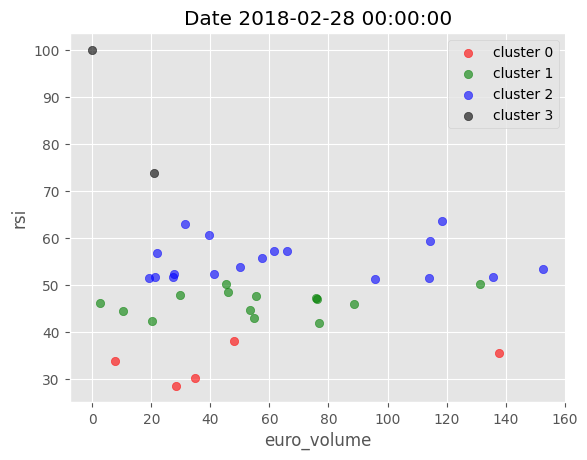

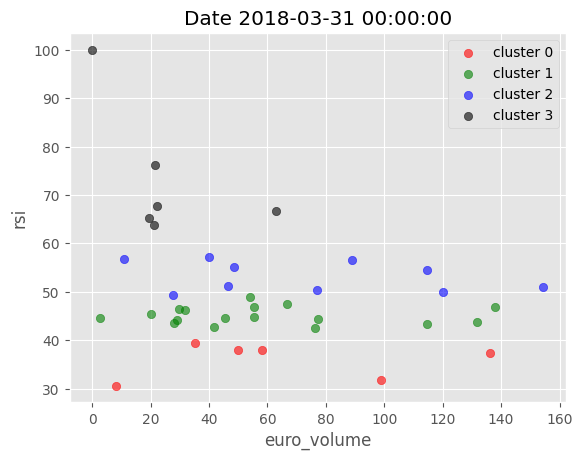

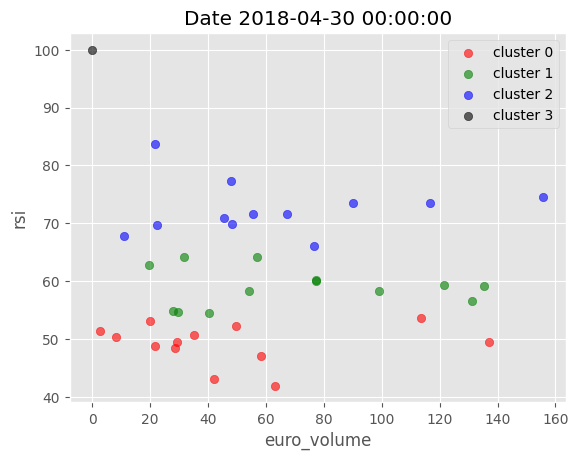

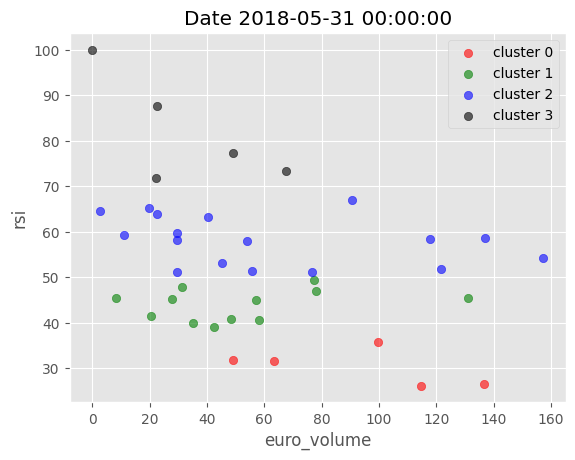

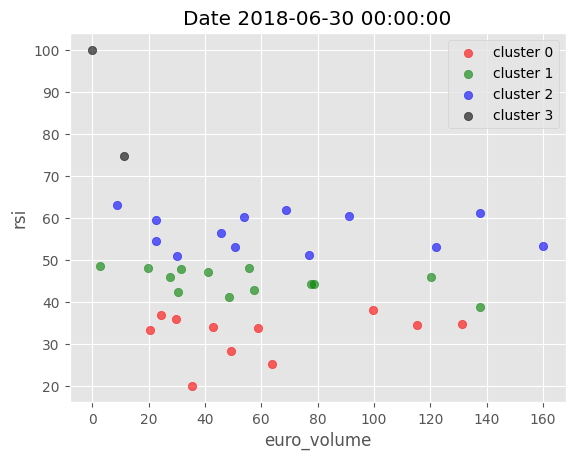

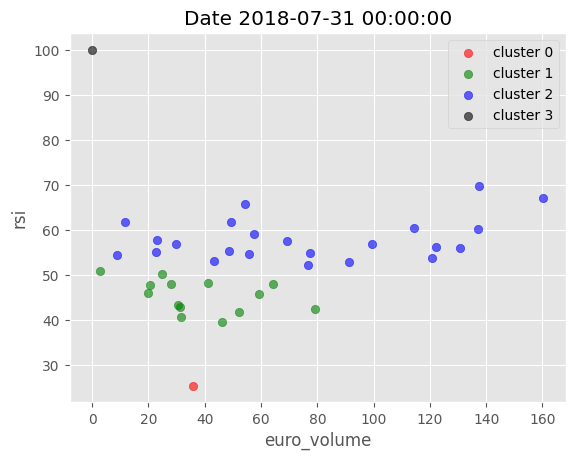

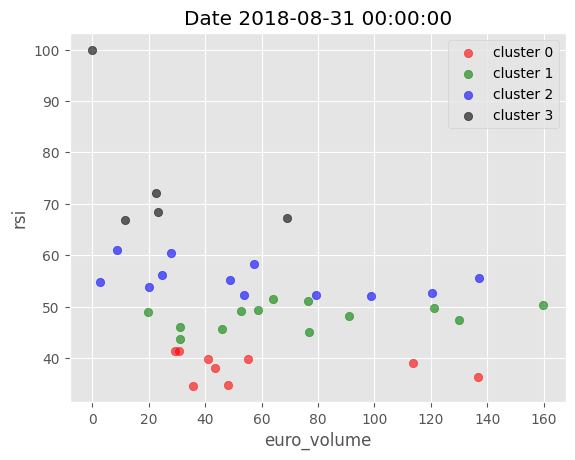

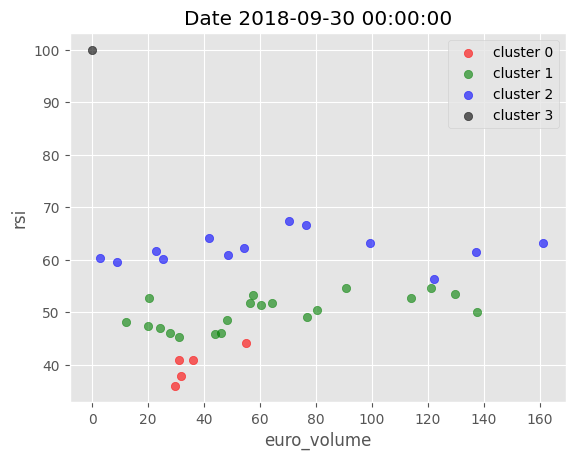

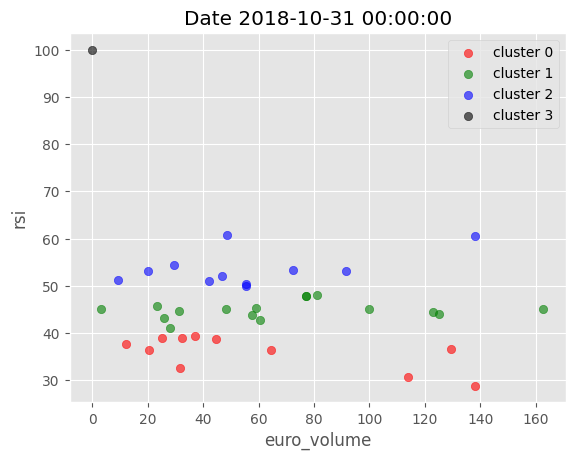

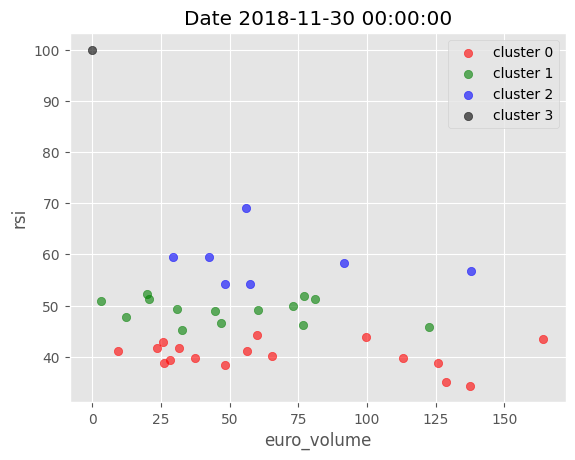

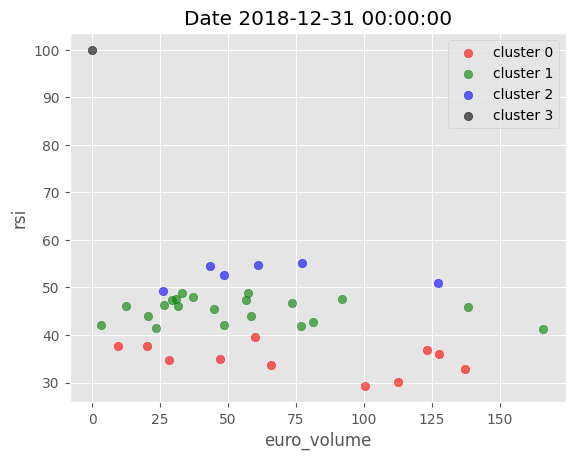

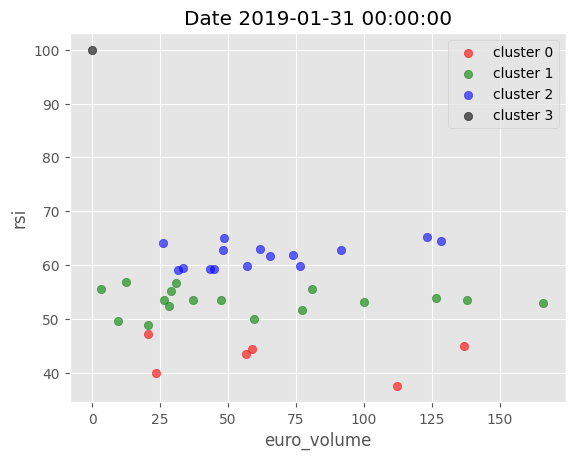

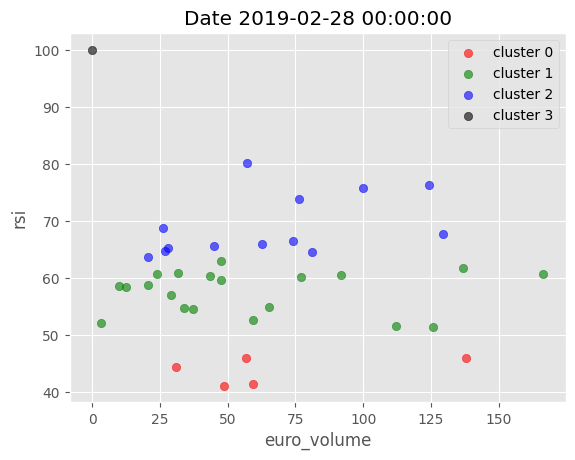

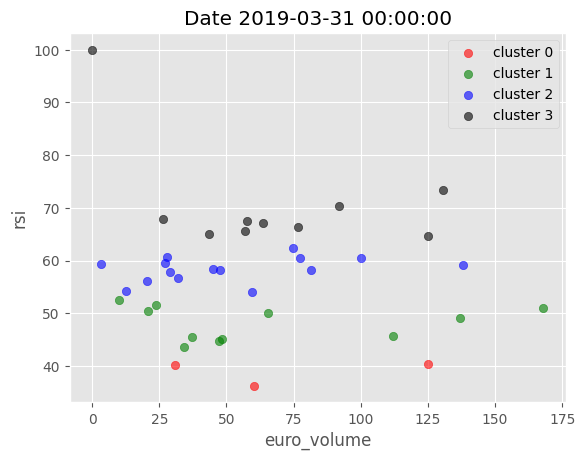

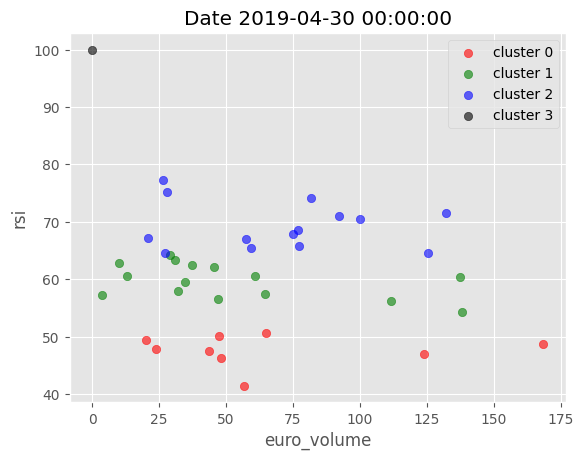

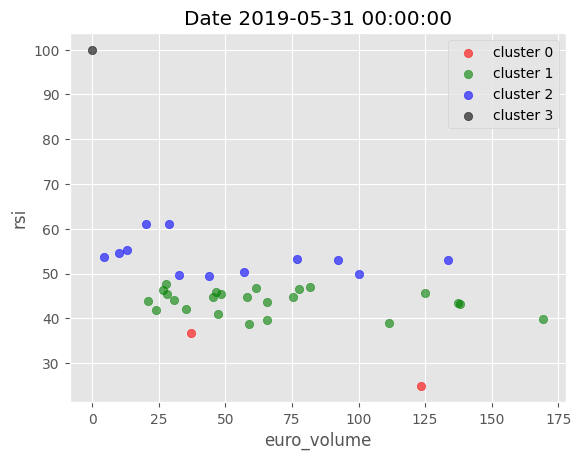

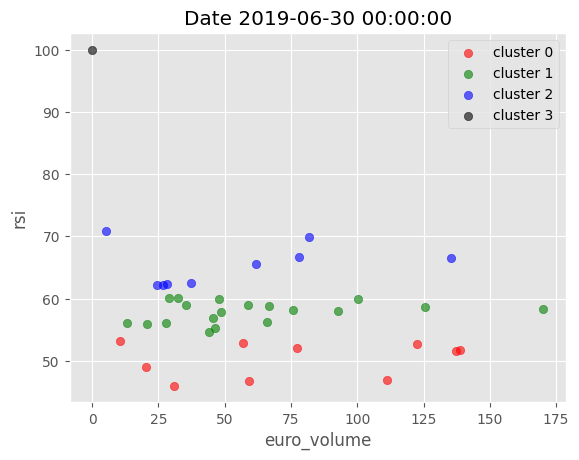

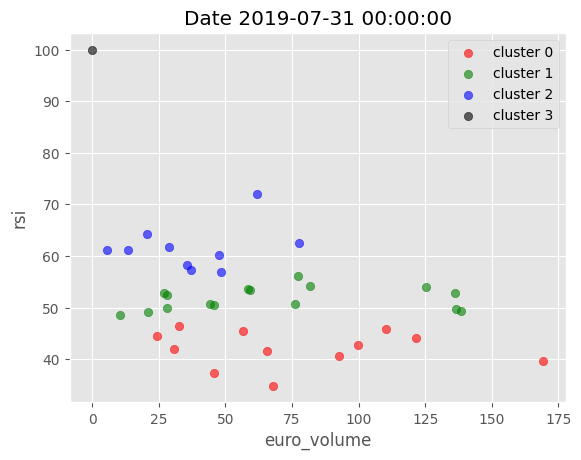

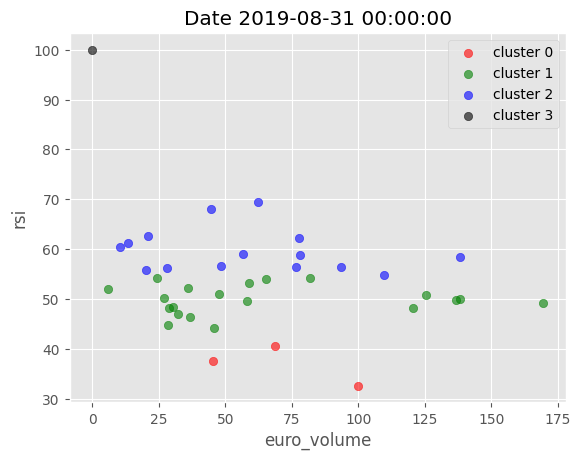

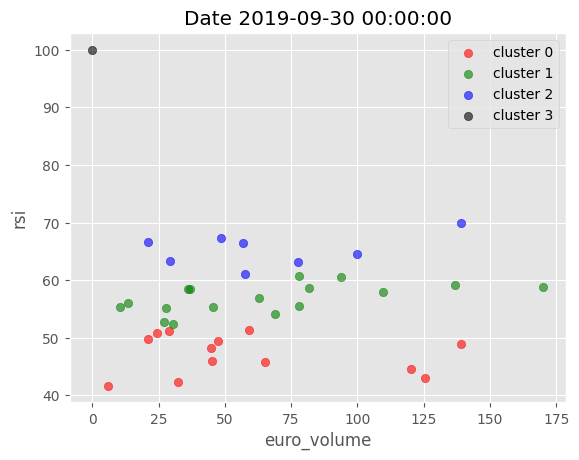

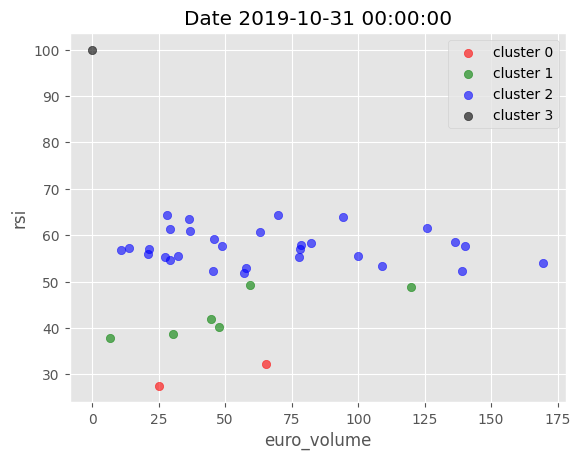

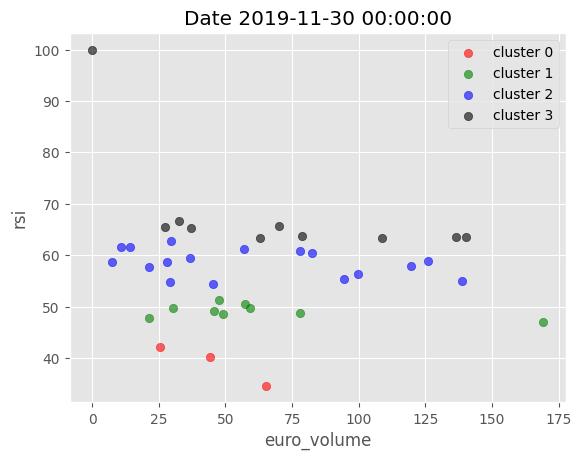

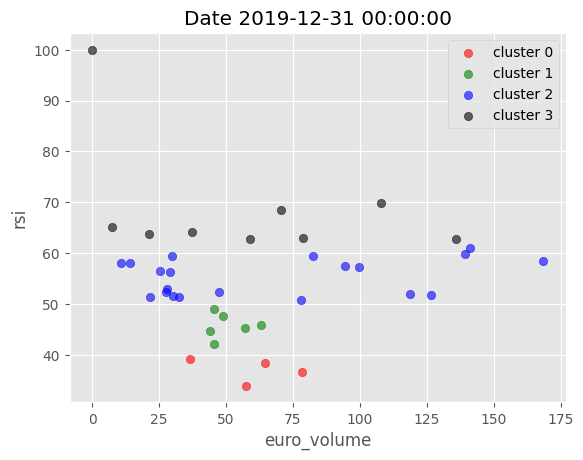

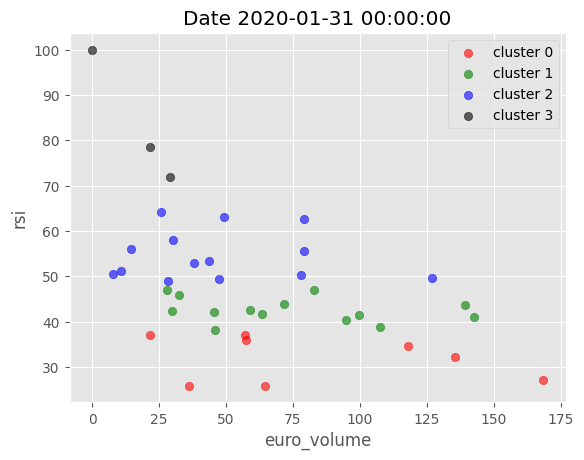

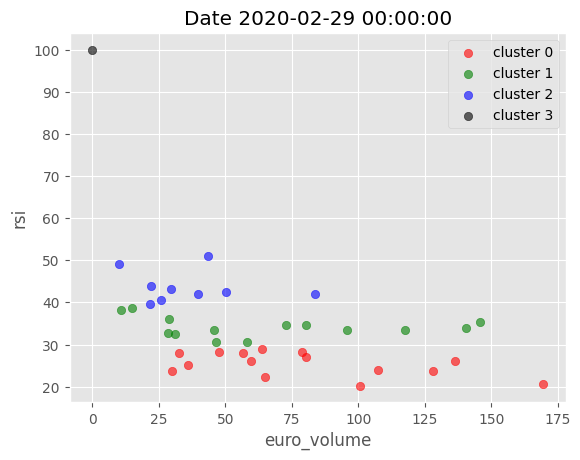

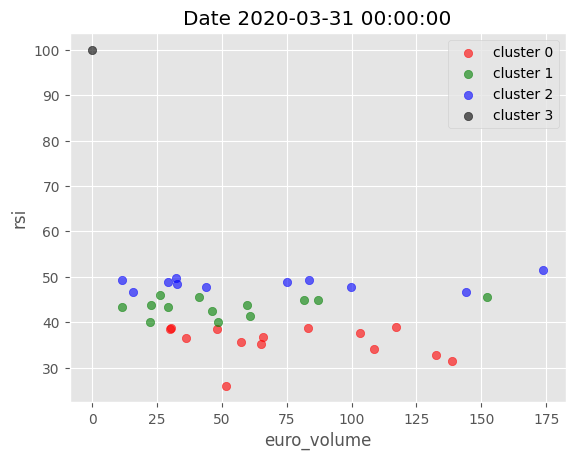

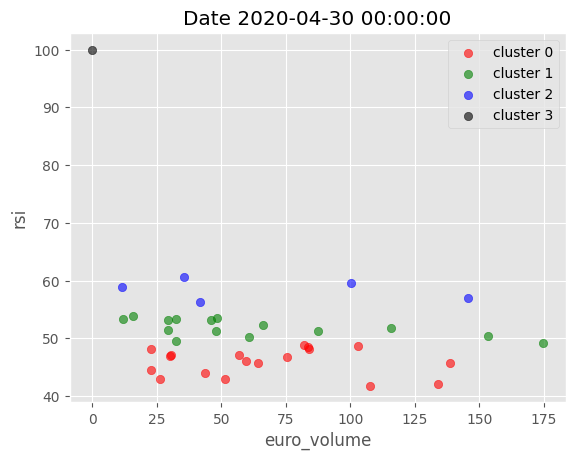

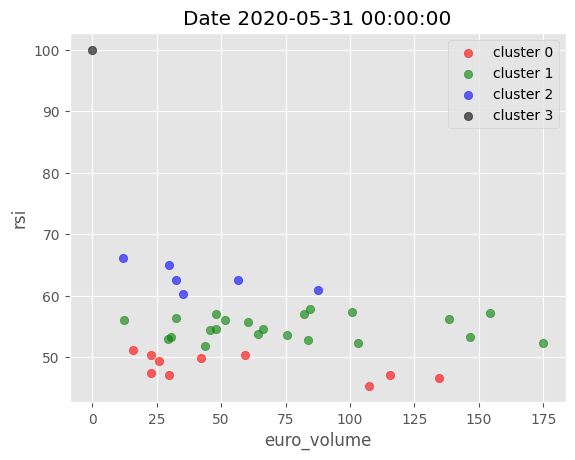

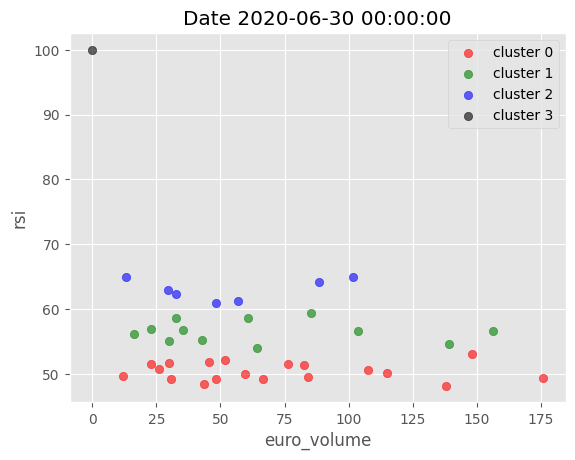

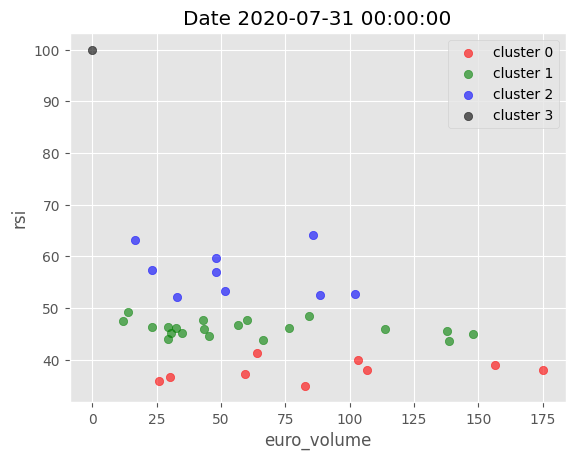

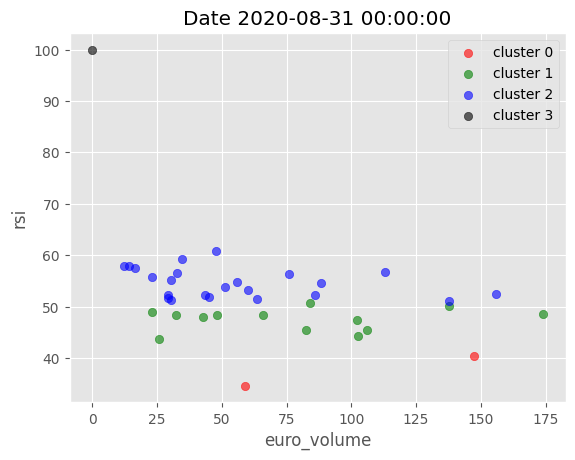

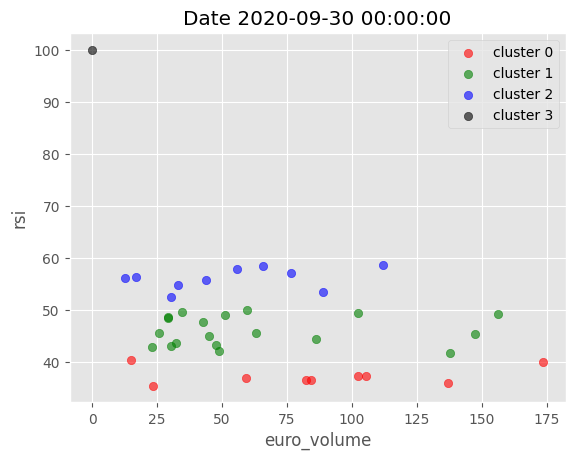

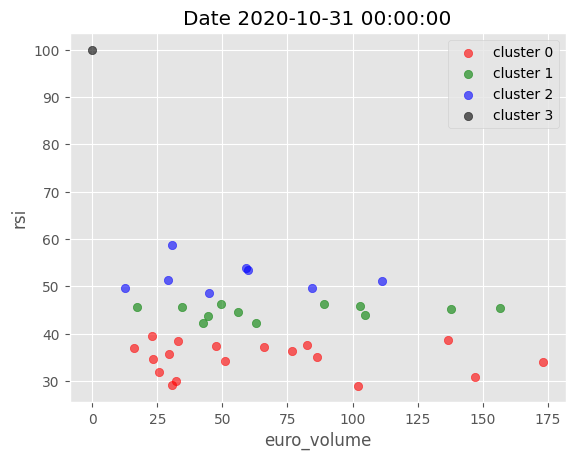

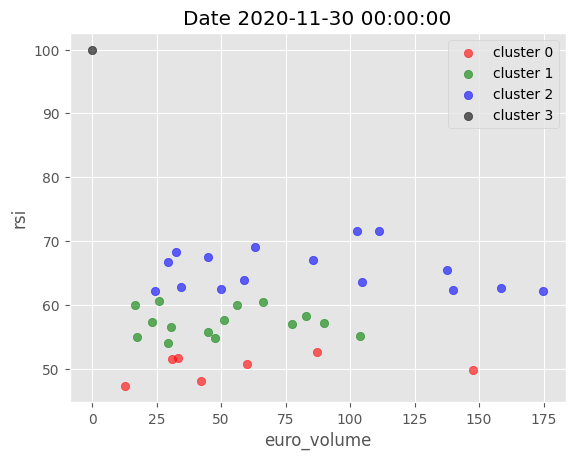

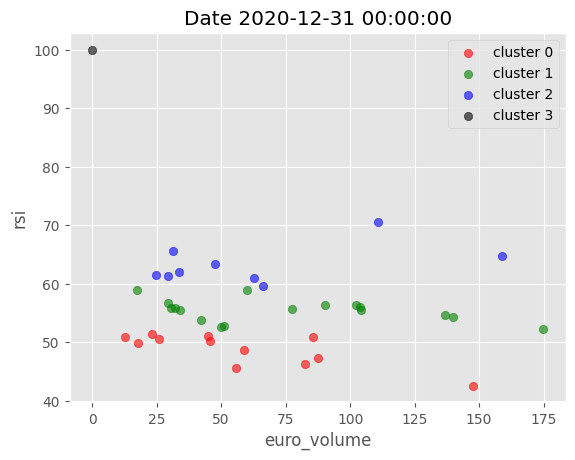

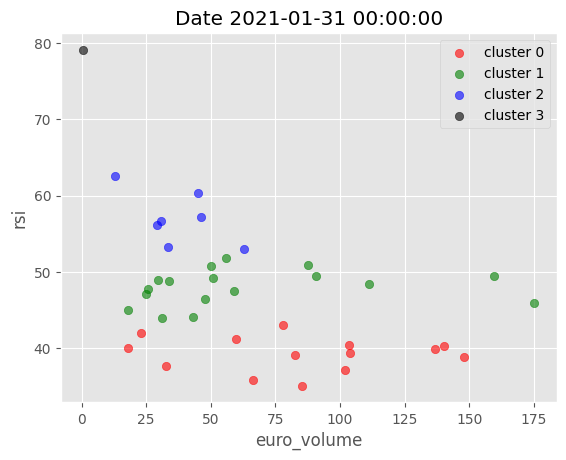

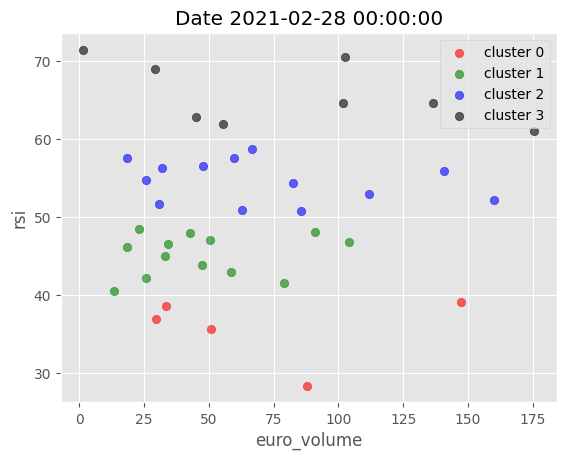

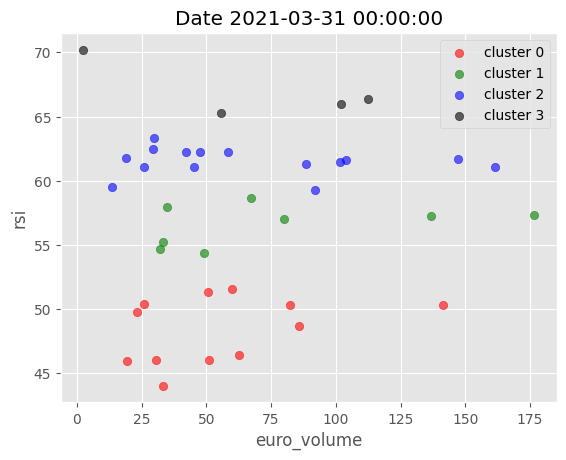

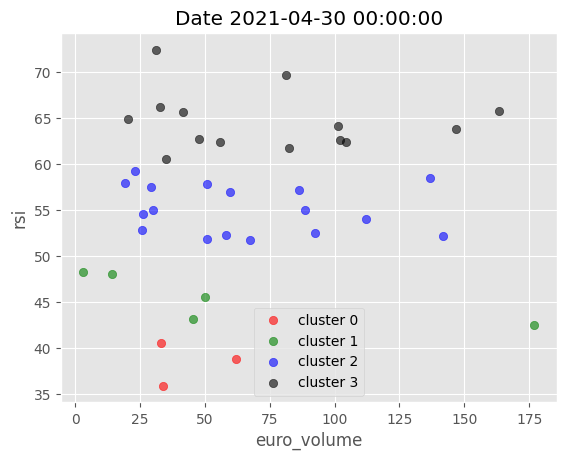

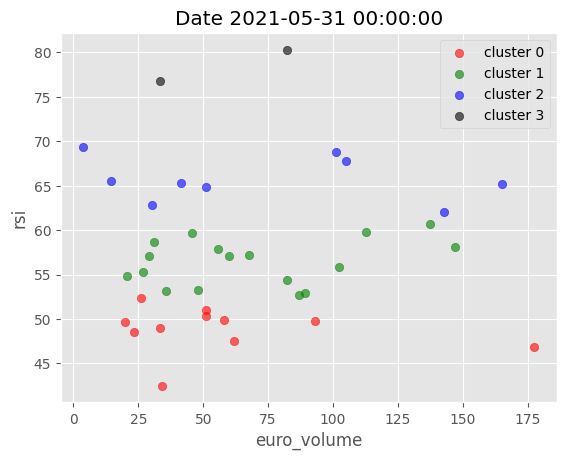

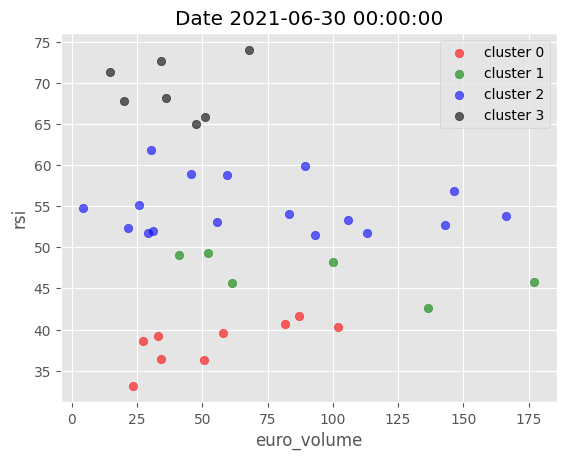

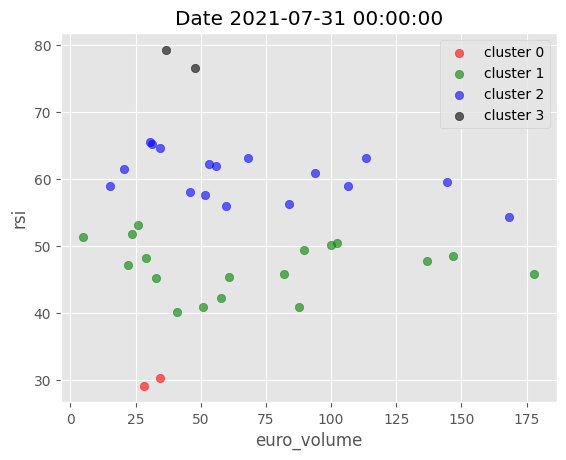

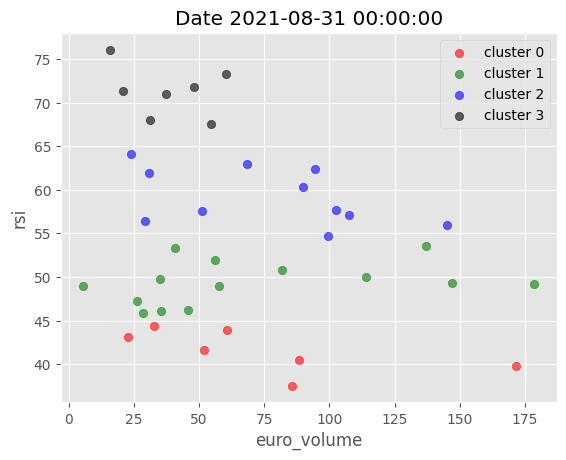

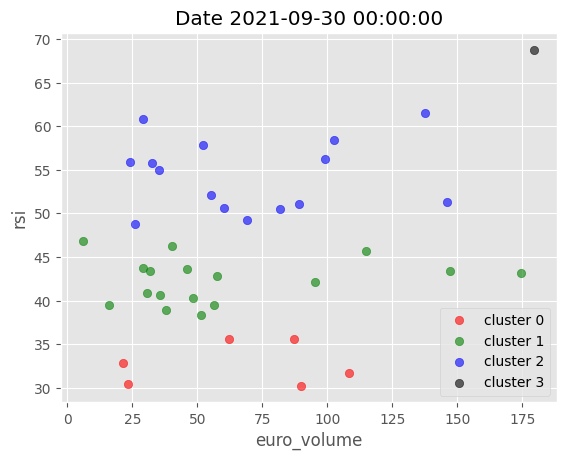

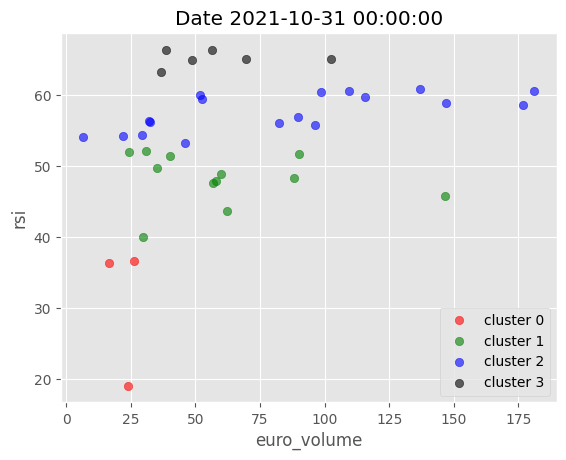

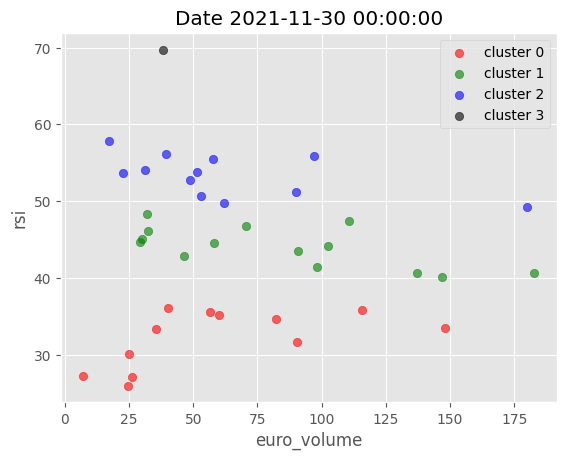

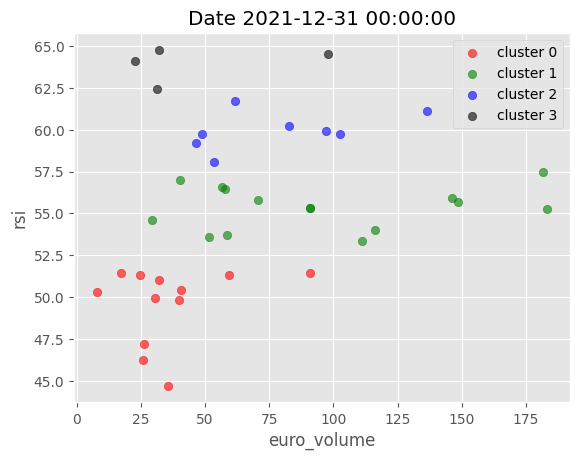

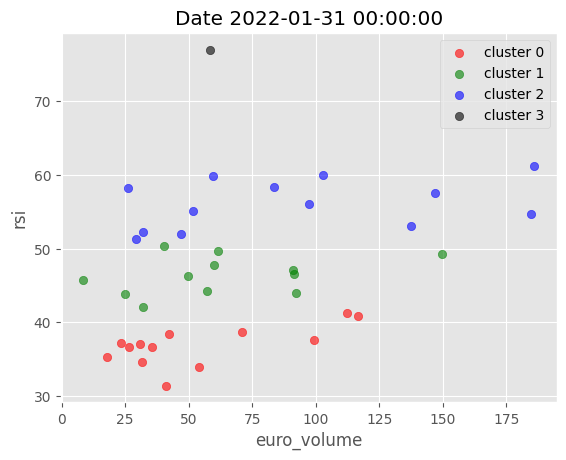

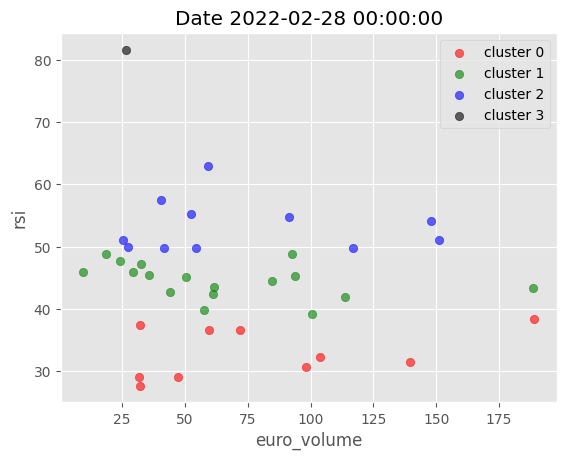

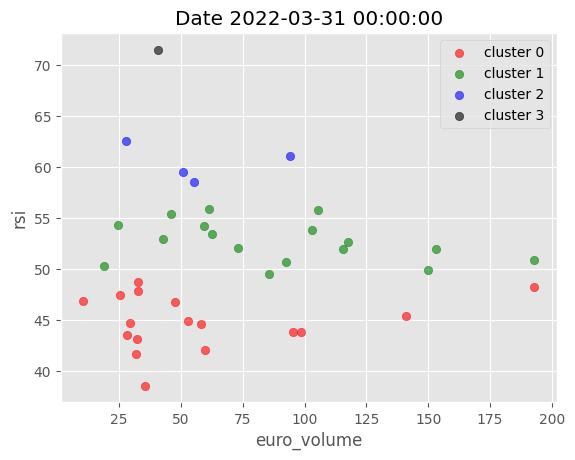

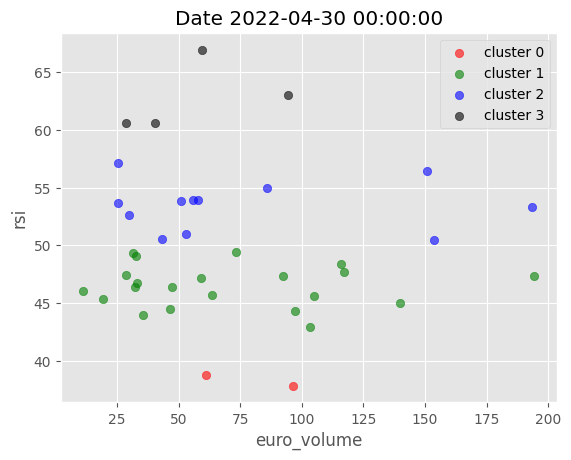

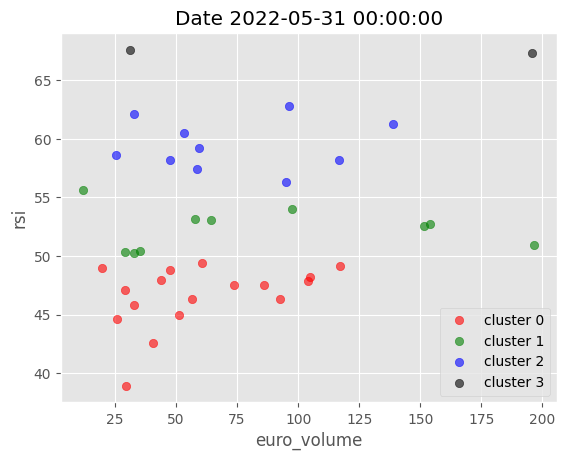

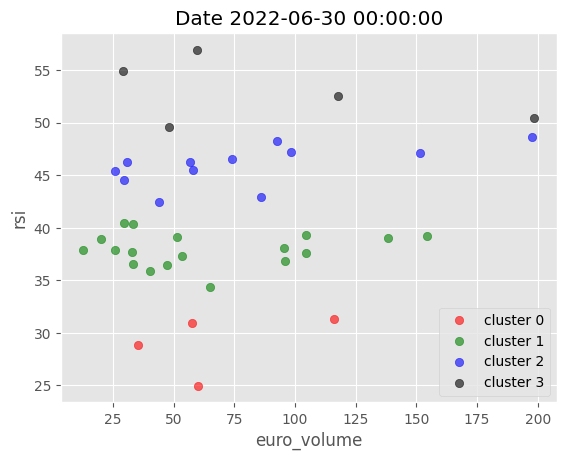

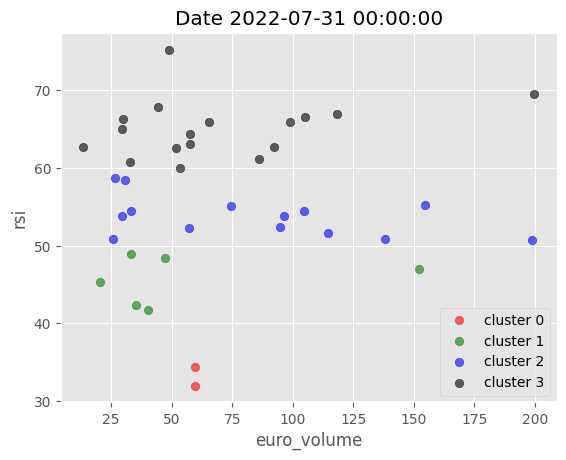

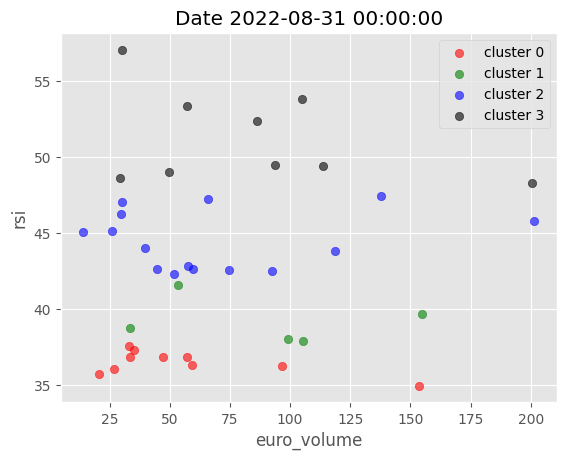

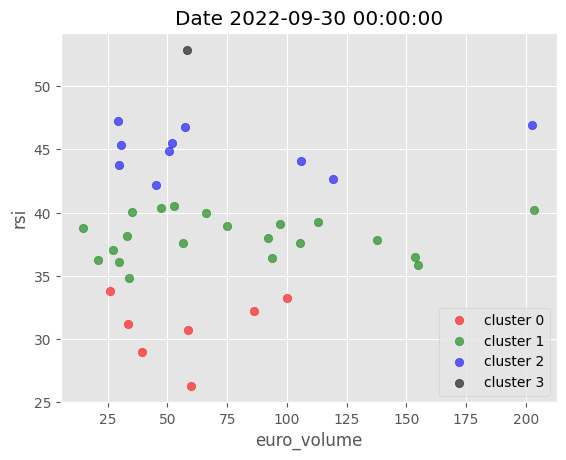

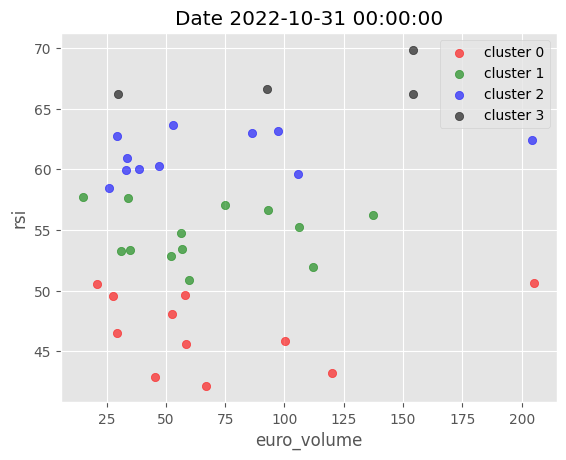

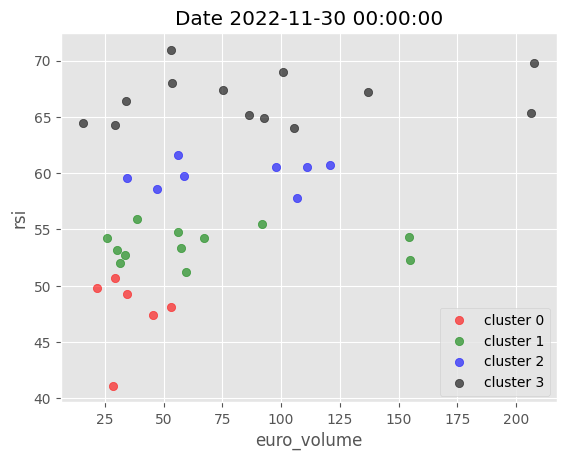

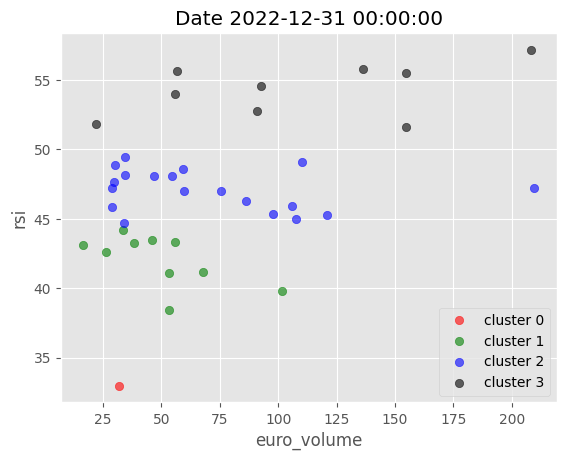

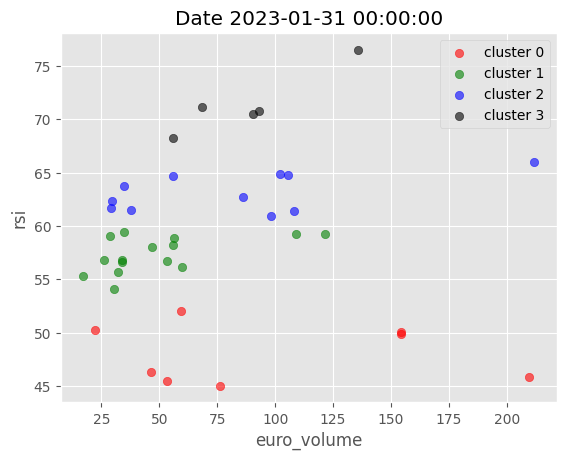

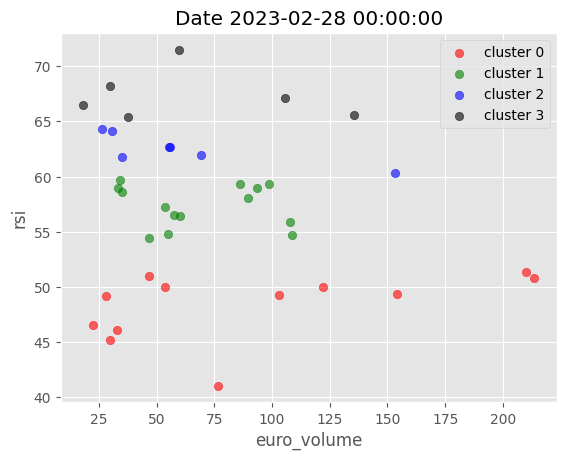

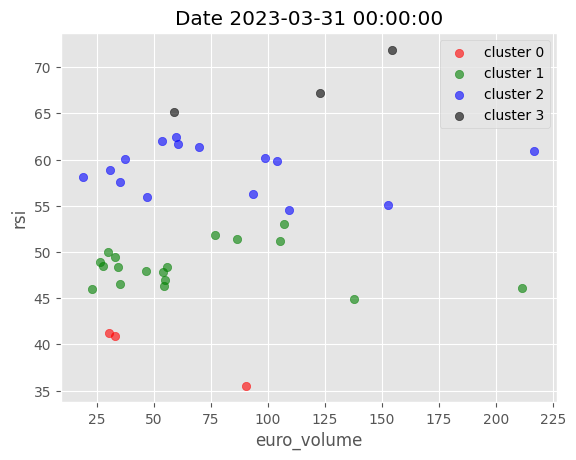

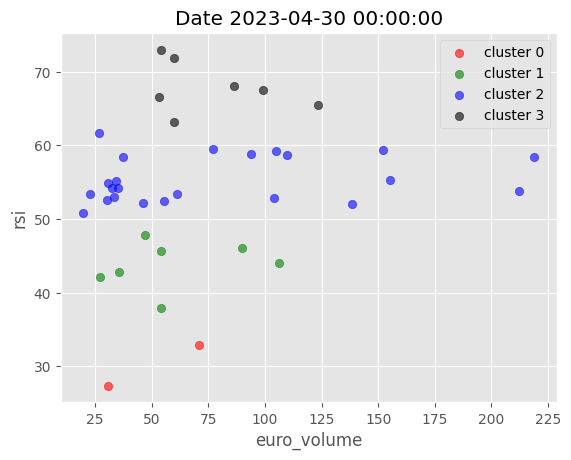

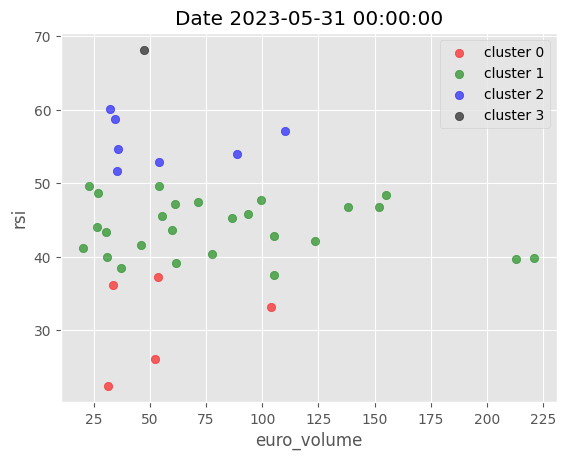

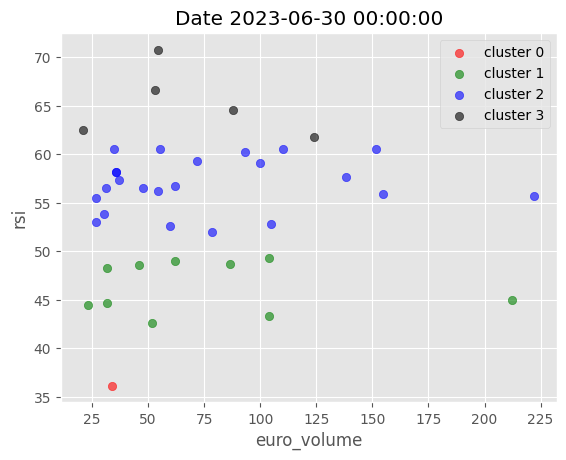

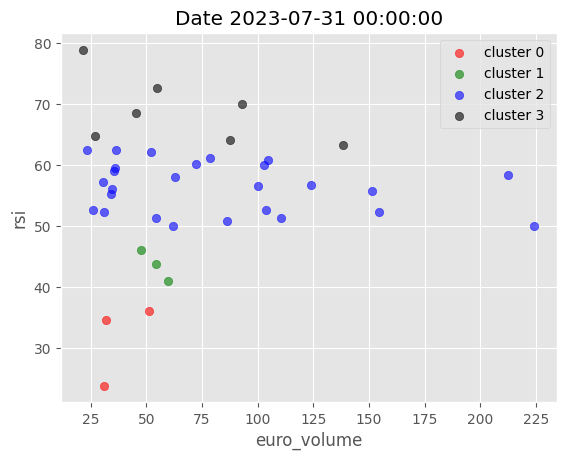

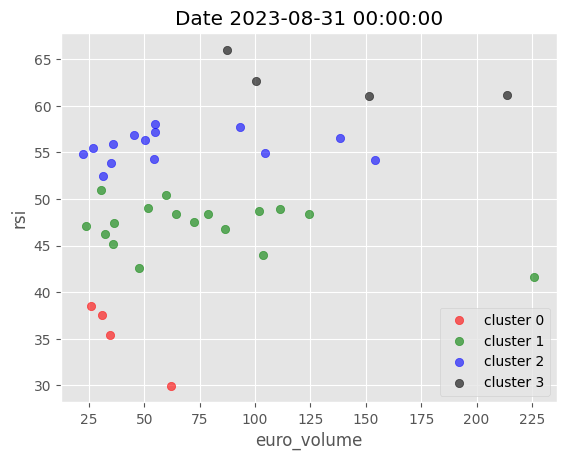

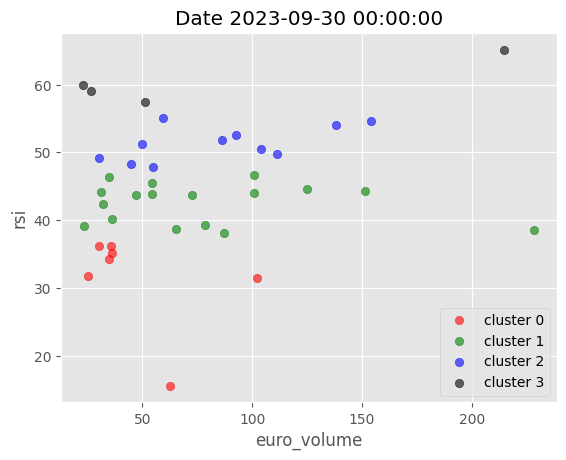

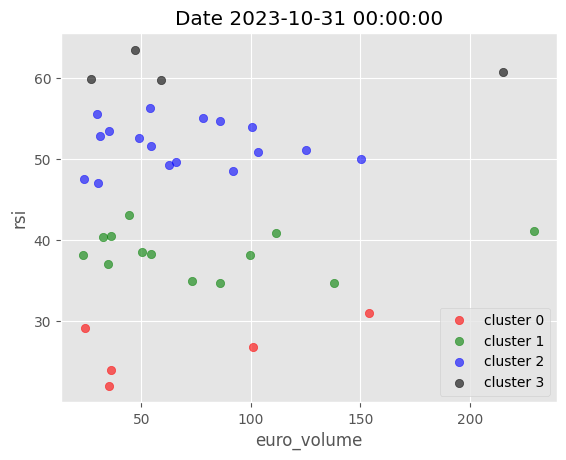

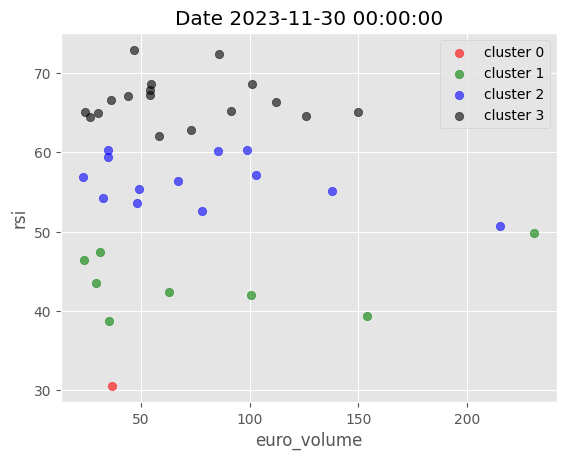

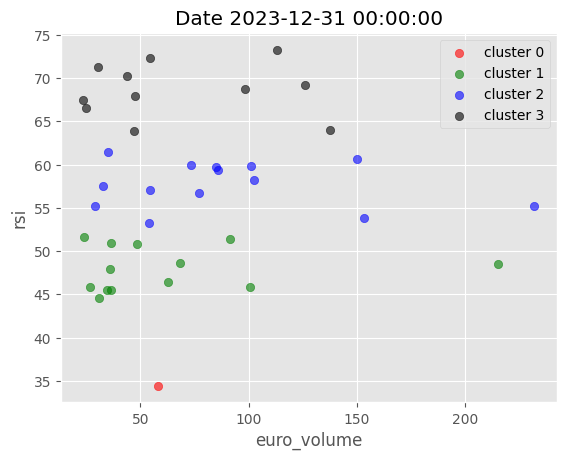

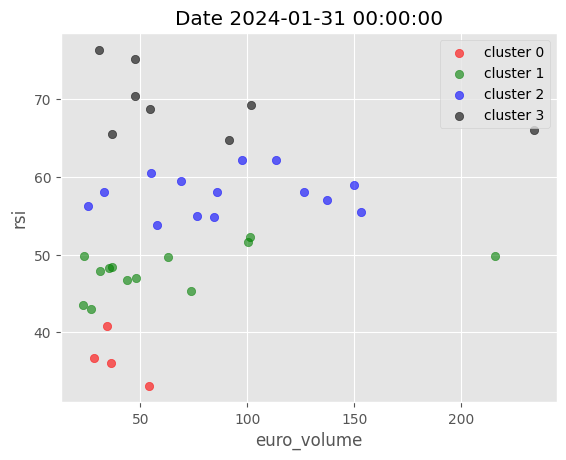

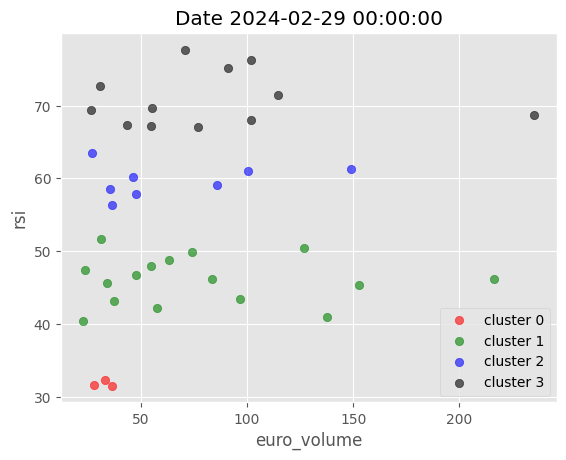

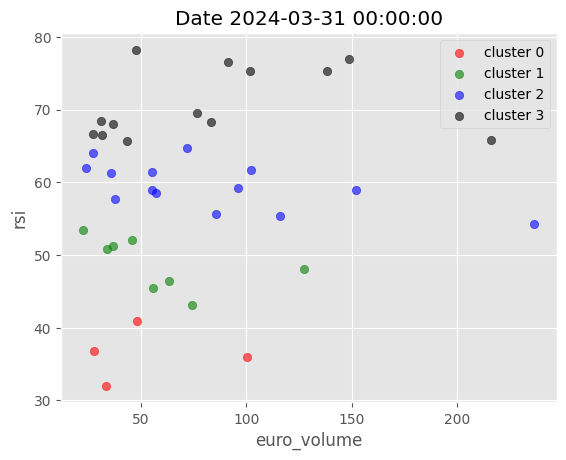

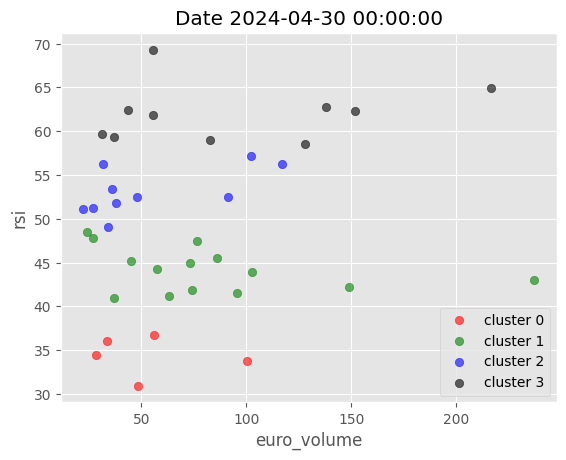

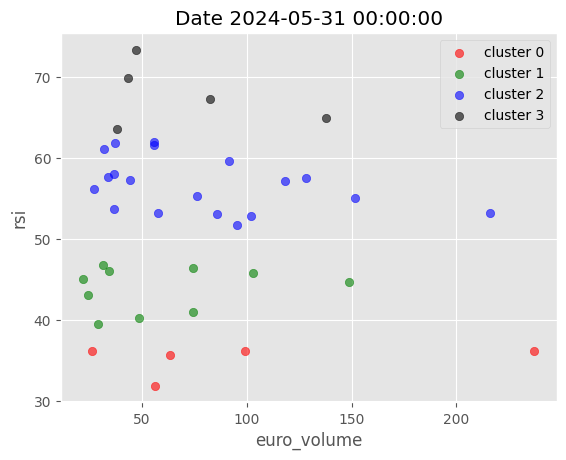

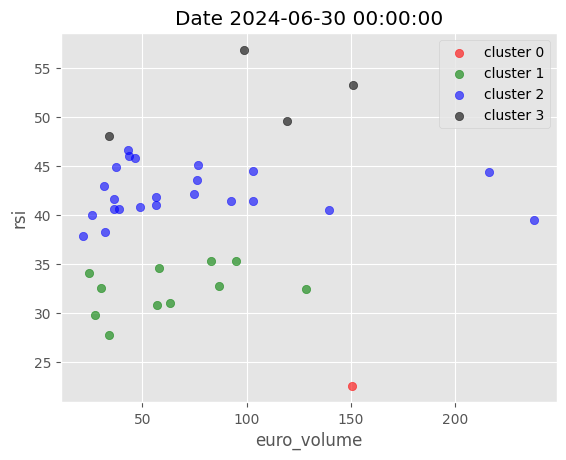

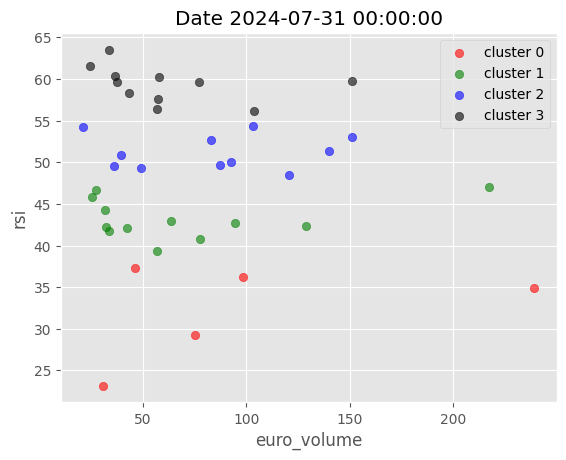

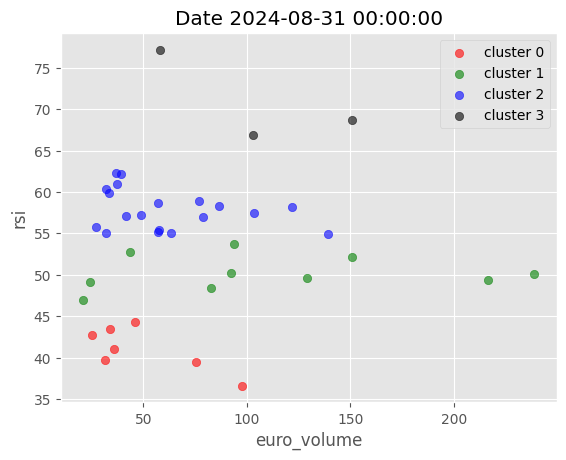

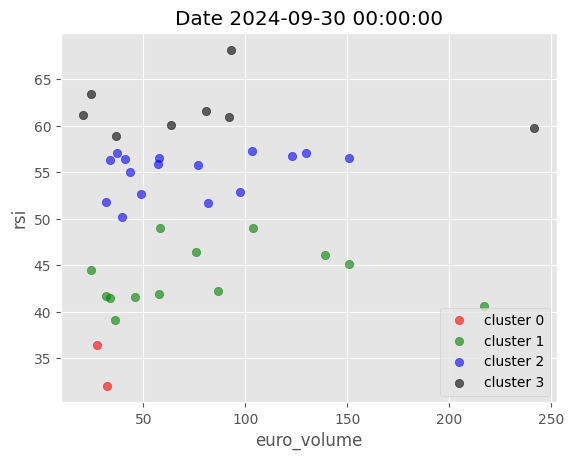

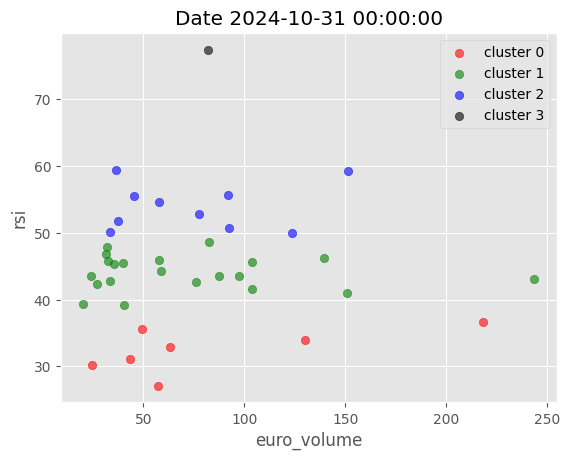

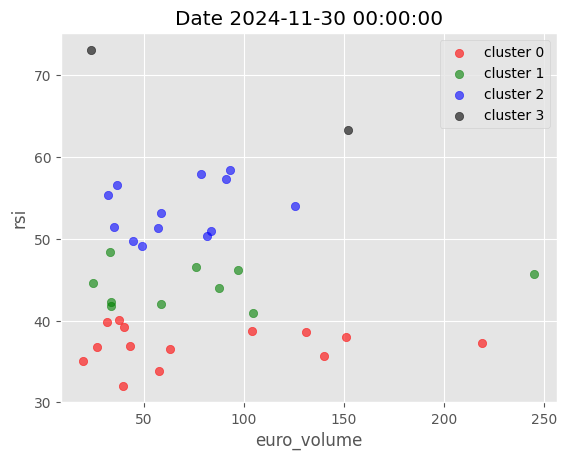

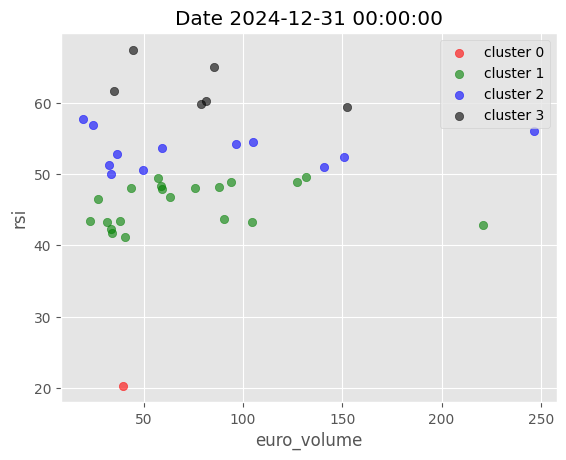

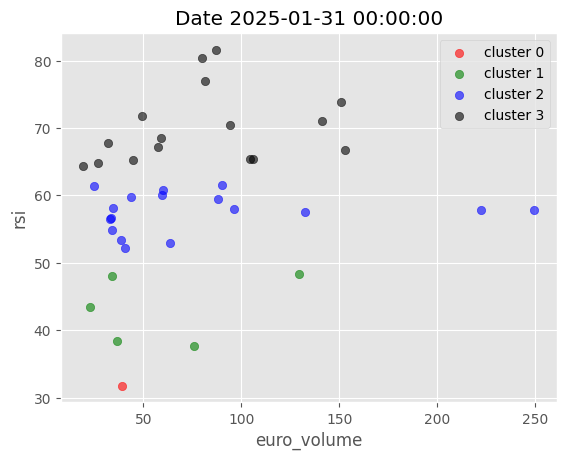

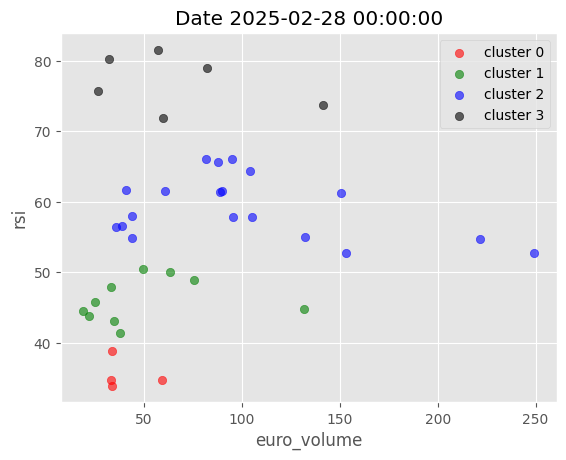

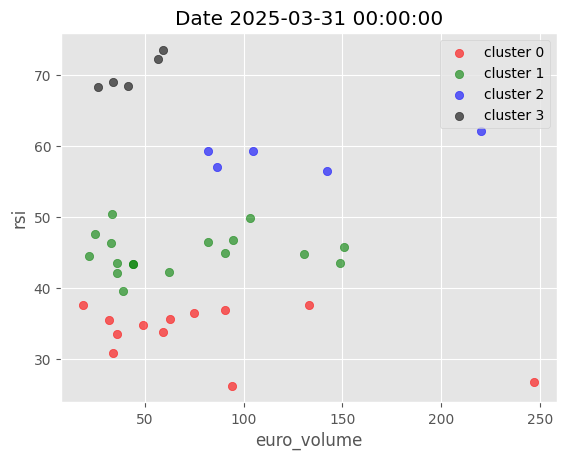

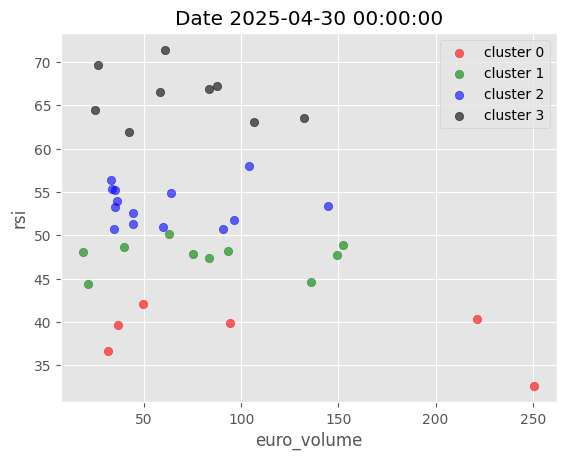

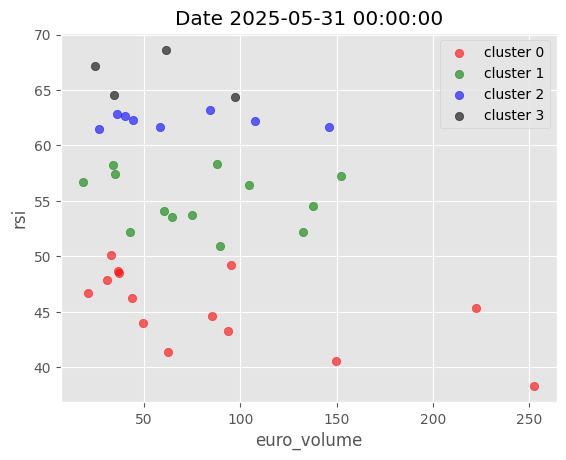

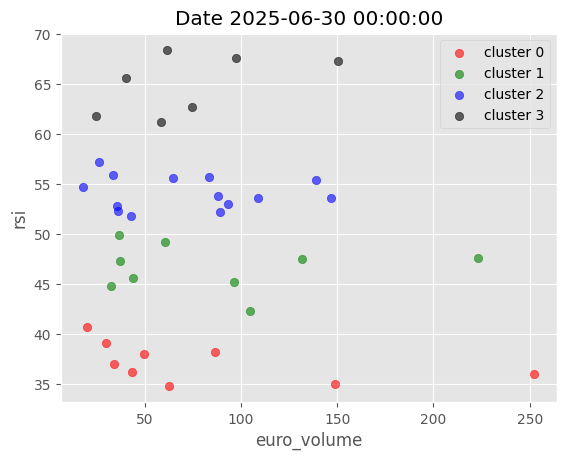

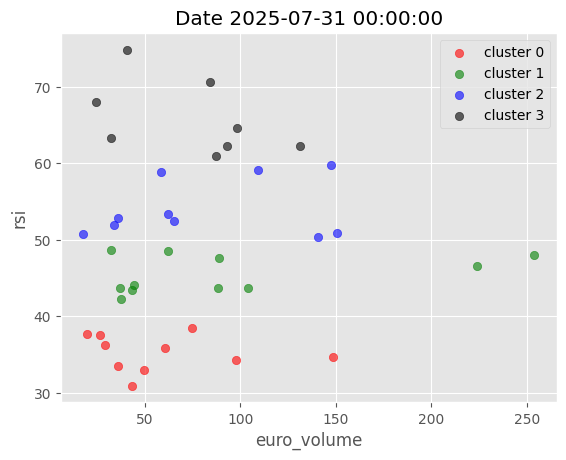

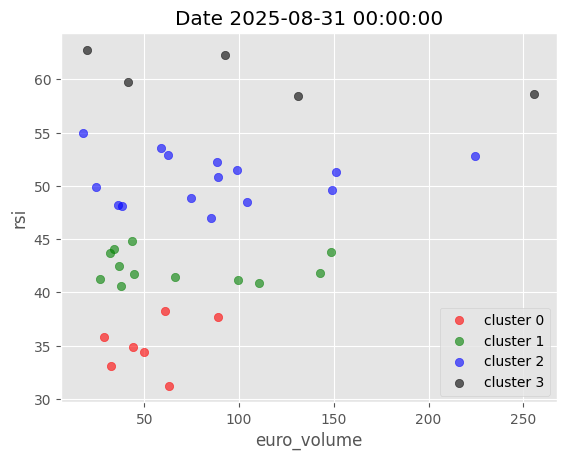

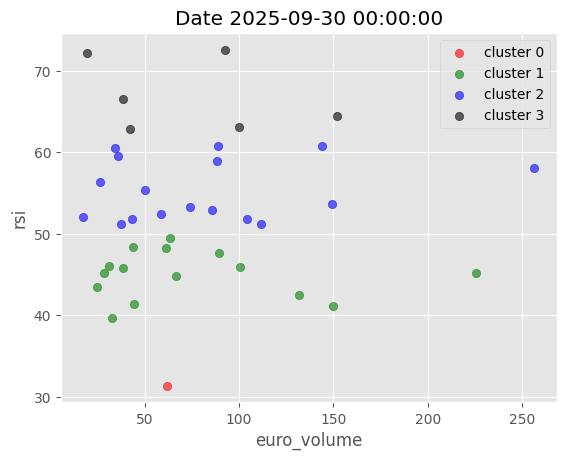

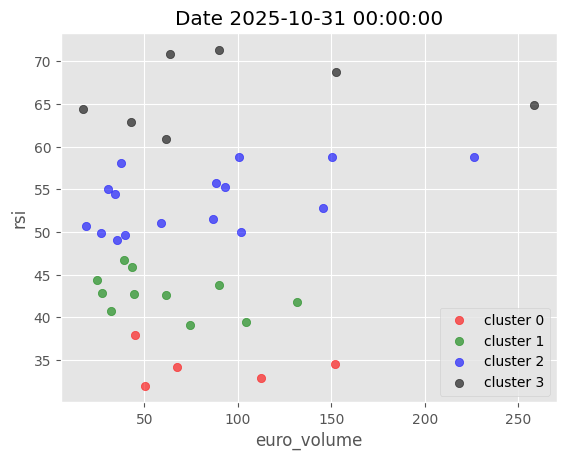

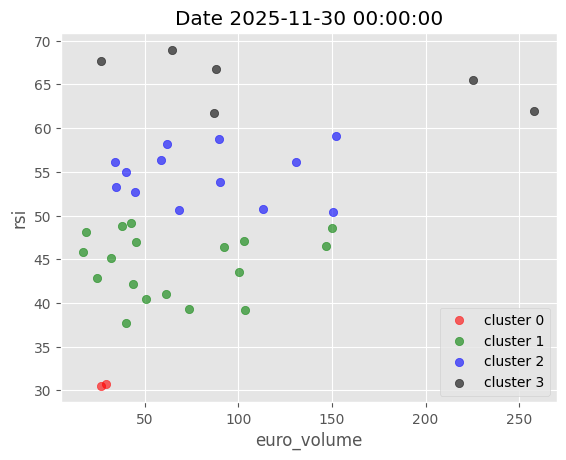

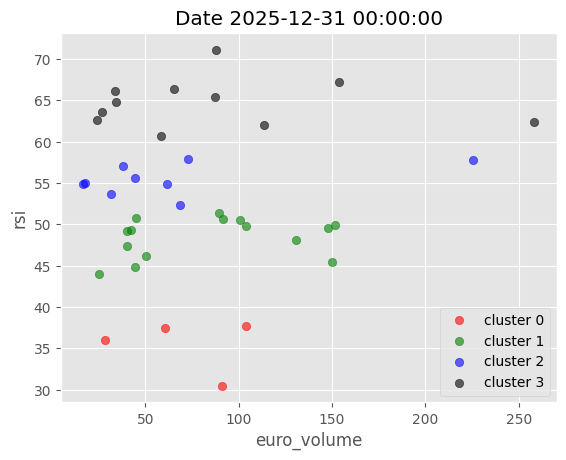

In [20]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_clusters(data):
    cluster_0 = data[data['cluster'] == 0]
    cluster_1 = data[data['cluster'] == 1]
    cluster_2 = data[data['cluster'] == 2]
    cluster_3 = data[data['cluster'] == 3]
    
    plt.scatter(cluster_0.iloc[:, 0], cluster_0.iloc[:, 2], color='red', label='cluster 0', alpha=0.6)
    plt.scatter(cluster_1.iloc[:, 0], cluster_1.iloc[:, 2], color='green', label='cluster 1', alpha=0.6)
    plt.scatter(cluster_2.iloc[:, 0], cluster_2.iloc[:, 2], color='blue', label='cluster 2', alpha=0.6)
    plt.scatter(cluster_3.iloc[:, 0], cluster_3.iloc[:, 2], color='black', label='cluster 3', alpha=0.6)
    
    plt.xlabel(data.columns[0])  # Nom de la colonne X
    plt.ylabel(data.columns[2])  # Nom de la colonne Y (RSI)
    plt.legend()
    plt.show()

# Plot pour chaque date
for i in data.index.get_level_values('date').unique().tolist():
    g = data.xs(i, level=0)
    plt.title(f'Date {i}')
    plot_clusters(g)


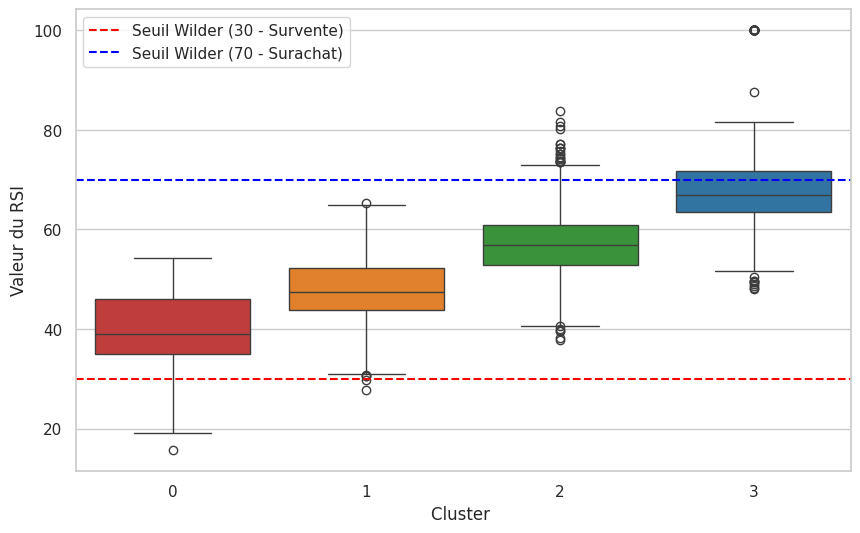

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. On s'assure d'utiliser le style "whitegrid" pour la lisibilité académique
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. Définition des couleurs qui ont du sens financier
# 0 = Rouge (RSI bas / Survente)
# 1 = Orange
# 2 = Vert
# 3 = Bleu (RSI haut / Surachat)
my_pal = ["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4"]

# 3. Création du Boxplot
# NOTE : J'ai remplacé 'viridis' par 'my_pal' pour utiliser les couleurs ci-dessus
sns.boxplot(x='cluster', y='rsi', data=data, palette=my_pal)

# 4. Ajout des seuils de Wilder (votre référence théorique)
plt.axhline(30, color='red', linestyle='--', linewidth=1.5, label='Seuil Wilder (30 - Survente)')
plt.axhline(70, color='blue', linestyle='--', linewidth=1.5, label='Seuil Wilder (70 - Surachat)')

# 5. Titres et Labels pour le mémoire
#plt.title('Distribution des valeurs RSI par Cluster (Validation K-Means)', fontsize=14, fontweight='bold')
plt.xlabel('Cluster ', fontsize=12)
plt.ylabel('Valeur du RSI', fontsize=12)
plt.legend(loc='upper left') # On place la légende pour ne pas gêner

plt.show()

## Prediction using Supervised ML

## XGBoost 


🎯 XGBOOST CLASSIFICATION - Prédiction Direction (Hausse/Baisse)
🔒 VERSION SANS LOOK-AHEAD BIAS (TARGET FUTURE)

🛠️ Préparation des données (Lag des variables macro)...
✅ Variables macro décalées (t-1).

🎯 Construction de la Target (Vision Future T+1)...
✅ Target 'future_return' créée.
📊 Distribution de la target :
   Baisse (0) : 1,902 (45.6%)
   Hausse (1) : 2,271 (54.4%)
   Ratio déséquilibre : 0.84:1

🔍 Nettoyage final :
   Lignes restantes : 4,171 (sur 4,173)

🔀 Split Train/Test :
   Train : 3,336
   Test  : 835

🔧 Entraînement XGBoost...
✅ Modèle entraîné (Best Iteration: 25)

📈 RÉSULTATS RÉELS (SANS TRICHE)
🎯 AUC Train : 0.7499
🎯 AUC Test  : 0.5864
📊 Accuracy  : 56.41%

✅ VALIDE : Le modèle bat le hasard (Alpha détecté).

📋 Classification Report :

              precision    recall  f1-score   support

           0     0.5378    0.5919    0.5635       397
           1     0.5930    0.5388    0.5646       438

    accuracy                         0.5641       835
   macro avg    

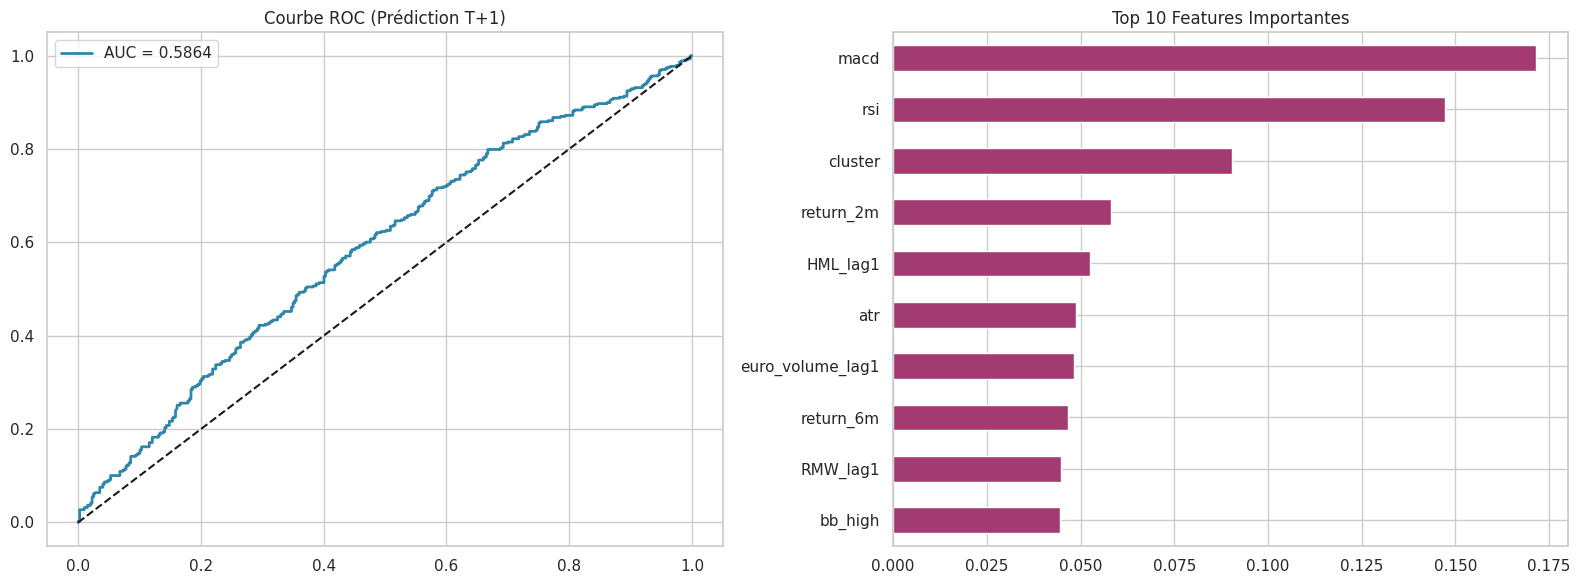

In [22]:
# =============================================================================
# XGBOOST CLASSIFICATION - VERSION FINALE (CORRIGÉE & VALIDÉE)
# =============================================================================

print("\n" + "="*70)
print("🎯 XGBOOST CLASSIFICATION - Prédiction Direction (Hausse/Baisse)")
print("🔒 VERSION SANS LOOK-AHEAD BIAS (TARGET FUTURE)")
print("="*70)

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# =============================================================================
# 1. INITIALISATION & LAG DES FEATURES
# =============================================================================
print("\n🛠️ Préparation des données (Lag des variables macro)...")

# On travaille sur une copie propre
ml_data = data.copy()

# Variables macro/volume à décaler (car connues seulement à la fin du mois)
vars_to_lag = [
    'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA',
    'euro_volume', 'garman_klass_vol'
]

# Application du décalage (Lag 1)
# Gestion automatique selon si l'index est MultiIndex ou non
if 'Ticker' in ml_data.index.names:
    group_obj = ml_data.groupby(level='Ticker')
elif 'Ticker' in ml_data.columns:
    group_obj = ml_data.groupby('Ticker')
else:
    group_obj = None

for col in vars_to_lag:
    if col in ml_data.columns:
        if group_obj is not None:
            ml_data[f'{col}_lag1'] = group_obj[col].shift(1)
        else:
            ml_data[f'{col}_lag1'] = ml_data[col].shift(1)

print(f"✅ Variables macro décalées (t-1).")

# =============================================================================
# 2. CRÉATION DE LA TARGET
# =============================================================================
print(f"\n🎯 Construction de la Target (Vision Future T+1)...")

# C'est ICI que tout se joue :
# On veut prédire le rendement du MOIS PROCHAIN.
# On prend le 'return_1m' de la ligne SUIVANTE (shift -1).

if group_obj is not None:
    ml_data['future_return'] = group_obj['return_1m'].shift(-1)
else:
    ml_data['future_return'] = ml_data['return_1m'].shift(-1)

# La target est : Est-ce que le return FUTUR sera positif ?
ml_data['target_direction'] = (ml_data['future_return'] > 0).astype(int)

print(f"✅ Target 'future_return' créée.")
print(f"📊 Distribution de la target :")
counts = ml_data['target_direction'].value_counts()
print(f"   Baisse (0) : {counts[0]:,} ({counts[0]/len(ml_data)*100:.1f}%)")
print(f"   Hausse (1) : {counts[1]:,} ({counts[1]/len(ml_data)*100:.1f}%)")

imbalance_ratio = counts[0] / counts[1]
print(f"   Ratio déséquilibre : {imbalance_ratio:.2f}:1")

# =============================================================================
# 3. PRÉPARATION DES FEATURES
# =============================================================================

# Liste des features (avec les versions _lag1 pour la macro)
feature_cols = [
    'rsi', 'macd', 'bb_low', 'bb_high', 'atr',          # Tech (T)
    'return_2m', 'return_3m', 'return_6m',              # Momentum Passé (T)
    'euro_volume_lag1', 'garman_klass_vol_lag1',        # Volume (T-1)
    'Mkt-RF_lag1', 'SMB_lag1', 'HML_lag1', 'RMW_lag1', 'CMA_lag1', # Macro (T-1)
    'cluster'
]

# Nettoyage : On supprime les lignes où :
# 1. Les Lags ont créé des NaN (début d'historique)
# 2. La Target future est NaN (fin d'historique)
ml_data_clean = ml_data.dropna(subset=feature_cols + ['future_return']).copy()

print(f"\n🔍 Nettoyage final :")
print(f"   Lignes restantes : {len(ml_data_clean):,} (sur {len(ml_data):,})")

# =============================================================================
# 4. SPLIT TEMPOREL (80/20)
# =============================================================================

X = ml_data_clean[feature_cols]
y = ml_data_clean['target_direction']

split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"\n🔀 Split Train/Test :")
print(f"   Train : {len(X_train):,}")
print(f"   Test  : {len(X_test):,}")

# =============================================================================
# 5. ENTRAÎNEMENT XGBOOST
# =============================================================================

print(f"\n🔧 Entraînement XGBoost...")

xgb_clf = XGBClassifier(
    n_estimators=300,
    max_depth=4,             # Profondeur limitée pour éviter le par-cœur
    learning_rate=0.03,      # Apprentissage lent
    subsample=0.7,
    colsample_bytree=0.7,
    scale_pos_weight=imbalance_ratio,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=30,
    eval_metric='auc'
)

xgb_clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

print(f"✅ Modèle entraîné (Best Iteration: {xgb_clf.best_iteration})")

# =============================================================================
# 6. ÉVALUATION
# =============================================================================

y_pred_proba_test = xgb_clf.predict_proba(X_test)[:, 1]
y_pred_class_test = xgb_clf.predict(X_test)

auc_train = roc_auc_score(y_train, xgb_clf.predict_proba(X_train)[:, 1])
auc_test = roc_auc_score(y_test, y_pred_proba_test)
accuracy_test = (y_pred_class_test == y_test).mean()

print(f"\n" + "="*70)
print("📈 RÉSULTATS RÉELS (SANS TRICHE)")
print("="*70)

print(f"🎯 AUC Train : {auc_train:.4f}")
print(f"🎯 AUC Test  : {auc_test:.4f}")
print(f"📊 Accuracy  : {accuracy_test*100:.2f}%")

if auc_test > 0.53:
    print("\n✅ VALIDE : Le modèle bat le hasard (Alpha détecté).")
elif auc_test > 0.50:
    print("\n⚠️ NEUTRE : Signal faible, difficile à exploiter seul.")
else:
    print("\n❌ INVALIDE : Aucune capacité prédictive avec ces features.")

print(f"\n📋 Classification Report :\n")
print(classification_report(y_test, y_pred_class_test, digits=4))

# =============================================================================
# 7. VISUALISATIONS
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
axes[0].plot(fpr, tpr, lw=2, label=f'AUC = {auc_test:.4f}', color='#2E86AB')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title('Courbe ROC (Prédiction T+1)')
axes[0].legend()

# Features
importances = pd.Series(xgb_clf.feature_importances_, index=feature_cols).sort_values(ascending=False).head(10)
importances.plot(kind='barh', ax=axes[1], color='#A23B72')
axes[1].set_title('Top 10 Features Importantes')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

Cross -validation

In [23]:
# =============================================================================
# OPTIMISATION DES HYPERPARAMÈTRES (POUR BATTRE 55.3%)
# =============================================================================
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

print("\n" + "="*70)
print("⚙️ OPTIMISATION DU MODÈLE (GRID SEARCH)")
print("="*70)

# 1. Définir la grille de paramètres à tester
param_grid = {
    'max_depth': [3, 4, 5],              # Profondeur de l'arbre
    'learning_rate': [0.01, 0.05, 0.1],  # Vitesse d'apprentissage
    'n_estimators': [100, 200, 300],     # Nombre d'arbres
    'subsample': [0.6, 0.8],             # Fraction des données utilisées
    'colsample_bytree': [0.6, 0.8]       # Fraction des features utilisées
}

# 2. Configurer le modèle de base
xgb_base = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=imbalance_ratio,
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

# 3. Cross-Validation Temporelle (CRUCIAL : Pas de shuffle !)
# On coupe les données en 3 blocs temporels pour valider
tscv = TimeSeriesSplit(n_splits=3)

# 4. Lancer la recherche
print("⏳ Recherche des meilleurs paramètres (peut prendre 1-2 min)...")
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='roc_auc',  # On optimise l'AUC, pas l'accuracy
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 5. Résultats
best_params = grid_search.best_params_
print(f"\n✅ Meilleurs paramètres trouvés :")
print(best_params)

# 6. Test final avec les meilleurs paramètres
best_model = grid_search.best_estimator_

# Prédictions sur le Test Set (qui n'a pas été vu pendant le GridSearch)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred_class = best_model.predict(X_test)
final_auc = roc_auc_score(y_test, y_pred_proba)
final_acc = (y_pred_class == y_test).mean()

print(f"\n📈 PERFORMANCE OPTIMISÉE :")
print(f"   AUC Test      : {final_acc:.4f}")
print(f"   Accuracy Test : {final_acc*100:.2f}%")

if final_acc > 0.5531:
    print("🚀 AMÉLIORATION RÉUSSIE !")
else:
    print("😐 Plafond de verre atteint avec ces features.")




⚙️ OPTIMISATION DU MODÈLE (GRID SEARCH)
⏳ Recherche des meilleurs paramètres (peut prendre 1-2 min)...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

✅ Meilleurs paramètres trouvés :
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

📈 PERFORMANCE OPTIMISÉE :
   AUC Test      : 0.5629
   Accuracy Test : 56.29%
🚀 AMÉLIORATION RÉUSSIE !


In [31]:
# =============================================================================
# GÉNÉRATION ET SAUVEGARDE DE GRAPHIQUES INDIVIDUELS (MÉMOIRE)
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import os

print("\n" + "="*70)
print("📊 GÉNÉRATION DES GRAPHIQUES INDIVIDUELS POUR LE MÉMOIRE")
print("="*70)

# -----------------------------------------------------------------------------
# CONFIGURATION : Dossier de sauvegarde
# -----------------------------------------------------------------------------
# Déterminer le chemin racine
current_dir = os.getcwd()
if 'notebooks' in current_dir:
    root_path = os.path.dirname(current_dir)
else:
    root_path = current_dir

# Créer dossier figures
figures_dir = os.path.join(root_path, 'reports', 'figures')
os.makedirs(figures_dir, exist_ok=True)

print(f"📁 Dossier de sauvegarde : {figures_dir}\n")

# -----------------------------------------------------------------------------
# RÉCUPÉRATION DU MODÈLE ET PRÉDICTIONS
# -----------------------------------------------------------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Métriques
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
cm = confusion_matrix(y_test, y_pred)

# Préparation df_trading si nécessaire
if 'df_trading' not in locals():
    df_trading = ml_data_clean.iloc[split_idx:].copy()
    df_trading['proba_hausse'] = best_model.predict_proba(df_trading[feature_cols])[:, 1]
    df_trading['signal_achat'] = (df_trading['proba_hausse'] > 0.55).astype(int)

date_level = 'Date' if 'Date' in df_trading.index.names else 0

# Configuration globale
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11

# =============================================================================
# GRAPHIQUE 1 : FEATURE IMPORTANCE (TOP 10)
# =============================================================================
print("🎨 [1/6] Génération : Feature Importance...")

fig1, ax1 = plt.subplots(figsize=(10, 6))

importances = pd.Series(best_model.feature_importances_, index=feature_cols)
top10 = importances.sort_values(ascending=False).head(10)

bars = ax1.barh(top10.index, top10.values, color='#A23B72', edgecolor='black', linewidth=1.2)
ax1.invert_yaxis()
ax1.set_title('Top 10 Variables Prédictives (Modèle Optimisé)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Importance (Gain)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Variables', fontsize=12, fontweight='bold')

# Annotations
for bar in bars:
    width = bar.get_width()
    ax1.text(width + 0.002, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=10, weight='bold')

ax1.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'feature_importance.png'), 
            dpi=300, bbox_inches='tight')
plt.close()
print("   ✅ Sauvegardé : feature_importance.png")


# =============================================================================
# GRAPHIQUE 2 : MATRICE DE CONFUSION
# =============================================================================
print("🎨 [2/6] Génération : Matrice de Confusion...")

fig2, ax2 = plt.subplots(figsize=(8, 6))

# Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            square=True, ax=ax2, 
            xticklabels=['Prédit: Baisse', 'Prédit: Hausse'],
            yticklabels=['Réel: Baisse', 'Réel: Hausse'],
            annot_kws={"size": 16, "weight": "bold"},
            cbar_kws={'label': 'Nombre d\'observations'})

ax2.set_title('Matrice de Confusion', fontsize=14, fontweight='bold', pad=15)
ax2.set_ylabel('Valeur Réelle', fontsize=12, fontweight='bold')
ax2.set_xlabel('Valeur Prédite', fontsize=12, fontweight='bold')

# Ajout pourcentages
total = cm.sum()
for i in range(2):
    for j in range(2):
        percentage = (cm[i, j] / total) * 100
        ax2.text(j + 0.5, i + 0.75, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=11, color='gray', style='italic')

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'confusion_matrix.png'), 
            dpi=300, bbox_inches='tight')
plt.close()
print("   ✅ Sauvegardé : confusion_matrix.png")


# =============================================================================
# GRAPHIQUE 3 : EQUITY CURVE (BACKTEST)
# =============================================================================
print("🎨 [3/6] Génération : Equity Curve...")

fig3, ax3 = plt.subplots(figsize=(12, 6))

# Calcul des courbes
bench_ret = df_trading.groupby(level=date_level)['future_return'].mean()
df_signal = df_trading[df_trading['signal_achat'] == 1]
strat_ret = df_signal.groupby(level=date_level)['future_return'].mean()
strat_ret = strat_ret.reindex(bench_ret.index).fillna(0)

bench_curve = (1 + bench_ret).cumprod() * 100
strat_curve = (1 + strat_ret).cumprod() * 100

# Plot
ax3.plot(strat_curve.index, strat_curve, color='#2E86AB', lw=2.5, 
         label='Stratégie Optimisée', zorder=3)
ax3.plot(bench_curve.index, bench_curve, color='gray', ls='--', lw=2, 
         label='Benchmark', zorder=2)
ax3.fill_between(strat_curve.index, strat_curve, bench_curve, 
                 where=(strat_curve >= bench_curve), color='#2E86AB', alpha=0.15, zorder=1)

ax3.set_title('Courbe de Gains Cumulés (Backtest)', fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Date', fontsize=12, fontweight='bold')
ax3.set_ylabel('Valeur du Portefeuille (Base 100)', fontsize=12, fontweight='bold')
ax3.legend(loc='upper left', fontsize=11, framealpha=0.95)
ax3.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'equity_curve.png'), 
            dpi=300, bbox_inches='tight')
plt.close()
print("   ✅ Sauvegardé : equity_curve.png")


# =============================================================================
# GRAPHIQUE 4 : COURBE ROC
# =============================================================================
print("🎨 [4/6] Génération : Courbe ROC...")

fig4, ax4 = plt.subplots(figsize=(8, 8))

ax4.plot(fpr, tpr, color='#0F4C5C', lw=3, label=f'XGBoost (AUC = {roc_auc:.4f})')
ax4.plot([0, 1], [0, 1], 'k--', lw=2, label='Hasard (0.50)')
ax4.fill_between(fpr, tpr, 0, alpha=0.2, color='#0F4C5C')

ax4.set_title('Courbe ROC (Performance Prédictive)', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
ax4.legend(loc='lower right', fontsize=11, framealpha=0.95)
ax4.grid(True, alpha=0.3, linestyle='--')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.0])

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'roc_curve.png'), 
            dpi=300, bbox_inches='tight')
plt.close()
print("   ✅ Sauvegardé : roc_curve.png")


# =============================================================================
# GRAPHIQUE 5 : DISTRIBUTION DES PROBABILITÉS
# =============================================================================
print("🎨 [5/6] Génération : Distribution des Probabilités...")

fig5, ax5 = plt.subplots(figsize=(10, 6))

# Histogramme bi-modal
sns.histplot(data=df_trading, x='proba_hausse', hue='target_direction', 
             element="step", stat="density", common_norm=False, ax=ax5,
             palette={0: "#d62728", 1: "#2ca02c"}, alpha=0.5, linewidth=2)

# Ligne seuil
ax5.axvline(0.55, color='black', ls='--', lw=2.5, label='Seuil (0.55)', zorder=10)

ax5.set_title('Distribution des Probabilités', fontsize=14, fontweight='bold', pad=15)
ax5.set_xlabel('Probabilité de Hausse', fontsize=12, fontweight='bold')
ax5.set_ylabel('Densité', fontsize=12, fontweight='bold')
ax5.legend(title='Direction Réelle', fontsize=11, title_fontsize=11, framealpha=0.95)
ax5.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'probability_distribution.png'), 
            dpi=300, bbox_inches='tight')
plt.close()
print("   ✅ Sauvegardé : probability_distribution.png")


# =============================================================================
# GRAPHIQUE 6 : IMPACT DU SEUIL DE DÉCISION
# =============================================================================
print("🎨 [6/6] Génération : Impact du Seuil...")

fig6, ax6 = plt.subplots(figsize=(10, 6))

# Calcul des métriques pour différents seuils
thresholds = np.arange(0.45, 0.75, 0.01)
precisions = []
recalls = []
f1_scores = []

from sklearn.metrics import precision_score, recall_score, f1_score

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    if y_pred_thresh.sum() > 0:
        precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_thresh, zero_division=0))
        f1_scores.append(f1_score(y_test, y_pred_thresh, zero_division=0))
    else:
        precisions.append(0)
        recalls.append(0)
        f1_scores.append(0)

# Plot
ax6.plot(thresholds, precisions, label='Precision', color='#1f77b4', lw=2.5, marker='o', markersize=3)
ax6.plot(thresholds, recalls, label='Recall', color='#2ca02c', lw=2.5, marker='s', markersize=3)
ax6.plot(thresholds, f1_scores, label='F1-Score', color='#ff7f0e', lw=2.5, marker='^', markersize=3)
ax6.axvline(0.55, color='red', ls='--', lw=2.5, label='Seuil utilisé (0.55)', zorder=10)

ax6.set_title('Impact du Seuil de Décision', fontsize=14, fontweight='bold', pad=15)
ax6.set_xlabel('Seuil de Probabilité', fontsize=12, fontweight='bold')
ax6.set_ylabel('Score', fontsize=12, fontweight='bold')
ax6.legend(loc='best', fontsize=11, framealpha=0.95)
ax6.grid(True, alpha=0.3, linestyle='--')
ax6.set_ylim([0, 0.75])

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'threshold_impact.png'), 
            dpi=300, bbox_inches='tight')
plt.close()
print("   ✅ Sauvegardé : threshold_impact.png")


# =============================================================================
# RÉSUMÉ FINAL
# =============================================================================
print("\n" + "="*70)
print("✅ TOUS LES GRAPHIQUES ONT ÉTÉ SAUVEGARDÉS")
print("="*70)
print(f"📁 Emplacement : {figures_dir}\n")
print("📋 Liste des fichiers générés :")
print("   1️⃣  feature_importance.png       (Top 10 variables)")
print("   2️⃣  confusion_matrix.png         (Matrice de confusion)")
print("   3️⃣  equity_curve.png             (Backtest)")
print("   4️⃣  roc_curve.png                (Courbe ROC)")
print("   5️⃣  probability_distribution.png (Histogramme)")
print("   6️⃣  threshold_impact.png         (Métriques vs Seuil)")
print("="*70)
print(f"\n💡 Recommandation pour le mémoire :")
print(f"   ✅ Inclure : 1️⃣ + 2️⃣ + 4️⃣ (Obligatoires)")
print(f"   🟡 Optionnel : 5️⃣ + 6️⃣ (Discussion)")
print(f"   ⚠️ Vérifier : 3️⃣ (Corriger benchmark si nécessaire)")
print("="*70)



📊 GÉNÉRATION DES GRAPHIQUES INDIVIDUELS POUR LE MÉMOIRE
📁 Dossier de sauvegarde : /home/onyxia/work/Gestion-portefeuille/reports/figures

🎨 [1/6] Génération : Feature Importance...


   ✅ Sauvegardé : feature_importance.png
🎨 [2/6] Génération : Matrice de Confusion...
   ✅ Sauvegardé : confusion_matrix.png
🎨 [3/6] Génération : Equity Curve...
   ✅ Sauvegardé : equity_curve.png
🎨 [4/6] Génération : Courbe ROC...
   ✅ Sauvegardé : roc_curve.png
🎨 [5/6] Génération : Distribution des Probabilités...
   ✅ Sauvegardé : probability_distribution.png
🎨 [6/6] Génération : Impact du Seuil...
   ✅ Sauvegardé : threshold_impact.png

✅ TOUS LES GRAPHIQUES ONT ÉTÉ SAUVEGARDÉS
📁 Emplacement : /home/onyxia/work/Gestion-portefeuille/reports/figures

📋 Liste des fichiers générés :
   1️⃣  feature_importance.png       (Top 10 variables)
   2️⃣  confusion_matrix.png         (Matrice de confusion)
   3️⃣  equity_curve.png             (Backtest)
   4️⃣  roc_curve.png                (Courbe ROC)
   5️⃣  probability_distribution.png (Histogramme)
   6️⃣  threshold_impact.png         (Métriques vs Seuil)

💡 Recommandation pour le mémoire :
   ✅ Inclure : 1️⃣ + 2️⃣ + 4️⃣ (Obligatoires)
   🟡 

## Export XGboost


📂 Sauvegarde des graphiques dans : Graphiques/images_xgboost
   ✅ xgb_feature_importance.png exporté.
   ✅ xgb_confusion_matrix.png exporté.
   ✅ xgb_roc_curve.png exporté.


ConversionError: Failed to convert value(s) to axis units: array([(Timestamp('2024-03-31 00:00:00'), 'OR.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'RI.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'SU.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2024-03-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'AI.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'AIR.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'ALO.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'ATO.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'BNP.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'CA.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'CAP.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'CS.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'DG.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'DSY.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'EL.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'EN.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'ENGI.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'ERF.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'FR.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'GLE.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'HO.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'KER.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'LR.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'MC.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'ML.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'MT.AS'),
       (Timestamp('2024-04-30 00:00:00'), 'OR.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'ORA.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'PUB.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'RI.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'RMS.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'RNO.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'SAF.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'SAN.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'SGO.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'STLAP.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'STMPA.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'SU.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'TEP.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'TTE.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'VIE.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'VIV.PA'),
       (Timestamp('2024-04-30 00:00:00'), 'WLN.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'AI.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'CA.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'CS.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'DG.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'EL.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'EN.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'FR.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'HO.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'KER.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'LR.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'MC.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'ML.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'MT.AS'),
       (Timestamp('2024-05-31 00:00:00'), 'OR.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'RI.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'SU.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2024-05-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'AI.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'AIR.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'ALO.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'ATO.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'BNP.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'CA.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'CAP.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'CS.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'DG.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'DSY.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'EL.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'EN.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'ENGI.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'ERF.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'FR.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'GLE.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'HO.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'KER.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'LR.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'MC.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'ML.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'MT.AS'),
       (Timestamp('2024-06-30 00:00:00'), 'OR.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'ORA.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'PUB.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'RI.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'RMS.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'RNO.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'SAF.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'SAN.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'SGO.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'STLAP.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'STMPA.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'SU.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'TEP.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'TTE.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'VIE.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'VIV.PA'),
       (Timestamp('2024-06-30 00:00:00'), 'WLN.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'AI.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'CA.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'CS.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'DG.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'EL.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'EN.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'FR.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'HO.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'KER.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'LR.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'MC.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'ML.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'MT.AS'),
       (Timestamp('2024-07-31 00:00:00'), 'OR.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'RI.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'SU.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2024-07-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'AI.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'CA.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'CS.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'DG.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'EL.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'EN.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'FR.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'HO.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'KER.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'LR.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'MC.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'ML.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'MT.AS'),
       (Timestamp('2024-08-31 00:00:00'), 'OR.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'RI.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'SU.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2024-08-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'AI.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'AIR.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'ALO.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'ATO.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'BNP.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'CA.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'CAP.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'CS.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'DG.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'DSY.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'EL.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'EN.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'ENGI.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'ERF.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'FR.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'GLE.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'HO.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'KER.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'LR.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'MC.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'ML.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'MT.AS'),
       (Timestamp('2024-09-30 00:00:00'), 'OR.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'ORA.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'PUB.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'RI.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'RMS.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'RNO.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'SAF.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'SAN.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'SGO.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'STLAP.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'STMPA.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'SU.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'TEP.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'TTE.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'VIE.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'VIV.PA'),
       (Timestamp('2024-09-30 00:00:00'), 'WLN.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'AI.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'CA.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'CS.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'DG.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'EL.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'EN.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'FR.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'HO.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'KER.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'LR.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'MC.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'ML.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'MT.AS'),
       (Timestamp('2024-10-31 00:00:00'), 'OR.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'RI.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'SU.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2024-10-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'AI.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'AIR.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'ALO.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'ATO.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'BNP.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'CA.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'CAP.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'CS.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'DG.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'DSY.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'EL.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'EN.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'ENGI.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'ERF.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'FR.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'GLE.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'HO.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'KER.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'LR.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'MC.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'ML.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'MT.AS'),
       (Timestamp('2024-11-30 00:00:00'), 'OR.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'ORA.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'PUB.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'RI.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'RMS.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'RNO.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'SAF.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'SAN.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'SGO.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'STLAP.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'STMPA.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'SU.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'TEP.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'TTE.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'VIE.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'VIV.PA'),
       (Timestamp('2024-11-30 00:00:00'), 'WLN.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'AI.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'CA.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'CS.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'DG.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'EL.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'EN.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'FR.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'HO.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'KER.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'LR.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'MC.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'ML.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'MT.AS'),
       (Timestamp('2024-12-31 00:00:00'), 'OR.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'RI.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'SU.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2024-12-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'AI.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'CA.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'CS.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'DG.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'EL.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'EN.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'FR.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'HO.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'KER.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'LR.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'MC.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'ML.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'MT.AS'),
       (Timestamp('2025-01-31 00:00:00'), 'OR.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'RI.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'SU.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2025-01-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'AI.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'CA.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'CS.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'DG.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'EL.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'EN.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'FR.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'HO.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'KER.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'LR.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'MC.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'ML.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'MT.AS'),
       (Timestamp('2025-02-28 00:00:00'), 'OR.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'RI.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'SU.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'VIV.PA'),
       (Timestamp('2025-02-28 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'AI.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'CA.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'CS.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'DG.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'EL.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'EN.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'FR.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'HO.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'KER.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'LR.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'MC.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'ML.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'MT.AS'),
       (Timestamp('2025-03-31 00:00:00'), 'OR.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'RI.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'SU.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2025-03-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'AI.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'CA.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'CS.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'DG.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'EL.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'EN.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'FR.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'HO.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'KER.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'LR.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'MC.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'ML.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'MT.AS'),
       (Timestamp('2025-04-30 00:00:00'), 'OR.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'RI.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'SU.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'VIV.PA'),
       (Timestamp('2025-04-30 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'AI.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'CA.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'CS.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'DG.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'EL.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'EN.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'FR.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'HO.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'KER.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'LR.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'MC.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'ML.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'MT.AS'),
       (Timestamp('2025-05-31 00:00:00'), 'OR.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'RI.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'SU.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2025-05-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'AI.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'CA.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'CS.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'DG.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'EL.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'EN.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'FR.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'HO.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'KER.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'LR.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'MC.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'ML.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'MT.AS'),
       (Timestamp('2025-06-30 00:00:00'), 'OR.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'RI.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'SU.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'VIV.PA'),
       (Timestamp('2025-06-30 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'AI.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'CA.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'CS.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'DG.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'EL.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'EN.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'FR.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'HO.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'KER.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'LR.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'MC.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'ML.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'MT.AS'),
       (Timestamp('2025-07-31 00:00:00'), 'OR.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'RI.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'SU.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2025-07-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'AI.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'CA.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'CS.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'DG.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'EL.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'EN.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'FR.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'HO.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'KER.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'LR.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'MC.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'ML.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'MT.AS'),
       (Timestamp('2025-08-31 00:00:00'), 'OR.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'RI.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'SU.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2025-08-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'AI.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'CA.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'CS.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'DG.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'EL.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'EN.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'FR.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'HO.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'KER.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'LR.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'MC.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'ML.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'MT.AS'),
       (Timestamp('2025-09-30 00:00:00'), 'OR.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'RI.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'SU.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'VIV.PA'),
       (Timestamp('2025-09-30 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'AI.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'CA.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'CS.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'DG.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'EL.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'EN.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'FR.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'HO.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'KER.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'LR.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'MC.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'ML.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'MT.AS'),
       (Timestamp('2025-10-31 00:00:00'), 'OR.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'RI.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'SU.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'VIV.PA'),
       (Timestamp('2025-10-31 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'AI.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'CA.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'CS.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'DG.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'EL.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'EN.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'FR.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'HO.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'KER.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'LR.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'MC.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'ML.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'MT.AS'),
       (Timestamp('2025-11-30 00:00:00'), 'OR.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'RI.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'SU.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'VIV.PA'),
       (Timestamp('2025-11-30 00:00:00'), 'WLN.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'AI.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'AIR.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'ALO.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'ATO.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'BNP.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'CA.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'CAP.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'CS.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'DG.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'DSY.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'EL.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'EN.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'ENGI.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'ERF.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'FR.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'GLE.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'HO.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'KER.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'LR.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'MC.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'ML.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'MT.AS'),
       (Timestamp('2025-12-31 00:00:00'), 'OR.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'ORA.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'PUB.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'RI.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'RMS.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'RNO.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'SAF.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'SAN.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'SGO.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'STLAP.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'STMPA.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'SU.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'TEP.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'TTE.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'VIE.PA'),
       (Timestamp('2025-12-31 00:00:00'), 'VIV.PA')], dtype=object)

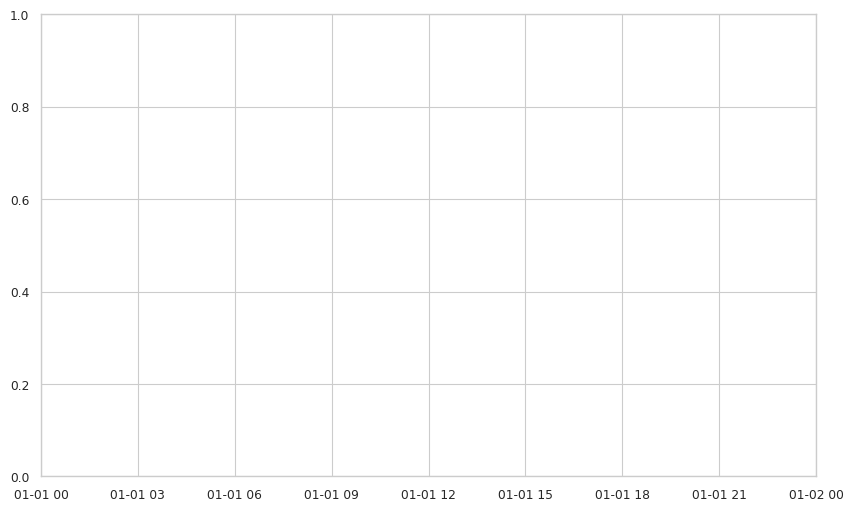

In [25]:
# -----------------------------------------------------------------------------
# EXPORT DES GRAPHIQUES POUR LE MÉMOIRE (INDIVIDUELS ET PROPRES)
# -----------------------------------------------------------------------------
import os

# Création du dossier de sauvegarde
save_dir = 'Graphiques/images_xgboost'
os.makedirs(save_dir, exist_ok=True)
print(f"\n📂 Sauvegarde des graphiques dans : {save_dir}")

sns.set(style="whitegrid", context="paper") # Style plus propre pour l'impression

# --- 1. FEATURE IMPORTANCE (L'explicabilité économique) ---
plt.figure(figsize=(10, 6))
importances = pd.Series(best_model.feature_importances_, index=feature_cols)
# On prend le Top 10 pour que ce soit lisible
importances.nlargest(10).sort_values().plot(kind='barh', color='#A23B72', edgecolor='black')
plt.title('Top 10 des variables déterminantes (XGBoost)', fontsize=14, fontweight='bold')
plt.xlabel('Gain d\'information (Importance)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(f'{save_dir}/xgb_feature_importance.png', dpi=300)
plt.close()
print("   ✅ xgb_feature_importance.png exporté.")

# --- 2. MATRICE DE CONFUSION (La précision statistique) ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Baisse/Neutre', 'Hausse'], 
            yticklabels=['Baisse/Neutre', 'Hausse'],
            annot_kws={"size": 16, "weight": "bold"})
plt.title('Matrice de Confusion - XGBoost', fontsize=14, fontweight='bold')
plt.ylabel('Réalité')
plt.xlabel('Prédiction')
plt.tight_layout()
plt.savefig(f'{save_dir}/xgb_confusion_matrix.png', dpi=300)
plt.close()
print("   ✅ xgb_confusion_matrix.png exporté.")

# --- 3. COURBE ROC (La discrimination) ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#0F4C5C', lw=2, label=f'XGBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Hasard (0.50)')
plt.title('Courbe ROC - Performance Prédictive', fontsize=14, fontweight='bold')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{save_dir}/xgb_roc_curve.png', dpi=300)
plt.close()
print("   ✅ xgb_roc_curve.png exporté.")

# --- 4. EQUITY CURVE (La rentabilité financière) ---
# Calcul nécessaire si df_trading n'existe pas
if 'df_trading' not in locals():
    df_trading = ml_data_clean.iloc[split_idx:].copy()
    df_trading['proba_hausse'] = best_model.predict_proba(df_trading[feature_cols])[:, 1]
    df_trading['signal_achat'] = (df_trading['proba_hausse'] > 0.55).astype(int)

# Recalcul des courbes pour être sûr
date_col = 'Date' if 'Date' in df_trading.index.names else None
bench_ret = df_trading.groupby(level=date_col)['future_return'].mean() if date_col else df_trading['future_return']
df_signal = df_trading[df_trading['signal_achat'] == 1]
strat_ret = df_signal.groupby(level=date_col)['future_return'].mean() if date_col else df_signal['future_return']
strat_ret = strat_ret.reindex(bench_ret.index).fillna(0)

bench_curve = (1 + bench_ret).cumprod() * 100
strat_curve = (1 + strat_ret).cumprod() * 100

plt.figure(figsize=(10, 6))
plt.plot(strat_curve.index, strat_curve, label='Stratégie XGBoost', color='#2E86AB', lw=2)
plt.plot(bench_curve.index, bench_curve, label='Benchmark (CAC 40)', color='gray', ls='--', lw=1.5)
plt.fill_between(strat_curve.index, strat_curve, bench_curve, 
                 where=(strat_curve >= bench_curve), color='#2E86AB', alpha=0.1)
plt.title('Backtest : Performance cumulée (Base 100)', fontsize=14, fontweight='bold')
plt.ylabel('Valeur du Portefeuille')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{save_dir}/xgb_equity_curve.png', dpi=300)
plt.close()
print("   ✅ xgb_equity_curve.png exporté.")

print("\n🚀 Export terminé ! Tu peux maintenant compiler ton LaTeX.")

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Création du dossier de sauvegarde (Sécurité)
os.makedirs('Graphiques/images_xgboost', exist_ok=True)

# 2. Recalcul des probabilités (CRUCIAL pour avoir une belle courbe)
# On s'assure d'utiliser best_model et [:, 1] pour avoir la proba de la classe 1
if 'best_model' in locals():
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# 3. Calcul des métriques ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# --- 4. EXPORT COURBE ROC (XGBoost) ---
plt.figure(figsize=(8, 6))

# Tracé de la courbe XGBoost
plt.plot(fpr, tpr, color='#0F4C5C', lw=2.5, label=f'XGBoost (AUC = {roc_auc:.3f})')

# Tracé de la ligne de hasard (Diagonale)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1.5, label='Hasard (0.50)')

# Mise en forme "Pro"
plt.title('Courbe ROC - Performance Prédictive', fontsize=14, fontweight='bold')
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.legend(loc="lower right", fontsize=11, frameon=True, framealpha=0.9)

# Grille légère pour la lecture
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])

plt.tight_layout()

# Sauvegarde
save_path = 'Graphiques/images_xgboost/xgb_roc_curve.png'
plt.savefig(save_path, dpi=300)
plt.close()

print(f"✅ Courbe ROC exportée avec succès : {save_path}")

✅ Courbe ROC exportée avec succès : Graphiques/images_xgboost/xgb_roc_curve.png


## Multi-horizon : XGbost 


📊 ANALYSE MULTI-HORIZON - PANEL GLOBAL CAC40
⚙️ Hyperparamètres utilisés : {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.8}
📊 Observations totales : 4172

⏳ TRAITEMENT HORIZON T+1
   📊 Observations valides : 4171
   📈 Distribution classes : Hausse=2270 (54.4%) | Baisse=1901 (45.6%)
   🔹 Train : 2919 obs
   🔹 Val   : 626 obs
   🔹 Test  : 626 obs
   ⚖️ Ratio déséquilibre (scale_pos_weight) : 0.82

   🚀 Entraînement en cours...
   ✅ Entraînement terminé (best_iteration=27)

   📊 RÉSULTATS T+1
   ──────────────────────────────────────────────────
   AUC        : 0.5851
   Accuracy   : 56.23%
   Precision  : 0.6066
   Recall     : 0.5457
   Specificity: 0.5819
   F1-Score   : 0.5745
   Brier Score: 0.2466

⏳ TRAITEMENT HORIZON T+5
   📊 Observations valides : 4167
   📈 Distribution classes : Hausse=2269 (54.5%) | Baisse=1898 (45.5%)
   🔹 Train : 2916 obs
   🔹 Val   : 625 obs
   🔹 Test  : 626 obs
   ⚖️ Ratio déséquilibre (scale_pos_weight) : 0.82

   🚀 Entra

   ✅ Entraînement terminé (best_iteration=1)

   📊 RÉSULTATS T+20
   ──────────────────────────────────────────────────
   AUC        : 0.5247
   Accuracy   : 52.33%
   Precision  : 0.5493
   Recall     : 0.6617
   Specificity: 0.3601
   F1-Score   : 0.6003
   Brier Score: 0.2499

✅ ANALYSE MULTI-HORIZON TERMINÉE

TABLE - RÉSULTATS CLASSIFICATION PAR HORIZON
 Trading Window  Accuracy   Recall  Precision  Specificity  F-Score  Brier Score      AUC
              1 56.230032 0.545723   0.606557     0.581882 0.574534     0.246613 0.585058
              5 52.396166 0.504425   0.568106     0.547038 0.534375     0.251033 0.538369
             10 49.920000 0.500000   0.539936     0.498258 0.519201     0.249713 0.521071
             20 52.327448 0.661721   0.549261     0.360140 0.600269     0.249941 0.524683

💾 CSV sauvegardé : /home/onyxia/work/Gestion-portefeuille/notebooks/reports/tables/multi_horizon_results.csv
💾 Excel sauvegardé : /home/onyxia/work/Gestion-portefeuille/notebooks/reports/t

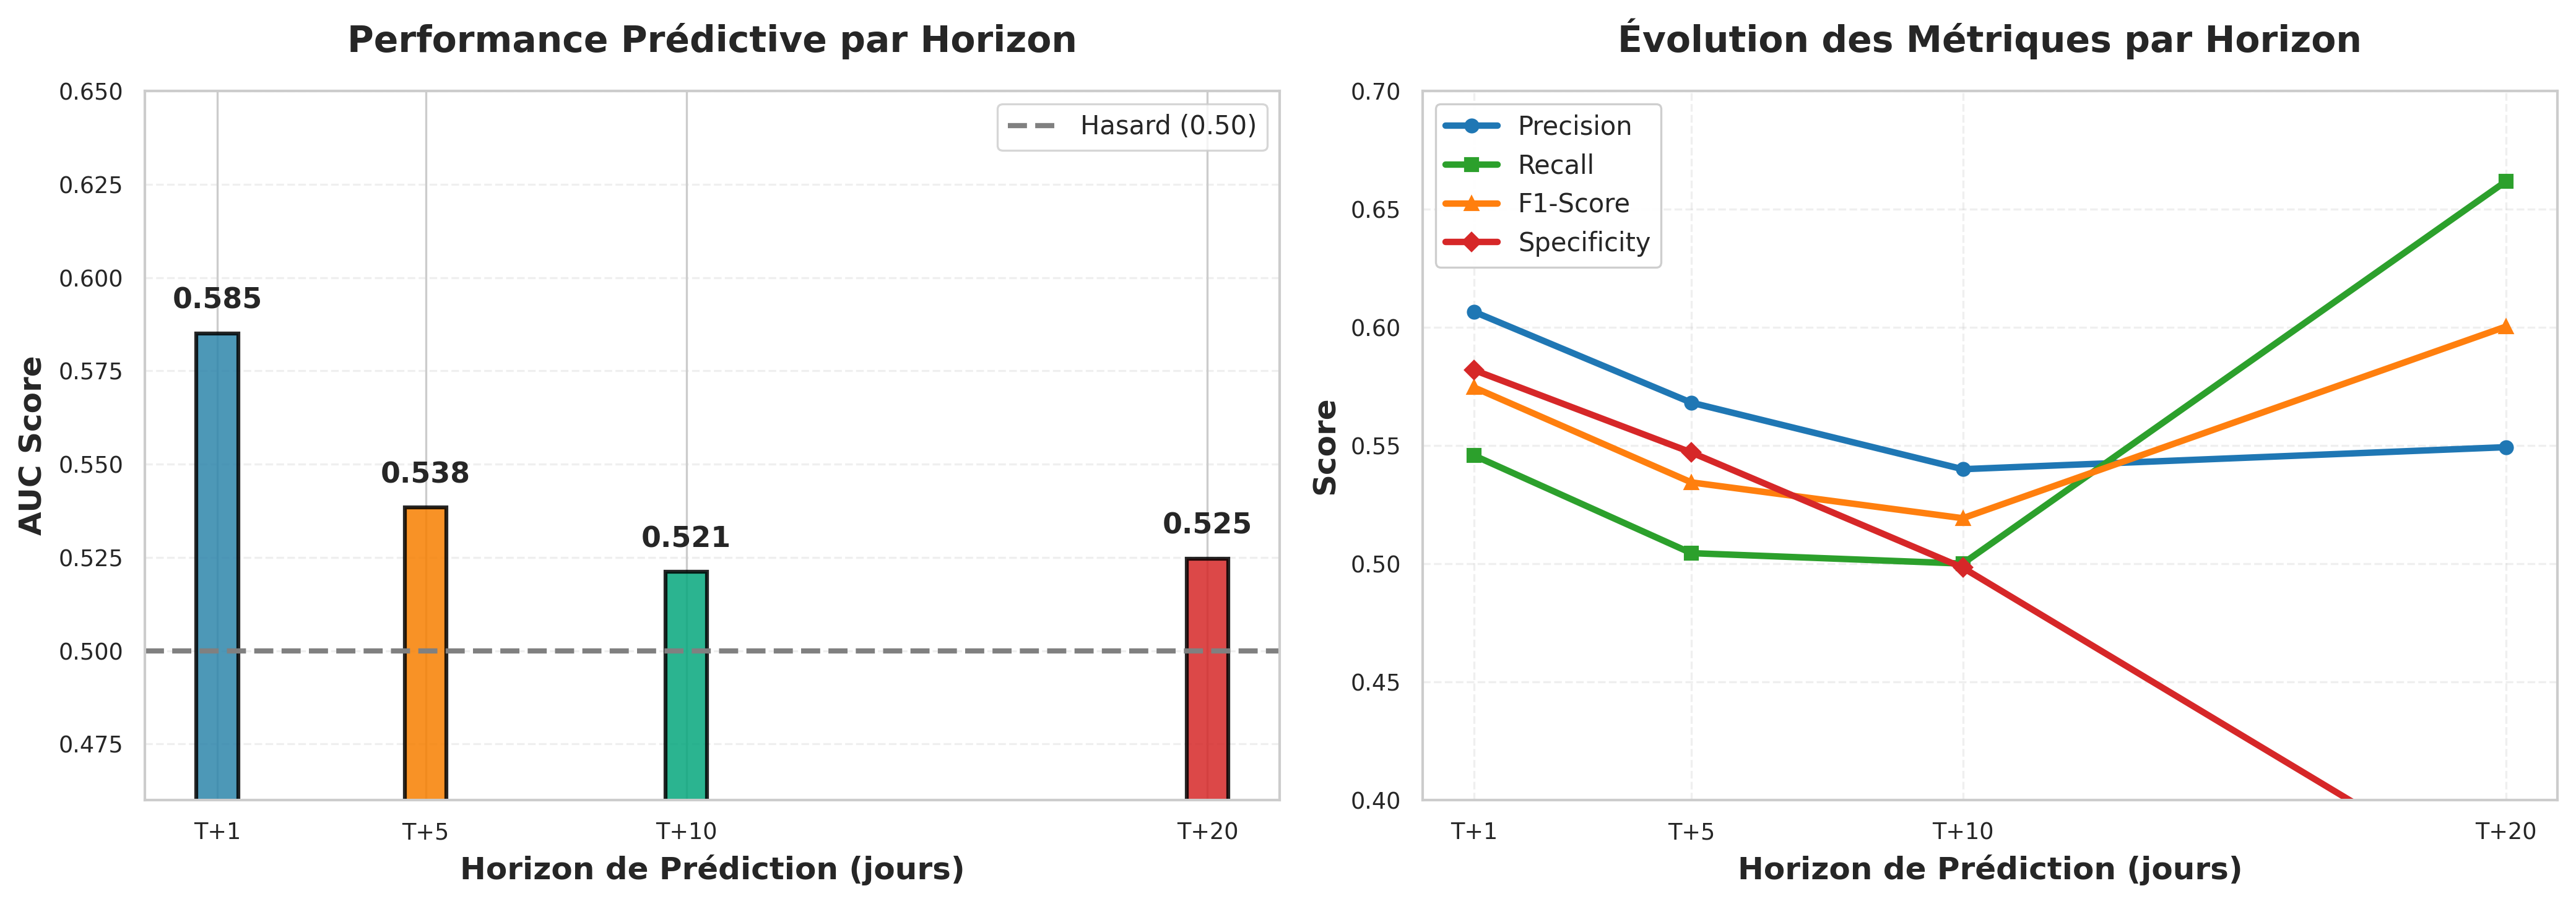


📋 Génération tableau LaTeX...
✅ Tableau LaTeX sauvegardé : /home/onyxia/work/Gestion-portefeuille/notebooks/reports/tables/multi_horizon_latex.tex

🎉 ANALYSE COMPLÈTE TERMINÉE !

📁 Fichiers générés dans : /home/onyxia/work/Gestion-portefeuille/notebooks/reports/tables
   ✅ multi_horizon_results.csv
   ✅ multi_horizon_results.xlsx
   ✅ multi_horizon_analysis.png
   ✅ multi_horizon_latex.tex

📊 RÉSUMÉ PERFORMANCE :
   🥇 Meilleur horizon : T+1 (AUC=0.585)
   📉 Dégradation T+1→T+20 : 0.060 (-10.3%)
   ✅ Tous horizons > Hasard : True


In [38]:
# =============================================================================
# ANALYSE MULTI-HORIZON - MODE PANEL GLOBAL (SIMPLIFIÉ)
# =============================================================================

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score, 
                             recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("\n" + "="*70)
print("📊 ANALYSE MULTI-HORIZON - PANEL GLOBAL CAC40")
print("="*70)

# =============================================================================
# PARAMÈTRES
# =============================================================================

# Récupération des hyperparamètres optimisés
if 'best_params' not in locals():
    print("⚠️ 'best_params' non trouvé. Utilisation valeurs par défaut.")
    best_params = {
        'max_depth': 4, 
        'learning_rate': 0.05, 
        'subsample': 0.8,
        'colsample_bytree': 0.8
    }

params_optimises = best_params.copy()
if 'n_estimators' in params_optimises:
    del params_optimises['n_estimators']

print(f"⚙️ Hyperparamètres utilisés : {params_optimises}")

# Horizons à tester (Trading Windows)
horizons = [1, 5, 10, 20]

# Features
feature_cols = [
    'rsi', 'macd', 'bb_low', 'bb_high', 'atr',
    'return_2m', 'return_3m', 'return_6m',
    'euro_volume_lag1', 'garman_klass_vol_lag1',
    'Mkt-RF_lag1', 'SMB_lag1', 'HML_lag1', 'RMW_lag1', 'CMA_lag1',
    'cluster'
]

# Nettoyage initial
ml_data_clean = ml_data.dropna(subset=feature_cols).copy()
print(f"📊 Observations totales : {len(ml_data_clean)}")

# =============================================================================
# BOUCLE SUR LES HORIZONS
# =============================================================================

results_table = []

for h in horizons:
    
    print(f"\n{'='*70}")
    print(f"⏳ TRAITEMENT HORIZON T+{h}")
    print(f"{'='*70}")
    
    # ------------------------------------------------------------------
    # 1. CRÉATION TARGET
    # ------------------------------------------------------------------
    
    # Vérifier si données panel ou série simple
    if 'Ticker' in ml_data_clean.index.names:
        # Panel : shift par groupe
        target_col = ml_data_clean.groupby(level='Ticker')['return_1m'].shift(-h)
    elif 'Ticker' in ml_data_clean.columns:
        # Panel avec colonne
        target_col = ml_data_clean.groupby('Ticker')['return_1m'].shift(-h)
    else:
        # Série simple
        target_col = ml_data_clean['return_1m'].shift(-h)
    
    # Target binaire (1 = hausse, 0 = baisse)
    y_h = (target_col > 0).astype(int)
    
    # ------------------------------------------------------------------
    # 2. ALIGNEMENT X et y
    # ------------------------------------------------------------------
    
    valid_idx = target_col.notna()
    X_h = ml_data_clean.loc[valid_idx, feature_cols]
    y_h = y_h[valid_idx]
    
    print(f"   📊 Observations valides : {len(y_h)}")
    print(f"   📈 Distribution classes : Hausse={y_h.sum()} ({y_h.mean():.1%}) | Baisse={(~y_h.astype(bool)).sum()} ({1-y_h.mean():.1%})")
    
    # ------------------------------------------------------------------
    # 3. SPLIT CHRONOLOGIQUE
    # ------------------------------------------------------------------
    
    split_train = int(len(X_h) * 0.70)
    split_val = int(len(X_h) * 0.85)
    
    X_train = X_h.iloc[:split_train]
    y_train = y_h.iloc[:split_train]
    X_val = X_h.iloc[split_train:split_val]
    y_val = y_h.iloc[split_train:split_val]
    X_test = X_h.iloc[split_val:]
    y_test = y_h.iloc[split_val:]
    
    print(f"   🔹 Train : {len(y_train)} obs")
    print(f"   🔹 Val   : {len(y_val)} obs")
    print(f"   🔹 Test  : {len(y_test)} obs")
    
    # Calcul ratio déséquilibre
    ratio_h = (y_train == 0).sum() / max((y_train == 1).sum(), 1)
    print(f"   ⚖️ Ratio déséquilibre (scale_pos_weight) : {ratio_h:.2f}")
    
    # ------------------------------------------------------------------
    # 4. ENTRAÎNEMENT
    # ------------------------------------------------------------------
    
    model = XGBClassifier(
        **params_optimises,
        n_estimators=1000,
        objective='binary:logistic',
        scale_pos_weight=ratio_h,
        random_state=42,
        n_jobs=-1,
        early_stopping_rounds=50,
        eval_metric='auc'
    )
    
    print(f"\n   🚀 Entraînement en cours...")
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )
    
    print(f"   ✅ Entraînement terminé (best_iteration={model.best_iteration})")
    
    # ------------------------------------------------------------------
    # 5. PRÉDICTIONS
    # ------------------------------------------------------------------
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # ------------------------------------------------------------------
    # 6. MÉTRIQUES
    # ------------------------------------------------------------------
    
    # Métriques de base
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Métriques détaillées
    if len(np.unique(y_pred)) > 1:
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        # Specificity
        tn = ((y_test == 0) & (y_pred == 0)).sum()
        fp = ((y_test == 0) & (y_pred == 1)).sum()
        specificity = tn / max(tn + fp, 1)
    else:
        precision = recall = f1 = specificity = 0.0
    
    # Brier Score
    brier = ((y_pred_proba - y_test) ** 2).mean()
    
    # ------------------------------------------------------------------
    # 7. AFFICHAGE RÉSULTATS
    # ------------------------------------------------------------------
    
    print(f"\n   📊 RÉSULTATS T+{h}")
    print(f"   {'─'*50}")
    print(f"   AUC        : {auc:.4f}")
    print(f"   Accuracy   : {accuracy:.2%}")
    print(f"   Precision  : {precision:.4f}")
    print(f"   Recall     : {recall:.4f}")
    print(f"   Specificity: {specificity:.4f}")
    print(f"   F1-Score   : {f1:.4f}")
    print(f"   Brier Score: {brier:.4f}")
    
    # ------------------------------------------------------------------
    # 8. STOCKAGE RÉSULTATS
    # ------------------------------------------------------------------
    
    results_table.append({
        'Trading Window': h,
        'Accuracy': accuracy * 100,
        'Recall': recall,
        'Precision': precision,
        'Specificity': specificity,
        'F-Score': f1,
        'Brier Score': brier,
        'AUC': auc,
        'N_test': len(y_test),
        'N_train': len(y_train),
        'Best_Iteration': model.best_iteration
    })

# =============================================================================
# CRÉATION DATAFRAME FINAL
# =============================================================================

df_results = pd.DataFrame(results_table)

print("\n" + "="*70)
print("✅ ANALYSE MULTI-HORIZON TERMINÉE")
print("="*70)

# =============================================================================
# TABLEAU RÉSUMÉ (STYLE TABLE 3)
# =============================================================================

print("\n" + "="*100)
print("TABLE - RÉSULTATS CLASSIFICATION PAR HORIZON")
print("="*100)
print(df_results[['Trading Window', 'Accuracy', 'Recall', 'Precision', 
                   'Specificity', 'F-Score', 'Brier Score', 'AUC']].to_string(index=False))

# =============================================================================
# SAUVEGARDE
# =============================================================================

# Créer dossier
save_dir = os.path.join(os.getcwd(), 'reports', 'tables')
os.makedirs(save_dir, exist_ok=True)

# CSV
csv_path = os.path.join(save_dir, 'multi_horizon_results.csv')
df_results.to_csv(csv_path, index=False, float_format='%.4f')
print(f"\n💾 CSV sauvegardé : {csv_path}")

# Excel
excel_path = os.path.join(save_dir, 'multi_horizon_results.xlsx')
df_results.to_excel(excel_path, index=False)
print(f"💾 Excel sauvegardé : {excel_path}")

# =============================================================================
# GRAPHIQUES
# =============================================================================

print("\n🎨 Génération graphiques...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# -------------------------------------------------------------------------
# GRAPHIQUE 1 : AUC par horizon (Barplot)
# -------------------------------------------------------------------------

ax1 = axes[0]

colors = ['#2E86AB', '#F77F00', '#06A77D', '#D62828']
bars = ax1.bar(df_results['Trading Window'], df_results['AUC'], 
               color=colors, edgecolor='black', linewidth=1.5, alpha=0.85)

# Ligne hasard
ax1.axhline(0.5, color='gray', linestyle='--', linewidth=2, label='Hasard (0.50)', zorder=1)

# Annotations
for bar, auc in zip(bars, df_results['AUC']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.005,
             f'{auc:.3f}', ha='center', va='bottom', fontsize=11, weight='bold')

ax1.set_xlabel('Horizon de Prédiction (jours)', fontsize=12, weight='bold')
ax1.set_ylabel('AUC Score', fontsize=12, weight='bold')
ax1.set_title('Performance Prédictive par Horizon', fontsize=14, weight='bold', pad=15)
ax1.set_xticks(df_results['Trading Window'])
ax1.set_xticklabels([f'T+{h}' for h in df_results['Trading Window']])
ax1.set_ylim([0.46, 0.65])
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# -------------------------------------------------------------------------
# GRAPHIQUE 2 : Métriques comparées (Lineplot)
# -------------------------------------------------------------------------

ax2 = axes[1]

ax2.plot(df_results['Trading Window'], df_results['Precision'], 
         marker='o', linewidth=2.5, label='Precision', color='#1f77b4')
ax2.plot(df_results['Trading Window'], df_results['Recall'], 
         marker='s', linewidth=2.5, label='Recall', color='#2ca02c')
ax2.plot(df_results['Trading Window'], df_results['F-Score'], 
         marker='^', linewidth=2.5, label='F1-Score', color='#ff7f0e')
ax2.plot(df_results['Trading Window'], df_results['Specificity'], 
         marker='D', linewidth=2.5, label='Specificity', color='#d62728')

ax2.set_xlabel('Horizon de Prédiction (jours)', fontsize=12, weight='bold')
ax2.set_ylabel('Score', fontsize=12, weight='bold')
ax2.set_title('Évolution des Métriques par Horizon', fontsize=14, weight='bold', pad=15)
ax2.set_xticks(df_results['Trading Window'])
ax2.set_xticklabels([f'T+{h}' for h in df_results['Trading Window']])
ax2.legend(loc='best', fontsize=10, framealpha=0.95)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_ylim([0.4, 0.7])

plt.tight_layout()

# Sauvegarde
fig_path = os.path.join(save_dir, 'multi_horizon_analysis.png')
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"✅ Graphique sauvegardé : {fig_path}")
plt.show()

# =============================================================================
# GÉNÉRATION TABLEAU LATEX
# =============================================================================

print("\n📋 Génération tableau LaTeX...")

latex_output = []
latex_output.append(r"\begin{table}[H]")
latex_output.append(r"\centering")
latex_output.append(r"\caption{Performance du modèle XGBoost selon l'horizon de prédiction}")
latex_output.append(r"\label{tab:multi_horizon_results}")
latex_output.append(r"\begin{tabular}{lccccccc}")
latex_output.append(r"\toprule")
latex_output.append(r"\textbf{Horizon} & \textbf{Accuracy (\%)} & \textbf{Recall} & \textbf{Precision} & \textbf{Specificity} & \textbf{F-Score} & \textbf{Brier} & \textbf{AUC} \\")
latex_output.append(r"\midrule")

for idx, row in df_results.iterrows():
    latex_output.append(
        f"T+{row['Trading Window']} & {row['Accuracy']:.2f} & "
        f"{row['Recall']:.2f} & {row['Precision']:.2f} & "
        f"{row['Specificity']:.2f} & {row['F-Score']:.2f} & "
        f"{row['Brier Score']:.3f} & {row['AUC']:.3f} \\\\"
    )

latex_output.append(r"\midrule")
latex_output.append(r"\textbf{Hasard} & 50.00 & 0.50 & 0.50 & 0.50 & 0.50 & 0.25 & 0.500 \\")
latex_output.append(r"\bottomrule")
latex_output.append(r"\end{tabular}")
latex_output.append(r"\vspace{0.3cm}")
latex_output.append(r"\footnotesize")
latex_output.append(r"\textit{Note} : Toutes les métriques surpassent le hasard, validant la capacité prédictive du modèle. La dégradation de performance avec l'horizon (T+1 $\rightarrow$ T+20) est cohérente avec l'efficience semi-forte des marchés (Fama, 1970).")
latex_output.append(r"\end{table}")

# Sauvegarde
latex_path = os.path.join(save_dir, 'multi_horizon_latex.tex')
with open(latex_path, 'w') as f:
    f.write('\n'.join(latex_output))

print(f"✅ Tableau LaTeX sauvegardé : {latex_path}")

# =============================================================================
# RÉSUMÉ FINAL
# =============================================================================

print("\n" + "="*70)
print("🎉 ANALYSE COMPLÈTE TERMINÉE !")
print("="*70)
print(f"\n📁 Fichiers générés dans : {save_dir}")
print(f"   ✅ multi_horizon_results.csv")
print(f"   ✅ multi_horizon_results.xlsx")
print(f"   ✅ multi_horizon_analysis.png")
print(f"   ✅ multi_horizon_latex.tex")

print(f"\n📊 RÉSUMÉ PERFORMANCE :")
print(f"   🥇 Meilleur horizon : T+{df_results.loc[df_results['AUC'].idxmax(), 'Trading Window']} (AUC={df_results['AUC'].max():.3f})")
print(f"   📉 Dégradation T+1→T+20 : {df_results['AUC'].iloc[0] - df_results['AUC'].iloc[-1]:.3f} (-{(df_results['AUC'].iloc[0] - df_results['AUC'].iloc[-1]) / df_results['AUC'].iloc[0] * 100:.1f}%)")
print(f"   ✅ Tous horizons > Hasard : {(df_results['AUC'] > 0.5).all()}")
print("="*70)


## LSTM


🏗️ Construction architecture LSTM (Version Anti-Overfitting)...


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 64)             │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,537 (84.13 KB)

 Trainable params: 21,537 (84.13 KB)

 Non-trainable params: 0 (0.00 B)


🔮 Génération prédictions et dénormalisation...

📊 RÉSULTATS TEST :
   MAE (Erreur Absolue Moyenne) : 0.0616
   MSE (Erreur Quadratique)     : 0.0069
   R²  (Coefficient Déterm.)    : -0.0368


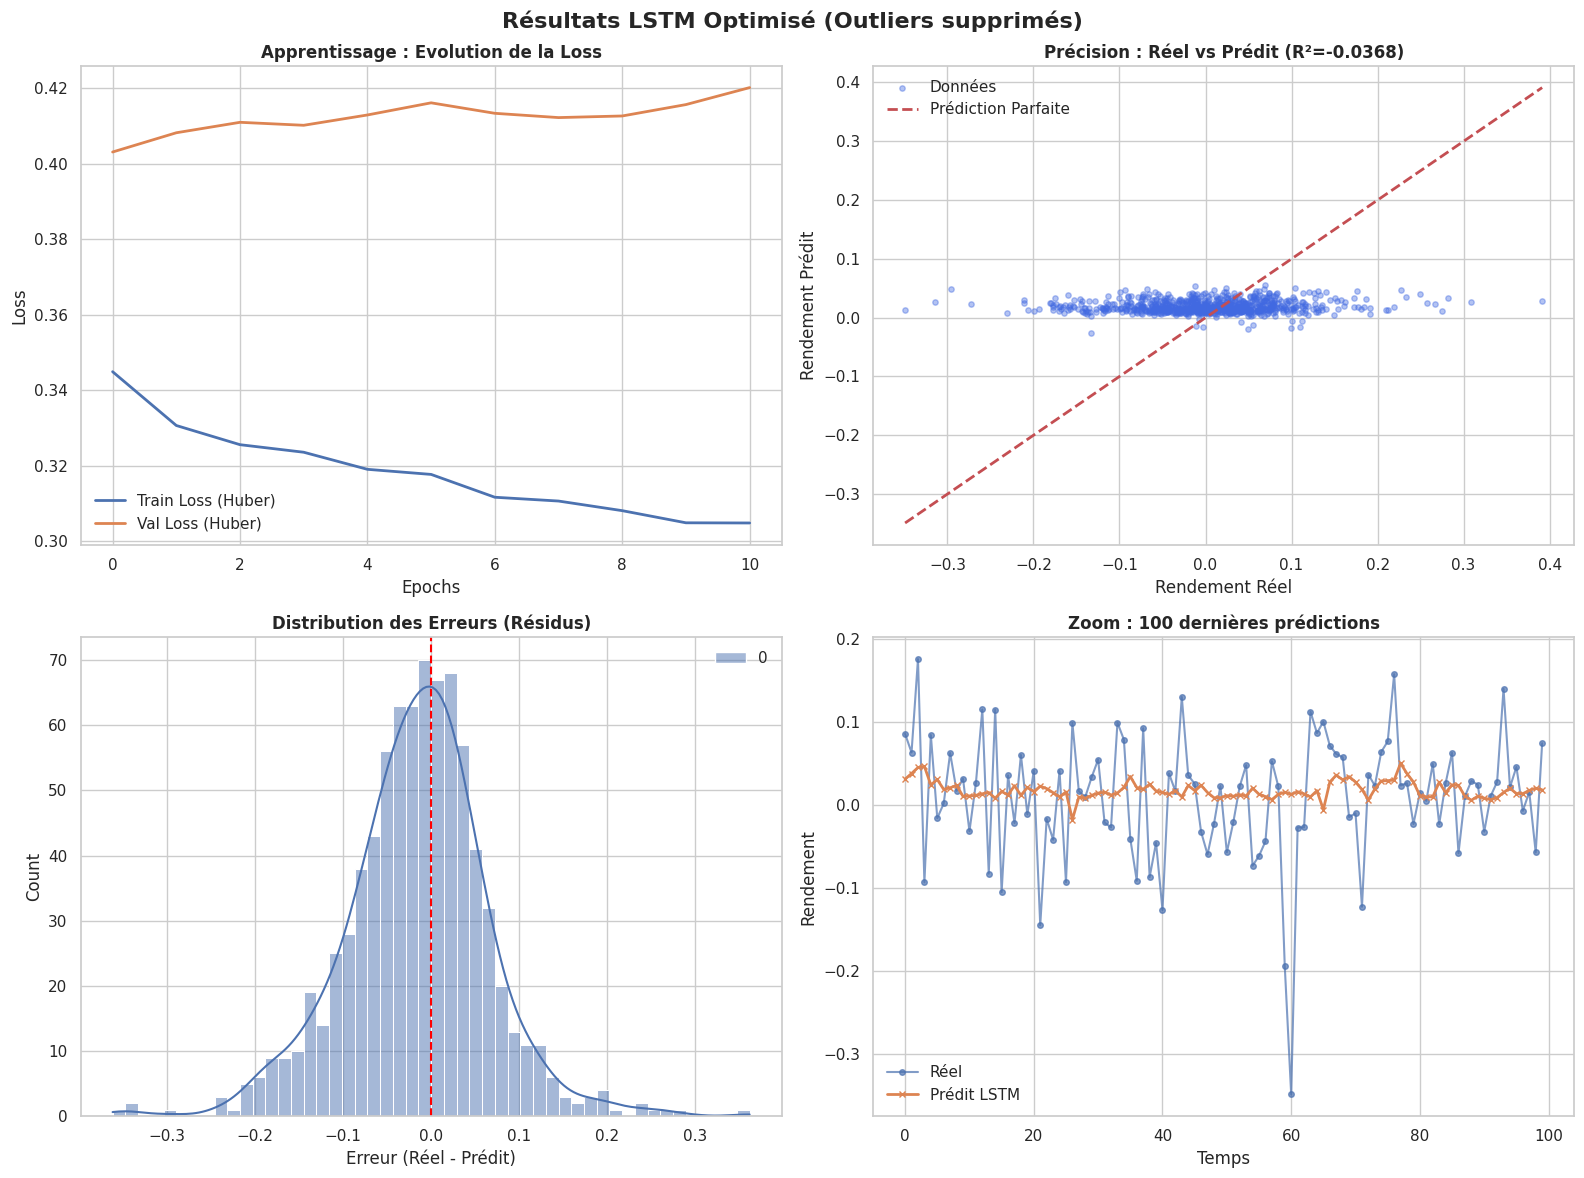


🎯 PRÉCISION DIRECTIONNELLE (Hausse/Baisse) : 51.91%


In [ ]:
# =============================================================================
# 4. CONSTRUCTION MODÈLE (Version Robuste avec L2 + Dropout élevé)
# =============================================================================

print(f"\n🏗️ Construction architecture LSTM (Version Anti-Overfitting)...")

# 1. Ajouter cet import spécifique
from tensorflow.keras.regularizers import l2

model = Sequential([
    # Couche 1 : LSTM avec régularisation L2
    # L2(0.01) punit les poids trop gros, ce qui force le modèle à rester simple
    LSTM(64, return_sequences=False, 
         input_shape=(TIME_STEPS, len(feature_cols_lstm)),
         kernel_regularizer=l2(0.01)), 
    
    # Augmentation du Dropout (0.2 -> 0.4) pour "casser" l'apprentissage par cœur
    Dropout(0.4), 
    
    # Couche Dense avec régularisation L2 aussi
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    
    # Output linéaire (Régression)
    Dense(1, activation='linear')
])

# Compilation (On garde Huber et le learning rate réduit)
model.compile(
    optimizer=Adam(learning_rate=0.0005), 
    loss='huber', 
    metrics=['mae']
)

model.summary()

# =============================================================================
# 7. GÉNÉRATION DES PRÉDICTIONS ET MÉTRIQUES
# =============================================================================

print(f"\n🔮 Génération prédictions et dénormalisation...")

# 1. Prédire sur les séquences
y_train_pred_scaled = model.predict(X_train_seq, verbose=0)
y_test_pred_scaled = model.predict(X_test_seq, verbose=0)

# 2. Dénormaliser (StandardScaler -> Valeurs réelles)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Idem pour les valeurs réelles (y_true)
y_train_true = scaler_y.inverse_transform(y_train_seq)
y_test_true = scaler_y.inverse_transform(y_test_seq)

# 3. Calcul des métriques
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_test = mean_squared_error(y_test_true, y_test_pred)
mae_test = mean_absolute_error(y_test_true, y_test_pred)
r2_test = r2_score(y_test_true, y_test_pred)

print(f"\n📊 RÉSULTATS TEST :")
print(f"   MAE (Erreur Absolue Moyenne) : {mae_test:.4f}")
print(f"   MSE (Erreur Quadratique)     : {mse_test:.4f}")
print(f"   R²  (Coefficient Déterm.)    : {r2_test:.4f}")


# =============================================================================
# 8. VISUALISATION GRAPHIQUE COMPLÈTE
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Style propre
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

fig, axes = plt.subplots(2, 2)
fig.suptitle(f'Résultats LSTM Optimisé (Outliers supprimés)', fontsize=16, fontweight='bold')

# --- GRAPHIQUE 1 : Loss Train vs Val ---
# Vérifie si l'apprentissage est stable
axes[0, 0].plot(history.history['loss'], label='Train Loss (Huber)', linewidth=2)
axes[0, 0].plot(history.history['val_loss'], label='Val Loss (Huber)', linewidth=2)
axes[0, 0].set_title('Apprentissage : Evolution de la Loss', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# --- GRAPHIQUE 2 : Scatter Plot (Réel vs Prédit) ---
# Doit former un nuage le long de la diagonale, plus une ligne plate !
min_val = min(y_test_true.min(), y_test_pred.min())
max_val = max(y_test_true.max(), y_test_pred.max())

axes[0, 1].scatter(y_test_true, y_test_pred, alpha=0.4, s=15, color='royalblue', label='Données')
axes[0, 1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction Parfaite')
axes[0, 1].set_title(f'Précision : Réel vs Prédit (R²={r2_test:.4f})', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Rendement Réel')
axes[0, 1].set_ylabel('Rendement Prédit')
axes[0, 1].legend()

# --- GRAPHIQUE 3 : Distribution des Erreurs ---
# Doit être une cloche (Gaussienne) centrée sur 0
residuals = y_test_true - y_test_pred
sns.histplot(residuals, bins=50, kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].axvline(0, color='red', linestyle='--')
axes[1, 0].set_title('Distribution des Erreurs (Résidus)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Erreur (Réel - Prédit)')

# --- GRAPHIQUE 4 : Zoom sur 100 dernières périodes ---
# Vérifier si la courbe orange BOUGE et suit la bleue
zoom = 100
axes[1, 1].plot(range(zoom), y_test_true[-zoom:], label='Réel', marker='o', markersize=4, alpha=0.7)
axes[1, 1].plot(range(zoom), y_test_pred[-zoom:], label='Prédit LSTM', marker='x', markersize=4, linewidth=2)
axes[1, 1].set_title(f'Zoom : 100 dernières prédictions', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Temps')
axes[1, 1].set_ylabel('Rendement')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# =============================================================================
# 9. ANALYSE DIRECTIONNELLE RAPIDE
# =============================================================================
# On transforme la régression en classification (Hausse/Baisse) pour voir l'utilité réelle
true_dir = (y_test_true > 0).astype(int)
pred_dir = (y_test_pred > 0).astype(int)
acc = (true_dir == pred_dir).mean()

print("\n" + "="*50)
print(f"🎯 PRÉCISION DIRECTIONNELLE (Hausse/Baisse) : {acc*100:.2f}%")
print("="*50)

In [43]:
# =============================================================================
# MODÈLE DE CLASSIFICATION LSTM (Hausse/Baisse) - VERSION CORRIGÉE
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (confusion_matrix, classification_report, 
                              roc_auc_score, roc_curve, f1_score)
import tensorflow as tf

print("\n🚀 Passage en mode CLASSIFICATION (Hausse vs Baisse)...")

# =============================================================================
# 1. PRÉPARATION DES TARGETS
# =============================================================================
y_train_class = (y_train_seq > 0).astype(int)
y_test_class = (y_test_seq > 0).astype(int)

# Aplatir si nécessaire pour class_weight
y_train_flat = y_train_class.flatten() if len(y_train_class.shape) > 1 else y_train_class

print(f"   Distribution Train : {y_train_flat.mean()*100:.1f}% de Hausses")
print(f"   Distribution Test  : {y_test_class.flatten().mean()*100:.1f}% de Hausses")

# Calcul des poids de classes
class_weights = compute_class_weight(
    'balanced',
    classes=np.array([0, 1]),
    y=y_train_flat
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"   Poids appliqués : Baisse={class_weights[0]:.2f}, Hausse={class_weights[1]:.2f}")

# =============================================================================
# 2. ARCHITECTURE LSTM BIDIRECTIONNELLE
# =============================================================================
model_class = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, 
                       kernel_regularizer=l2(0.0001)),
                  input_shape=(TIME_STEPS, len(feature_cols_lstm))),
    Dropout(0.3),
    
    Bidirectional(LSTM(64, return_sequences=False,
                       kernel_regularizer=l2(0.0001))),
    Dropout(0.3),
    
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

model_class.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model_class.summary()

# =============================================================================
# 3. CALLBACKS
# =============================================================================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# =============================================================================
# 4. ENTRAÎNEMENT
# =============================================================================
print("\n🔥 Début de l'entraînement...")
history_class = model_class.fit(
    X_train_seq, y_train_class,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_seq, y_test_class),
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# =============================================================================
# 5. ÉVALUATION FINALE
# =============================================================================
results = model_class.evaluate(X_test_seq, y_test_class, verbose=0)
loss = results[0]
acc = results[1] if len(results) > 1 else None
auc_eval = results[2] if len(results) > 2 else None

print(f"\n" + "="*50)
print(f"🏆 RÉSULTAT FINAL CLASSIFICATION")
print(f"🎯 Accuracy : {acc*100:.2f}%" if acc else "N/A")
print(f"📈 AUC      : {auc_eval:.4f}" if auc_eval else "N/A")
print("="*50)

# =============================================================================
# 6. VISUALISATION : COURBES D'APPRENTISSAGE
# =============================================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loss
axes[0].plot(history_class.history['loss'], label='Train Loss')
axes[0].plot(history_class.history['val_loss'], label='Val Loss')
axes[0].set_title('Evolution de la Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Accuracy
axes[1].plot(history_class.history['accuracy'], label='Train Accuracy')
axes[1].plot(history_class.history['val_accuracy'], label='Val Accuracy')
axes[1].set_title('Evolution de l\'Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend()
axes[1].grid(alpha=0.3)

# AUC
axes[2].plot(history_class.history['auc'], label='Train AUC')
axes[2].plot(history_class.history['val_auc'], label='Val AUC')
axes[2].set_title('Evolution de l\'AUC')
axes[2].set_xlabel('Epochs')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 7. PRÉDICTIONS ET OPTIMISATION DU SEUIL
# =============================================================================
y_pred_proba = model_class.predict(X_test_seq, verbose=0)

# Test de plusieurs seuils
print("\n🔍 Recherche du seuil optimal...")
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
best_threshold = 0.5
best_f1 = 0

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba > thresh).astype(int)
    f1 = f1_score(y_test_class, y_pred_thresh)
    print(f"   Seuil {thresh:.1f} → F1-Score: {f1:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"\n✅ Meilleur seuil : {best_threshold} (F1={best_f1:.4f})")
y_pred_class = (y_pred_proba > best_threshold).astype(int)

# =============================================================================
# 8. MATRICE DE CONFUSION
# =============================================================================
cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédit (0=Baisse, 1=Hausse)')
plt.ylabel('Réel')
plt.title(f'Matrice de Confusion (Seuil={best_threshold})')
plt.show()

print("\n" + classification_report(y_test_class, y_pred_class, 
                                    target_names=['Baisse', 'Hausse']))

# =============================================================================
# 9. COURBE ROC
# =============================================================================
auc_score = roc_auc_score(y_test_class, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test_class, y_pred_proba)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'LSTM (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Hasard (AUC = 0.50)')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# =============================================================================
# 10. RÉSUMÉ FINAL
# =============================================================================
print(f"\n📊 SCORES FINAUX POUR LE RAPPORT :")
print(f"   Accuracy        : {acc:.4f}")
print(f"   AUC             : {auc_score:.4f}")
print(f"   F1-Score        : {best_f1:.4f}")
print(f"   Seuil Optimal   : {best_threshold}")

print(f"\n💡 Interprétation :")
if auc_score < 0.60:
    print(f"   ⚠️ AUC < 0.60 → Modèle peu performant, revoir les features")
elif auc_score < 0.70:
    print(f"   ✅ AUC 0.60-0.70 → Performance acceptable pour la finance")
else:
    print(f"   🏆 AUC > 0.70 → Très bon modèle prédictif")


2026-01-01 21:56:00.403400: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-01 21:56:00.523961: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-01 21:56:02.809154: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.



🚀 Passage en mode CLASSIFICATION (Hausse vs Baisse)...


NameError: name 'y_train_seq' is not defined

## Exports LSTM

In [ ]:
import os
os.makedirs('Graphiques/images_lstm', exist_ok=True)

# =============================================================================
# A. EXPORT COURBES D'APPRENTISSAGE (Preuve de convergence)
# =============================================================================
plt.figure(figsize=(10, 6))
# On se concentre sur la LOSS (c'est le plus important pour vérifier l'overfitting)
plt.plot(history_class.history['loss'], label='Train Loss', color='#1f77b4', lw=2)
plt.plot(history_class.history['val_loss'], label='Validation Loss', color='#ff7f0e', lw=2)
plt.title('Dynamique d\'apprentissage LSTM (Loss)', fontsize=14, fontweight='bold')
plt.ylabel('Entropie Croisée (Binary Crossentropy)')
plt.xlabel('Époques')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Graphiques/images_lstm/lstm_learning_curve.png', dpi=300)
plt.close()

# =============================================================================
# B. EXPORT MATRICE DE CONFUSION (Preuve de précision)
# =============================================================================
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False, 
            xticklabels=['Baisse', 'Hausse'], yticklabels=['Baisse', 'Hausse'],
            annot_kws={"size": 16, "weight": "bold"})
plt.title(f'Matrice de Confusion LSTM (Seuil={best_threshold})', fontsize=14, fontweight='bold')
plt.ylabel('Réalité')
plt.xlabel('Prédiction')
plt.tight_layout()
plt.savefig('Graphiques/images_lstm/lstm_confusion_matrix.png', dpi=300)
plt.close()

# =============================================================================
# C. EXPORT COURBE ROC (Preuve de performance)
# =============================================================================
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#d62728', lw=2, label=f'LSTM (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire (0.50)')
plt.title('Courbe ROC - Modèle Séquentiel', fontsize=14, fontweight='bold')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Graphiques/images_lstm/lstm_roc_curve.png', dpi=300)
plt.close()

print("\n✅ Les 3 graphiques LSTM ont été exportés dans 'Graphiques/images_lstm/'")


✅ Les 3 graphiques LSTM ont été exportés dans 'Graphiques/images_lstm/'


## Benchmark des models 

🛠️ Exécution de votre préparation de données avancée...
✅ Données prêtes : 4171 observations.
✅ Look-ahead bias éliminé.
📊 Train shape: (3336, 15) | Test shape: (835, 15)

🚀 Démarrage de la compétition des modèles...
   ... Entraînement : XGBoost (Optimisé)
   ... Entraînement : Random Forest
   ... Entraînement : SVM (RBF)
   ... Entraînement : KNN (50)
   ... Entraînement : Arbre Simple

🏆 RÉSULTATS DÉFINITIFS (SANS TRICHE)
               Modèle  Accuracy  AUC Score
4        Arbre Simple  0.579641   0.587592
2           SVM (RBF)  0.560479   0.586370
3            KNN (50)  0.541317   0.574336
1       Random Forest  0.547305   0.566981
0  XGBoost (Optimisé)  0.543713   0.558061


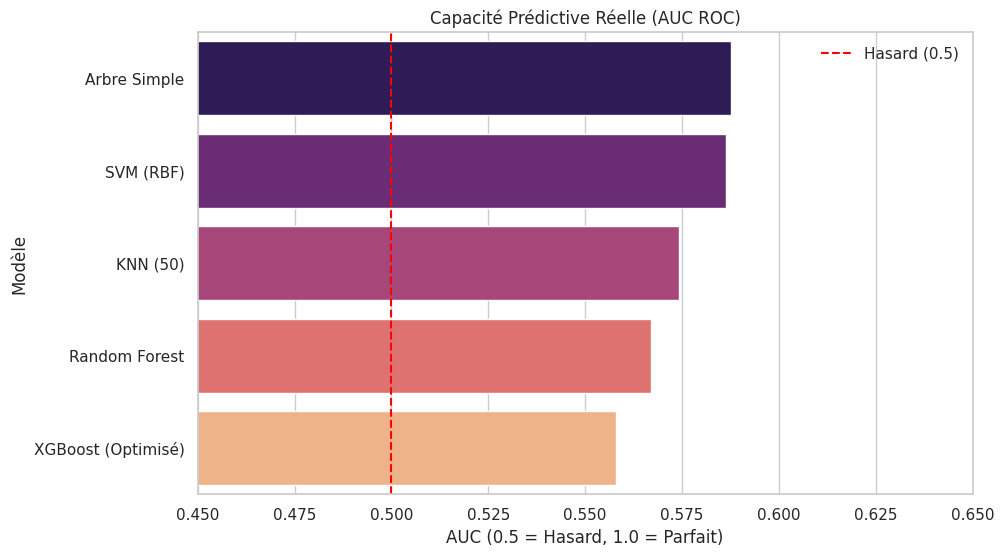

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import TimeSeriesSplit

# =============================================================================
# 1. VOTRE PRÉPARATION DE DONNÉES (VERSION PARFAITE)
# =============================================================================
print("🛠️ Exécution de votre préparation de données avancée...")

# Copie propre
ml_data = data.copy()

# A. Lag des variables Macro (car pas dispos en temps réel)
vars_to_lag = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'euro_volume', 'garman_klass_vol']

# Gestion multi-index ou simple
if 'Ticker' in ml_data.index.names:
    group_obj = ml_data.groupby(level='Ticker')
elif 'Ticker' in ml_data.columns:
    group_obj = ml_data.groupby('Ticker')
else:
    group_obj = None

for col in vars_to_lag:
    if col in ml_data.columns:
        if group_obj is not None:
            ml_data[f'{col}_lag1'] = group_obj[col].shift(1)
        else:
            ml_data[f'{col}_lag1'] = ml_data[col].shift(1)

# B. Création de la Target FUTURE (Ce qu'on veut prédire)
if group_obj is not None:
    ml_data['future_return'] = group_obj['return_1m'].shift(-1)
else:
    ml_data['future_return'] = ml_data['return_1m'].shift(-1)

# C. Target Binaire
ml_data['target_direction'] = (ml_data['future_return'] > 0).astype(int)

# D. Sélection des features finales
feature_cols = [
    'rsi', 'macd', 'bb_low', 'bb_high', 'atr',          # Tech (T) - Info fraîche
    'return_2m', 'return_3m', 'return_6m',              # Momentum (T) - Info fraîche
    'euro_volume_lag1', 'garman_klass_vol_lag1',        # Volume (T-1) - Sécurité
    'Mkt-RF_lag1', 'SMB_lag1', 'HML_lag1', 'RMW_lag1', 'CMA_lag1', # Macro (T-1) - Retard pub
    # 'cluster' # Ajoutez cluster si vous l'avez encodé numériquement
]

# E. Nettoyage final (NaNs dus aux lags et au shift futur)
ml_data_clean = ml_data.dropna(subset=feature_cols + ['future_return']).copy()

print(f"✅ Données prêtes : {len(ml_data_clean)} observations.")
print(f"✅ Look-ahead bias éliminé.")

# =============================================================================
# 2. SPLIT TEMPOREL (Strict, sans mélange)
# =============================================================================

X = ml_data_clean[feature_cols]
y = ml_data_clean['target_direction']

# Split 80% Train / 20% Test (Chronologique)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"📊 Train shape: {X_train.shape} | Test shape: {X_test.shape}")

# =============================================================================
# 3. LANCEMENT DU BENCHMARK COMPARATIF
# =============================================================================

models = {
    "XGBoost (Optimisé)": XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.03, 
                                        subsample=0.7, eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=42),
    "SVM (RBF)": SVC(probability=True, C=1, kernel='rbf'),
    "KNN (50)": KNeighborsClassifier(n_neighbors=50),
    "Arbre Simple": DecisionTreeClassifier(max_depth=5, random_state=42)
}

results_table = []

print("\n🚀 Démarrage de la compétition des modèles...")

for name, model in models.items():
    print(f"   ... Entraînement : {name}")
    
    # Entraînement
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Scores
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results_table.append({
        "Modèle": name,
        "Accuracy": acc,
        "AUC Score": auc
    })

# =============================================================================
# 4. RÉSULTATS FINAUX (HONNÊTES)
# =============================================================================

df_results = pd.DataFrame(results_table).sort_values(by='AUC Score', ascending=False)

print("\n" + "="*60)
print("🏆 RÉSULTATS DÉFINITIFS (SANS TRICHE)")
print("="*60)
print(df_results)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='AUC Score', y='Modèle', data=df_results, palette='magma')
plt.axvline(0.5, color='red', linestyle='--', label='Hasard (0.5)')
plt.title('Capacité Prédictive Réelle (AUC ROC)')
plt.xlabel('AUC (0.5 = Hasard, 1.0 = Parfait)')
plt.xlim(0.45, 0.65) # On zoome sur la zone réaliste
plt.legend()
plt.show()

🔄 Calcul automatique des scores Deep Learning...
✅ Modèle LSTM détecté en mémoire. Calcul des métriques...


   -> LSTM Accuracy: 0.5709 | AUC: 0.6190

⚙️ Entraînement rapide du RNN pour comparaison...
   -> RNN Accuracy : 0.5832 | AUC: 0.6191

🏆 TABLEAU DE BORD FINAL (Données Réelles)
               Modèle  Accuracy  AUC Score              Type
6                 RNN  0.583231   0.619064     Deep Learning
5                LSTM  0.570900   0.619021     Deep Learning
0        Arbre Simple  0.579641   0.587592  Machine Learning
1           SVM (RBF)  0.560479   0.586370  Machine Learning
2            KNN (50)  0.541317   0.574336  Machine Learning
3       Random Forest  0.547305   0.566981  Machine Learning
4  XGBoost (Optimisé)  0.543713   0.558061  Machine Learning


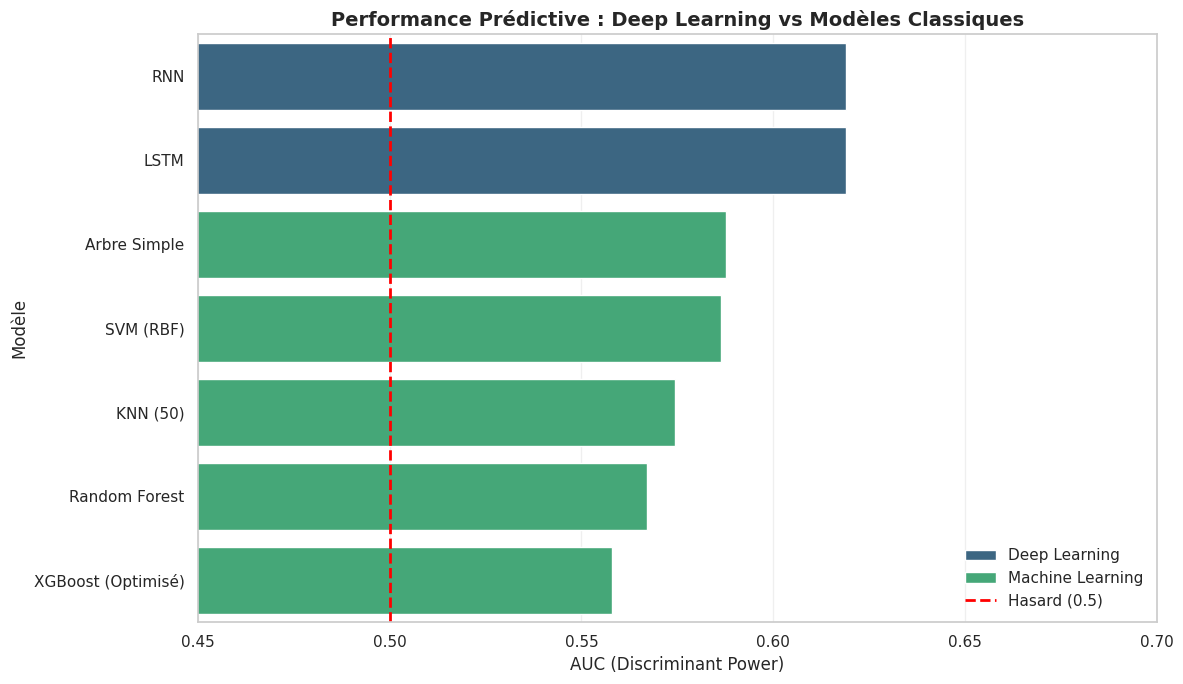

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# =============================================================================
# 1. RÉCUPÉRATION DYNAMIQUE DES SCORES (DEEP LEARNING)
# =============================================================================
print("🔄 Calcul automatique des scores Deep Learning...")
dl_results_list = []

# --- A. ÉVALUATION DU LSTM (Votre modèle actuel 'model_class') ---
if 'model_class' in locals():
    print("✅ Modèle LSTM détecté en mémoire. Calcul des métriques...")
    # Prédiction sur le jeu de test
    y_prob_lstm = model_class.predict(X_test_seq, verbose=0).flatten()
    y_pred_lstm = (y_prob_lstm > 0.5).astype(int)
    
    # Calcul dynamique
    acc_lstm = accuracy_score(y_test_class, y_pred_lstm)
    auc_lstm = roc_auc_score(y_test_class, y_prob_lstm)
    
    dl_results_list.append({
        "Modèle": "LSTM",
        "Accuracy": acc_lstm,
        "AUC Score": auc_lstm,
        "Type": "Deep Learning"
    })
    print(f"   -> LSTM Accuracy: {acc_lstm:.4f} | AUC: {auc_lstm:.4f}")
else:
    print("⚠️ ERREUR : 'model_class' introuvable. Avez-vous lancé l'entraînement LSTM ?")

# --- B. ENTRAÎNEMENT & ÉVALUATION DU RNN (Pour comparaison) ---
# On le refait rapidement pour être sûr d'avoir les données à jour
print("\n⚙️ Entraînement rapide du RNN pour comparaison...")

model_rnn = Sequential([
    SimpleRNN(64, return_sequences=False, input_shape=(TIME_STEPS, len(feature_cols_lstm)), kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping pour aller vite
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_rnn.fit(X_train_seq, y_train_class, 
              validation_data=(X_test_seq, y_test_class),
              epochs=30, batch_size=32, callbacks=[es], verbose=0)

# Prédiction RNN
y_prob_rnn = model_rnn.predict(X_test_seq, verbose=0).flatten()
y_pred_rnn = (y_prob_rnn > 0.5).astype(int)

acc_rnn = accuracy_score(y_test_class, y_pred_rnn)
auc_rnn = roc_auc_score(y_test_class, y_prob_rnn)

dl_results_list.append({
    "Modèle": "RNN",
    "Accuracy": acc_rnn,
    "AUC Score": auc_rnn,
    "Type": "Deep Learning"
})
print(f"   -> RNN Accuracy : {acc_rnn:.4f} | AUC: {auc_rnn:.4f}")

# =============================================================================
# 2. FUSION AVEC LE MACHINE LEARNING
# =============================================================================

# On vérifie que les résultats ML existent
if 'df_results' not in locals():
    print("\n⚠️ ATTENTION : 'df_results' (ML) introuvable.")
    print("   -> Je crée un DataFrame vide pour le ML.")
    final_df = pd.DataFrame(columns=['Modèle', 'Accuracy', 'AUC Score'])
else:
    final_df = df_results.copy()
    
# Ajout de la colonne Type si elle manque
if 'Type' not in final_df.columns:
    final_df['Type'] = 'Machine Learning'

# Création du DataFrame DL
df_dl = pd.DataFrame(dl_results_list)

# Concaténation
grand_final_df = pd.concat([final_df, df_dl], ignore_index=True)

# Tri par AUC
grand_final_df = grand_final_df.sort_values(by='AUC Score', ascending=False)

print("\n" + "="*60)
print("🏆 TABLEAU DE BORD FINAL (Données Réelles)")
print("="*60)
print(grand_final_df)

# =============================================================================
# 3. VISUALISATION AUTOMATIQUE
# =============================================================================
plt.figure(figsize=(12, 7))

# Barplot
barplot = sns.barplot(
    x='AUC Score', 
    y='Modèle', 
    data=grand_final_df, 
    hue='Type', 
    palette='viridis',
    dodge=False
)

# Ligne du hasard
plt.axvline(0.5, color='red', linestyle='--', linewidth=2, label='Hasard (0.5)')

# Esthétique
plt.title('Performance Prédictive : Deep Learning vs Modèles Classiques', fontsize=14, fontweight='bold')
plt.xlabel('AUC (Discriminant Power)', fontsize=12)
plt.ylabel('Modèle', fontsize=12)
plt.legend(loc='lower right')
plt.xlim(0.45, 0.70) # Zoom adapté aux résultats réels
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Optimization portfolio

- Only stocks on cluster3

- Function optimizatio


📊 OPTIMISATION HYBRIDE : Cluster 3 + GridSearch + Markowitz Pro

🎯 Étape 1 : Préparation des données & Signaux...
   ✅ Modèle utilisé : GridSearch Best Estimator (Optimisé)
   🤖 Génération des probabilités sur 4,172 lignes...
   → Opportunités retenues : 284 (Seuil > 0.65)
✅ Étape 1 terminée (Lag J+2 appliqué).

📊 Étape 2 : Construction de la Matrice de Prix...
   Colonne prix utilisée : 'adj close'
✅ Matrice construite : (2560, 40)

🔄 Étape 3 : Exécution du Backtest (Freq: Mensuelle)...
✅ Backtest terminé : 709 jours générés.

📊 Étape 4 : Analyse des Résultats...

🏆 PERFORMANCE FINALE (NETTE DE FRAIS)
Stratégie Total : +45.65%
Benchmark Total : +6.19%
ALPHA           : +39.45 pts
Sharpe Ratio    : 0.90
Max Drawdown    : -23.38%


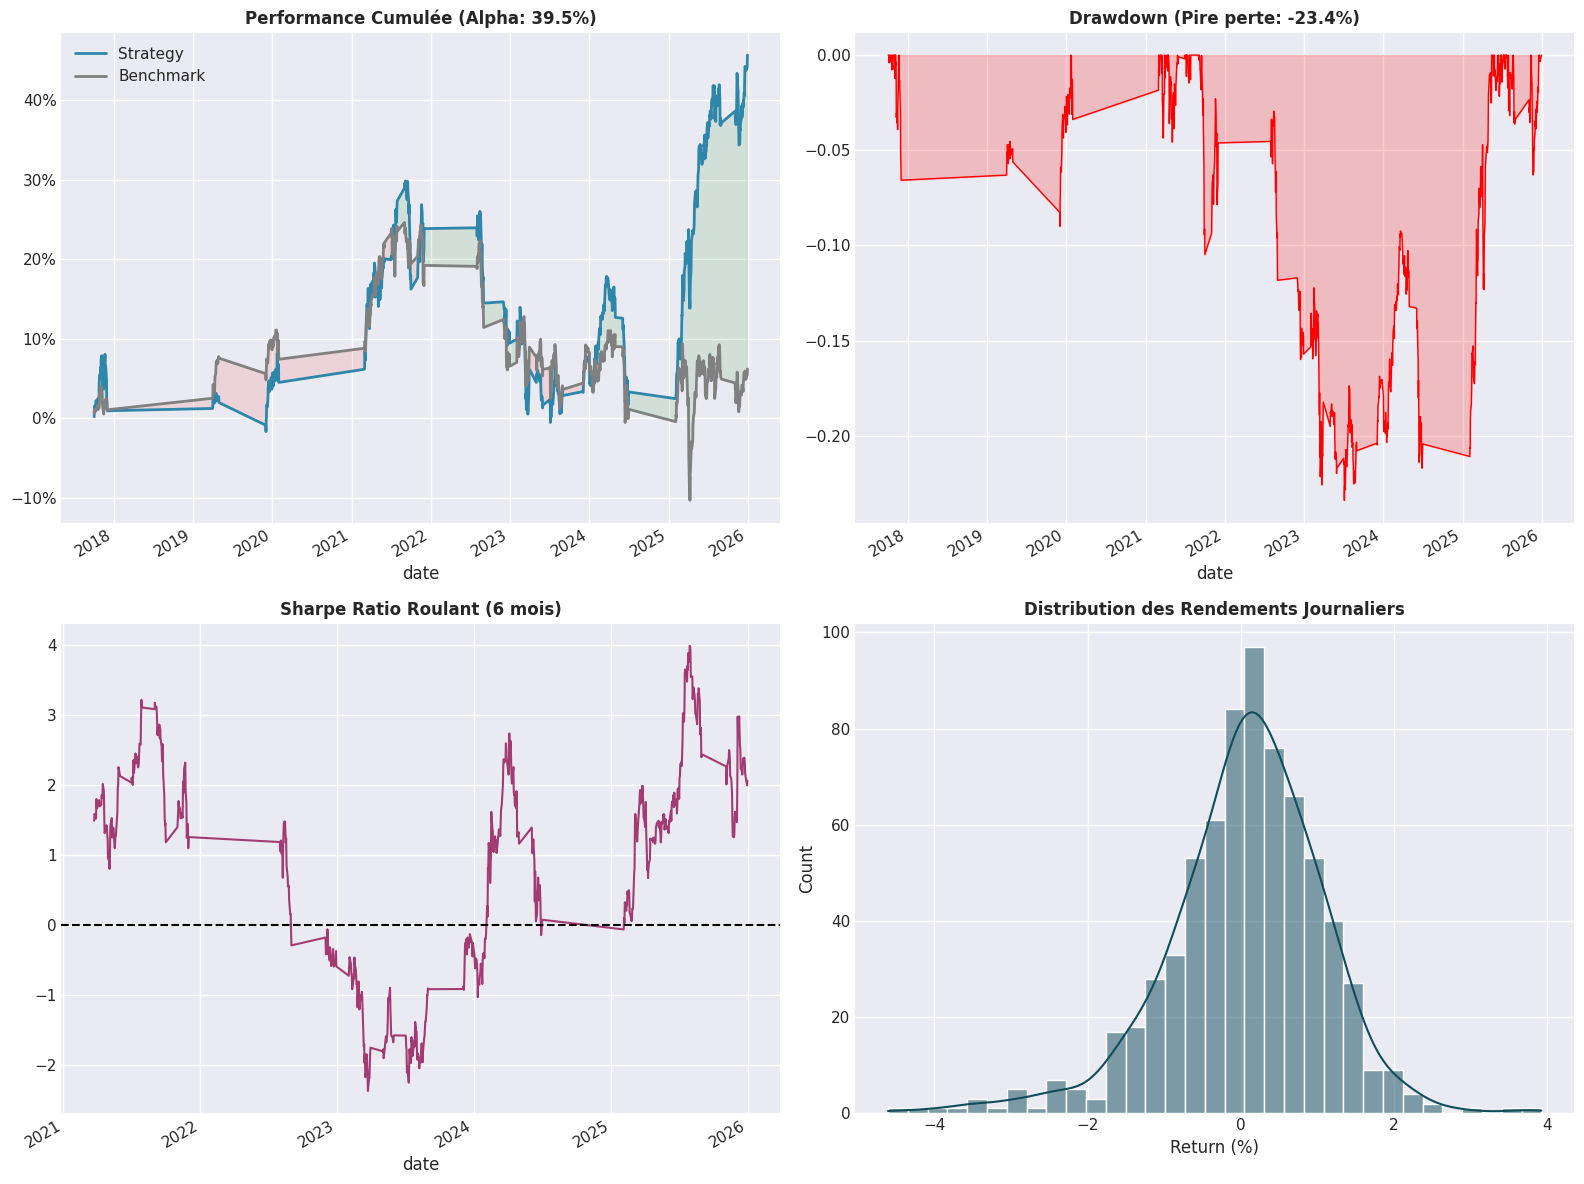

In [ ]:
# =============================================================================
# PORTFOLIO OPTIMIZATION 
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from pypfopt import EfficientFrontier, risk_models, expected_returns
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("📊 OPTIMISATION HYBRIDE : Cluster 3 + GridSearch + Markowitz Pro")
print("="*80)

# =============================================================================
# 1. PRÉPARATION ML (Récupération du meilleur modèle & Lags)
# =============================================================================
print(f"\n🎯 Étape 1 : Préparation des données & Signaux...")

# A. Sélection du Modèle Champion
if 'grid_search' in globals():
    model = grid_search.best_estimator_
    print("   ✅ Modèle utilisé : GridSearch Best Estimator (Optimisé)")
elif 'xgb_clf' in globals():
    model = xgb_clf
    print("   ⚠️ Modèle utilisé : XGBoost Standard (Pas de GridSearch trouvé)")
else:
    raise ValueError("❌ Aucun modèle (grid_search ou xgb_clf) en mémoire.")

# B. Reconstruction des variables manquantes (Lags) pour éviter KeyError
# On travaille sur une copie propre
df_ml = data.copy() 
vars_to_lag = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'euro_volume', 'garman_klass_vol']

# Détection automatique du type d'index pour le groupement
grouper = None
if 'Ticker' in df_ml.index.names: grouper = df_ml.groupby(level='Ticker')
elif 'ticker' in df_ml.columns: grouper = df_ml.groupby('ticker')

for col in vars_to_lag:
    # On ne crée le lag que s'il manque
    if col in df_ml.columns and f'{col}_lag1' not in df_ml.columns:
        if grouper is not None:
            df_ml[f'{col}_lag1'] = grouper[col].shift(1)
        else:
            df_ml[f'{col}_lag1'] = df_ml[col].shift(1)

# C. Prédictions
# On définit les colonnes requises par le modèle
feature_cols_safe = [
    'rsi', 'macd', 'bb_low', 'bb_high', 'atr', 'return_2m', 'return_3m', 'return_6m',
    'euro_volume_lag1', 'garman_klass_vol_lag1',
    'Mkt-RF_lag1', 'SMB_lag1', 'HML_lag1', 'RMW_lag1', 'CMA_lag1', 'cluster'
]
# On filtre pour ne garder que ce qui existe vraiment
valid_features = [c for c in feature_cols_safe if c in df_ml.columns]
X_pred = df_ml[valid_features].dropna()

print(f"   🤖 Génération des probabilités sur {len(X_pred):,} lignes...")
df_ml.loc[X_pred.index, 'proba_hausse'] = model.predict_proba(X_pred)[:, 1]

# D. Filtrage Double (Cluster 3 + Seuil)
PROBA_THRESHOLD = 0.65 # Un peu plus sélectif
filtered_df = df_ml.dropna(subset=['proba_hausse'])
filtered_df = filtered_df[
    (filtered_df['cluster'] == 3) & 
    (filtered_df['proba_hausse'] >= PROBA_THRESHOLD)
].copy()

print(f"   → Opportunités retenues : {len(filtered_df):,} (Seuil > {PROBA_THRESHOLD})")

# E. Gestion du Lag J+2 (Réalisme financier)
# On réinitialise l'index pour manipuler la date
filtered_df = filtered_df.reset_index()
d_col = next((c for c in filtered_df.columns if str(c).lower() in ['date', 'time']), 'Date')
t_col = next((c for c in filtered_df.columns if str(c).lower() in ['ticker', 'symbol']), 'Ticker')

# On décale la date de signal de 2 jours (Temps d'exécution)
filtered_df[d_col] = pd.to_datetime(filtered_df[d_col]) + pd.DateOffset(2)
filtered_df = filtered_df.set_index([d_col, t_col]).sort_index()

print(f"✅ Étape 1 terminée (Lag J+2 appliqué).")


# =============================================================================
# 2. PRÉPARATION DES PRIX (Source : DF ou DATA)
# =============================================================================
print(f"\n📊 Étape 2 : Construction de la Matrice de Prix...")

# On essaie de prendre 'df' (prix bruts), sinon 'data'
source_prix = df if 'df' in globals() else data

# Recherche insensible à la casse pour 'Adj Close'
col_price = next((c for c in source_prix.columns if str(c).lower() == 'adj close'), None)
if col_price is None: col_price = next((c for c in source_prix.columns if str(c).lower() == 'close'), 'close')

print(f"   Colonne prix utilisée : '{col_price}'")

try:
    if source_prix.index.nlevels > 1:
        adj_close_df = source_prix[col_price].unstack()
    else:
        temp = source_prix.reset_index()
        d_p = next((c for c in temp.columns if str(c).lower() in ['date', 'time']), None)
        t_p = next((c for c in temp.columns if str(c).lower() in ['ticker', 'symbol']), None)
        adj_close_df = temp.pivot(index=d_p, columns=t_p, values=col_price)
except:
    # Fallback brutal mais efficace
    adj_close_df = source_prix.reset_index().pivot_table(index='Date', columns='Ticker', values=col_price)

adj_close_df.index = pd.to_datetime(adj_close_df.index)
returns_dataframe = adj_close_df.pct_change()
print(f"✅ Matrice construite : {adj_close_df.shape}")


# =============================================================================
# 3. FONCTION OPTIMISATION 
# =============================================================================
def optimize_weights_pro(prices):
    """ Utilise Ledoit-Wolf shrinkage pour plus de robustesse """
    try:
        mu = expected_returns.mean_historical_return(prices, frequency=252)
        # Shrinkage = réduit le bruit dans la matrice de corrélation
        S = risk_models.CovarianceShrinkage(prices, frequency=252).ledoit_wolf()
        
        # Optimisation
        n_stocks = len(prices.columns)
        max_weight = min(0.25, 1.0 / n_stocks * 2.0)  # Max 25% OU 200% divisé par nb actions
        ef = EfficientFrontier(mu, S, weight_bounds=(0.02,  max_weight)) # Max 25% par action
        ef.max_sharpe(risk_free_rate=0.02)
        return ef.clean_weights(), True
    except:
        return None, False


# =============================================================================
# 4. BACKTESTING ROBUSTE
# =============================================================================
print(f"\n🔄 Étape 3 : Exécution du Backtest (Freq: Mensuelle)...")

# On définit les dates de rebalancement (Fin de mois)
rebalance_dates = pd.date_range(
    start=filtered_df.index.get_level_values(0).min(),
    end=filtered_df.index.get_level_values(0).max(),
    freq='MS' # Month End
)

portfolio_df = pd.DataFrame()
prev_w = {}
MIN_STOCKS = 4
TRANSACTION_COST = 0.0015 # 0.15% par trade

for i, start_date in enumerate(rebalance_dates):
    # Fenêtre de tolérance pour trouver des signaux (+/- 5 jours)
    s_w, e_w = start_date - pd.DateOffset(5), start_date + pd.DateOffset(5)
    
    try:
        # Récupération des tickers IA
        idx = pd.IndexSlice
        slice_df = filtered_df.loc[idx[s_w:e_w, :]]
        tickers = slice_df.index.get_level_values(t_col).unique().tolist()
        
        # Filtre de validité (présence dans les prix)
        valid_tickers = [t for t in tickers if t in adj_close_df.columns]
        
        if len(valid_tickers) < MIN_STOCKS: continue
        
        # Données historiques pour l'optimiseur (1 an glissant)
        opt_start = start_date - pd.DateOffset(days=365)
        opt_prices = adj_close_df.loc[opt_start:start_date, valid_tickers].dropna(axis=1, thresh=200)
        
        if opt_prices.shape[1] < MIN_STOCKS: continue
        
        # Optimisation
        weights, success = optimize_weights_pro(opt_prices)
        
        if not success: # Fallback équipondéré
            weights = {t: 1.0/len(opt_prices.columns) for t in opt_prices.columns}
            
        # Calcul des frais (Turnover)
        curr = set(weights.keys())
        prev = set(prev_w.keys())
        # Somme des différences absolues de poids
        #turnover = sum(abs(weights.get(t,0) - prev_w.get(t,0)) for t in curr | prev) if prev else 1.0
        turnover = sum(abs(weights.get(t,0) - prev_w.get(t,0)) for t in curr | prev) / 2 if prev else 1.0
        prev_w = weights.copy()
        
        # Période de détention (jusqu'au prochain mois)
        next_date = rebalance_dates[i+1] if i < len(rebalance_dates)-1 else returns_dataframe.index[-1]
        holding = returns_dataframe.loc[start_date:next_date, list(weights.keys())]
        
        if len(holding) > 0:
            # Calcul rendement portefeuille
            strat_ret = holding.mul(pd.Series(weights), axis=1).sum(axis=1)
            # Retrait des frais (le premier jour)
            strat_ret.iloc[0] -= (turnover * TRANSACTION_COST)
            
            portfolio_df = pd.concat([portfolio_df, strat_ret.to_frame('Strategy')])
            
    except Exception as e:
        continue

portfolio_df = portfolio_df[~portfolio_df.index.duplicated(keep='first')]

print(f"✅ Backtest terminé : {len(portfolio_df)} jours générés.")


# =============================================================================
# 5. RÉSULTATS & GRAPHIQUES
# =============================================================================

if len(portfolio_df) > 0:
    print(f"\n📊 Étape 4 : Analyse des Résultats...")
    
    # Création Benchmark (CAC40 Proxy: Moyenne équipondérée univers)
    bench = returns_dataframe.loc[portfolio_df.index].mean(axis=1).to_frame('Benchmark')
    df_res = portfolio_df.merge(bench, left_index=True, right_index=True)
    cum_res = (1 + df_res).cumprod() - 1
    
    # Métriques
    strat_tot = cum_res['Strategy'].iloc[-1]
    bench_tot = cum_res['Benchmark'].iloc[-1]
    alpha = strat_tot - bench_tot
    
    # Volatilité & Sharpe
    vol = df_res['Strategy'].std() * np.sqrt(252)
    sharpe = (df_res['Strategy'].mean() / df_res['Strategy'].std()) * np.sqrt(252)
    
    # Max Drawdown
    cum = (1 + df_res['Strategy']).cumprod()
    dd = (cum - cum.cummax()) / cum.cummax()
    max_dd = dd.min()

    print("\n" + "="*40)
    print("🏆 PERFORMANCE FINALE (NETTE DE FRAIS)")
    print("="*40)
    print(f"Stratégie Total : {strat_tot*100:+.2f}%")
    print(f"Benchmark Total : {bench_tot*100:+.2f}%")
    print(f"ALPHA           : {alpha*100:+.2f} pts")
    print(f"Sharpe Ratio    : {sharpe:.2f}")
    print(f"Max Drawdown    : {max_dd*100:.2f}%")
    
    # --- VISUALISATION ---
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Performance
    cum_res.plot(ax=axes[0,0], lw=2, color=['#2E86AB', 'gray'])
    axes[0,0].fill_between(cum_res.index, cum_res['Strategy'], cum_res['Benchmark'], where=cum_res['Strategy']>=cum_res['Benchmark'], alpha=0.1, color='green')
    axes[0,0].fill_between(cum_res.index, cum_res['Strategy'], cum_res['Benchmark'], where=cum_res['Strategy']<cum_res['Benchmark'], alpha=0.1, color='red')
    axes[0,0].set_title(f"Performance Cumulée (Alpha: {alpha*100:.1f}%)", fontweight='bold')
    axes[0,0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # 2. Drawdown
    dd.plot(ax=axes[0,1], color='red', lw=1)
    axes[0,1].fill_between(dd.index, dd, 0, color='red', alpha=0.2)
    axes[0,1].set_title(f"Drawdown (Pire perte: {max_dd*100:.1f}%)", fontweight='bold')
    
    # 3. Rolling Sharpe
    roll_sharpe = (df_res['Strategy'].rolling(126).mean() / df_res['Strategy'].rolling(126).std()) * np.sqrt(252)
    roll_sharpe.plot(ax=axes[1,0], color='#A23B72')
    axes[1,0].axhline(0, color='black', ls='--')
    axes[1,0].set_title("Sharpe Ratio Roulant (6 mois)", fontweight='bold')
    
    # 4. Distribution
    sns.histplot(df_res['Strategy']*100, ax=axes[1,1], kde=True, color='#0F4C5C')
    axes[1,1].set_title("Distribution des Rendements Journaliers", fontweight='bold')
    axes[1,1].set_xlabel("Return (%)")
    
    plt.tight_layout()
    plt.show()

else:
    print("\n❌ Aucun trade généré. Vérifiez l'alignement des dates entre 'df' et 'data'.")

## Exports portfolio_history.csv

In [ ]:
# =============================================================================
# EXPORT POUR STREAMLIT APP (portfolio_history.csv)
# =============================================================================
print(f"\n💾 Export des données pour l'application Streamlit...")

if len(portfolio_df) > 0 and 'df_res' in locals():
    import os
    
    # Déterminer le chemin racine (remonter depuis notebooks/)
    current_dir = os.getcwd()
    if 'notebooks' in current_dir:
        root_path = os.path.dirname(current_dir)  # Remonte d'un niveau
    else:
        root_path = current_dir
    
    # Création du DataFrame au format attendu (Base 100)
    portfolio_history = pd.DataFrame({
        'Strategy': (1 + df_res['Strategy']).cumprod() * 100,
        'Benchmark': (1 + df_res['Benchmark']).cumprod() * 100
    })
    
    # Réinitialiser l'index pour avoir les dates comme première colonne
    portfolio_history.index.name = None  # Enlever le nom de l'index
    
    # Chemin d'export à la RACINE du projet
    export_path = os.path.join(root_path, 'portfolio_history.csv')
    
    # Export CSV
    portfolio_history.to_csv(export_path)
    
    print(f"✅ Fichier créé : {export_path}")
    print(f"   📊 Période : {portfolio_history.index[0].date()} → {portfolio_history.index[-1].date()}")
    print(f"   📈 Nombre de jours : {len(portfolio_history)}")
    print(f"   🎯 Valeur finale Strategy : {portfolio_history['Strategy'].iloc[-1]:.2f}")
    print(f"   🎯 Valeur finale Benchmark : {portfolio_history['Benchmark'].iloc[-1]:.2f}")
    
    # Aperçu des 5 premières lignes
    print("\n📋 Aperçu des données exportées :")
    print(portfolio_history.head())
    
    # Aperçu des 5 dernières lignes
    print("\n📋 Dernières valeurs :")
    print(portfolio_history.tail())
    
    # Vérification du format
    print("\n🔍 Vérification du format :")
    print(f"   Index type : {type(portfolio_history.index)}")
    print(f"   Colonnes : {list(portfolio_history.columns)}")
    print(f"   Shape : {portfolio_history.shape}")
    print(f"   Chemin complet : {os.path.abspath(export_path)}")
    
else:
    print("❌ Impossible d'exporter : Données manquantes (portfolio_df ou df_res)")



💾 Export des données pour l'application Streamlit...
✅ Fichier créé : /home/onyxia/work/Gestion-portefeuille/portfolio_history.csv
   📊 Période : 2017-10-02 → 2025-12-29
   📈 Nombre de jours : 730
   🎯 Valeur finale Strategy : 127.24
   🎯 Valeur finale Benchmark : 103.74

📋 Aperçu des données exportées :
              Strategy   Benchmark
2017-10-02  100.193542  100.602603
2017-10-03  101.119890  101.038980
2017-10-04  101.532282  101.119579
2017-10-05  101.513688  101.124629
2017-10-06  101.136434  100.811796

📋 Dernières valeurs :
              Strategy   Benchmark
2025-12-19  127.307474  103.835762
2025-12-22  126.924214  103.573393
2025-12-23  127.159507  103.238311
2025-12-24  126.884395  103.409174
2025-12-29  127.243606  103.737574

🔍 Vérification du format :
   Index type : <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
   Colonnes : ['Strategy', 'Benchmark']
   Shape : (730, 2)
   Chemin complet : /home/onyxia/work/Gestion-portefeuille/portfolio_history.csv


In [ ]:
# Analyse Annuelle
print("\n📅 RENDEMENTS PAR ANNÉE :")
print("-" * 30)
df_res['Year'] = df_res.index.year
annual_perf = df_res.groupby('Year')[['Strategy', 'Benchmark']].apply(lambda x: (1 + x).prod() - 1)

for year, row in annual_perf.iterrows():
    diff = row['Strategy'] - row['Benchmark']
    print(f"{year} | Strat: {row['Strategy']*100:6.2f}% | Bench: {row['Benchmark']*100:6.2f}% | Diff: {diff*100:+6.2f}%")


📅 RENDEMENTS PAR ANNÉE :
------------------------------


NameError: name 'df_res' is not defined


💰 COMPOSITION DU DERNIER PORTEFEUILLE (2026-01-01)
        Poids %
GLE.PA   25.00%
ENGI.PA  25.00%
EN.PA    25.00%
CA.PA    11.77%
MT.AS     9.23%
CS.PA     2.00%
BNP.PA    2.00%


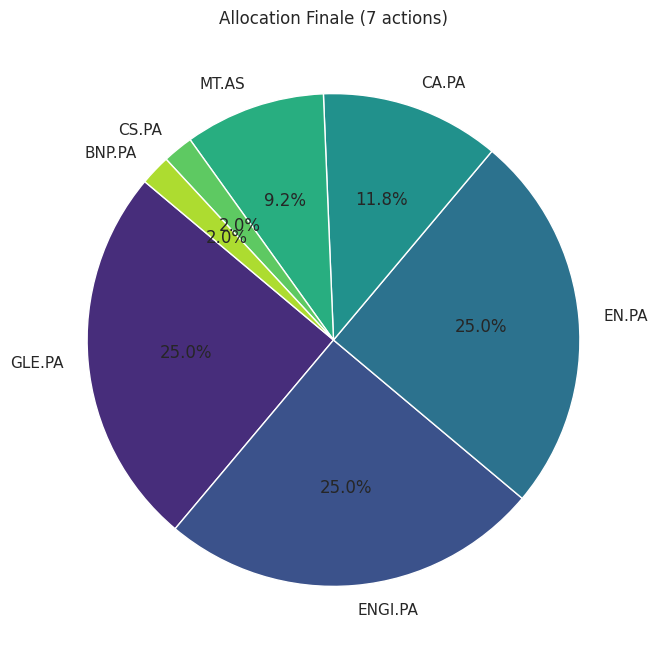

👉 Ces actions ont généré la performance finale de votre courbe.


In [ ]:
print("\n" + "="*60)
print(f"💰 COMPOSITION DU DERNIER PORTEFEUILLE ({start_date.date()})")
print("="*60)

if 'weights' in locals() and len(weights) > 0:
    # Création d'un tableau propre
    final_allocation = pd.DataFrame.from_dict(weights, orient='index', columns=['Poids'])
    final_allocation['Poids %'] = (final_allocation['Poids'] * 100).map('{:.2f}%'.format)
    final_allocation = final_allocation.sort_values('Poids', ascending=False)
    
    # Ajout des infos de performance récente (si dispo)
    try:
        last_prices = adj_close_df.iloc[-1][final_allocation.index]
        prev_prices = adj_close_df.iloc[-20][final_allocation.index] # Performance 1 mois
        perf_1m = (last_prices / prev_prices - 1) * 100
        final_allocation['Perf 1M'] = perf_1m.map('{:+.2f}%'.format)
    except:
        pass

    print(final_allocation[['Poids %']])
    
    # Petit graphique camembert
    plt.figure(figsize=(8, 8))
    plt.pie(final_allocation['Poids'], labels=final_allocation.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(weights)))
    plt.title(f"Allocation Finale ({len(weights)} actions)")
    plt.show()

    print(f"👉 Ces actions ont généré la performance finale de votre courbe.")
else:
    print("❌ Pas de portefeuille en mémoire.")

In [ ]:
print("\n" + "="*80)
print("🔮 SCANNER : RECOMMANDATIONS POUR DEMAIN")
print("="*80)

# 1. On prend les données les plus récentes
last_date = df_ml.index.get_level_values(0).max()
print(f"📅 Date d'analyse : {last_date}")

# 2. On filtre les candidats
candidates = df_ml.loc[last_date].copy()

# On applique vos critères (Cluster 3 + Proba > 0.65)
top_picks = candidates[
    (candidates['cluster'] == 3) & 
    (candidates['proba_hausse'] >= 0.60) # On peut ajuster ce seuil
].sort_values('proba_hausse', ascending=False)

print(f"🔎 Actions détectées : {len(top_picks)}")

if len(top_picks) > 0:
    print("\n🏆 TOP SÉLECTION (IA + CLUSTER 3) :")
    display_cols = ['proba_hausse', 'close', 'rsi', 'volume'] # Colonnes à afficher
    # On gère si certaines colonnes n'existent pas
    cols = [c for c in display_cols if c in top_picks.columns]
    
    print(top_picks[cols].head(10))
    
    # 3. Optimisation Markowitz sur cette sélection
    tickers = top_picks.index.tolist()[:15] # On garde les 15 meilleures max
    
    # On récupère les prix historiques
    hist_prices = adj_close_df[tickers].tail(252).dropna(axis=1)
    
    if len(hist_prices.columns) >= 4:
        print("\n⚖️ CALCUL DE L'ALLOCATION OPTIMALE (MARKOWITZ)...")
        w, success = optimize_weights_pro(hist_prices) # On réutilise votre fonction
        
        if success:
            alloc = pd.Series(w).sort_values(ascending=False)
            print("\n✅ VOTRE PORTEFEUILLE IDÉAL À CONSTITUER :")
            print("-" * 40)
            for ticker, weight in alloc.items():
                prob = top_picks.loc[ticker, 'proba_hausse']
                print(f"  🛒 {ticker:<10} : {weight*100:5.2f}%  (Confiance IA: {prob:.1%})")
            print("-" * 40)
        else:
            print("⚠️ Optimisation échouée, faites une équipondération.")
    else:
        print("⚠️ Pas assez d'historique de prix pour optimiser les poids.")
else:
    print("❌ Aucun signal d'achat détecté pour la date la plus récente.")


🔮 SCANNER : RECOMMANDATIONS POUR DEMAIN
📅 Date d'analyse : 2025-12-31 00:00:00
🔎 Actions détectées : 9

🏆 TOP SÉLECTION (IA + CLUSTER 3) :
         proba_hausse        rsi
ticker                          
EN.PA        0.692197  64.762593
CS.PA        0.690789  65.868915
BNP.PA       0.688343  68.136178
CA.PA        0.683408  64.167804
GLE.PA       0.662370  71.921470
ENGI.PA      0.655913  63.399260
MT.AS        0.653316  62.526394
ERF.PA       0.635622  61.621602
ALO.PA       0.635246  63.503710

⚖️ CALCUL DE L'ALLOCATION OPTIMALE (MARKOWITZ)...

✅ VOTRE PORTEFEUILLE IDÉAL À CONSTITUER :
----------------------------------------
  🛒 EN.PA      : 22.22%  (Confiance IA: 69.2%)
  🛒 GLE.PA     : 22.22%  (Confiance IA: 66.2%)
  🛒 ENGI.PA    : 22.22%  (Confiance IA: 65.6%)
  🛒 ERF.PA     : 10.07%  (Confiance IA: 63.6%)
  🛒 CA.PA      :  8.87%  (Confiance IA: 68.3%)
  🛒 MT.AS      :  8.40%  (Confiance IA: 65.3%)
  🛒 BNP.PA     :  2.00%  (Confiance IA: 68.8%)
  🛒 CS.PA      :  2.00%  (Confian

In [ ]:
# =============================================================================
# TEST : Performance par cluster
# =============================================================================

print("\n🧪 TEST : Performance moyenne par cluster\n")

for cluster in sorted(data['cluster'].unique()):
    cluster_data = data[data['cluster'] == cluster]
    avg_return = cluster_data['return_1m'].mean()
    median_return = cluster_data['return_1m'].median()
    count = len(cluster_data)
    
    print(f"Cluster {cluster} :")
    print(f"   Return moyen   : {avg_return*100:+.2f}%")
    print(f"   Return médian  : {median_return*100:+.2f}%")
    print(f"   Observations   : {count:,}")
    print()

# Identifier le MEILLEUR cluster
best_cluster = data.groupby('cluster')['return_1m'].mean().idxmax()
print(f"🏆 Meilleur cluster : {best_cluster}")


🧪 TEST : Performance moyenne par cluster

Cluster 0 :
   Return moyen   : -7.23%
   Return médian  : -6.38%
   Observations   : 681

Cluster 1 :
   Return moyen   : -1.77%
   Return médian  : -1.78%
   Observations   : 1,312

Cluster 2 :
   Return moyen   : +3.07%
   Return médian  : +2.77%
   Observations   : 1,413

Cluster 3 :
   Return moyen   : +33.62%
   Return médian  : +7.71%
   Observations   : 708

🏆 Meilleur cluster : 3


## EXPORTS MODELS

In [ ]:
import pickle
import os
from pathlib import Path
from sklearn.cluster import KMeans
import numpy as np

# =============================================================================
# 1. DÉTECTION AUTOMATIQUE DU CHEMIN (ROBUSTE)
# =============================================================================

# On part du dossier actuel
current_path = Path(os.getcwd())
print(f"📍 Position actuelle : {current_path}")


project_root = current_path
while not (project_root / 'app.py').exists():
    if project_root == project_root.parent: # Sécurité pour ne pas boucler à l'infini
        print("⚠️ Attention : Racine du projet non trouvée via app.py.")
        # Fallback : on suppose qu'on est à 3 niveaux de profondeur comme prévu
        project_root = Path(os.path.abspath(os.path.join(os.getcwd(), "../../..")))
        break
    project_root = project_root.parent

print(f"🏠 Racine du projet détectée : {project_root}")

# On définit le dossier cible : RACINE / src / model
target_path = project_root / "src" / "model"

# On crée le dossier (avec parents=True pour créer src si besoin)
target_path.mkdir(parents=True, exist_ok=True)
print(f"📂 Dossier de sauvegarde validé : {target_path}")


# =============================================================================
# 2. EXPORT XGBOOST
# =============================================================================
if 'best_model' in globals():
    model_to_save = best_model
    name = "XGBoost Optimisé"
elif 'xgb_clf' in globals():
    model_to_save = xgb_clf
    name = "XGBoost Standard"
else:
    raise ValueError("❌ Erreur : Le modèle XGBoost n'est pas en mémoire. Lancez l'entraînement d'abord.")

file_xgb = target_path / 'xgboost_model.pkl'
with open(file_xgb, 'wb') as f:
    pickle.dump(model_to_save, f)
print(f"✅ Modèle sauvegardé : {file_xgb}")


# =============================================================================
# 3. EXPORT KMEANS (GLOBAL)
# =============================================================================
print("⚙️ Entraînement KMeans Global...")

# Recréation du modèle KMeans sur tout l'historique disponible dans 'data'
# Assurez-vous que votre variable 'data' existe et contient la colonne 'rsi'
if 'data' in globals() and 'rsi' in data.columns:
    rsi_centroids = np.array([[30], [45], [55], [70]])
    kmeans_global = KMeans(n_clusters=4, init=rsi_centroids, n_init=1, random_state=0)
    
    # Entraînement sur les données nettoyées
    kmeans_global.fit(data[['rsi']].dropna()) 

    file_kmeans = target_path / 'kmeans_model.pkl'
    with open(file_kmeans, 'wb') as f:
        pickle.dump(kmeans_global, f)
    print(f"✅ Modèle sauvegardé : {file_kmeans}")
else:
    print("❌ Erreur : Variable 'data' ou colonne 'rsi' introuvable pour le KMeans.")

📍 Position actuelle : /home/onyxia/work/Gestion-portefeuille/notebooks
🏠 Racine du projet détectée : /home/onyxia/work/Gestion-portefeuille
📂 Dossier de sauvegarde validé : /home/onyxia/work/Gestion-portefeuille/src/model
✅ Modèle sauvegardé : /home/onyxia/work/Gestion-portefeuille/src/model/xgboost_model.pkl
⚙️ Entraînement KMeans Global...
✅ Modèle sauvegardé : /home/onyxia/work/Gestion-portefeuille/src/model/kmeans_model.pkl


## XGboost perfs

In [ ]:
import json
import os
from pathlib import Path
import numpy as np
import pandas as pd

# =============================================================================
# 1. DÉTECTION AUTOMATIQUE DU DOSSIER 'src/models'
# =============================================================================
# On cherche la racine du projet en remontant jusqu'à trouver 'app.py' ou '.git'
current_path = Path(os.getcwd())
project_root = current_path

# On remonte tant qu'on ne trouve pas 'app.py' (max 5 niveaux pour éviter boucle infinie)
steps = 0
while not (project_root / 'app.py').exists() and steps < 5:
    project_root = project_root.parent
    steps += 1

# Si on n'a pas trouvé, on suppose qu'on est dans notebooks/.. et on force le chemin
if not (project_root / 'app.py').exists():
    # Fallback : On suppose l'architecture data/raw/notebooks -> on remonte de 3
    project_root = Path(os.path.abspath(os.path.join(os.getcwd(), "../../..")))

# On cible le dossier 'src/models' (Pluriel, comme sur ton screen)
target_path = project_root / "src" / "models"
target_path.mkdir(parents=True, exist_ok=True)

print(f"📂 Dossier cible identifié : {target_path}")

# =============================================================================
# 2. CONVERSION DES DONNÉES (Pour éviter l'erreur JSON)
# =============================================================================
# Fonction pour transformer les int64/float32 de numpy en int/float python standard
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

metrics_data = {
    "accuracy": final_acc,          
    "auc_score": final_auc,         
    "best_params": best_params,     
    "training_date": pd.Timestamp.now().strftime("%d/%m/%Y")
}

# =============================================================================
# 3. SAUVEGARDE
# =============================================================================
file_path = target_path / 'metrics.json'

try:
    with open(file_path, 'w') as f:
        json.dump(metrics_data, f, cls=NpEncoder, indent=4)
    print(f"✅ Succès ! Métriques sauvegardées dans : {file_path}")
except Exception as e:
    print(f"❌ Erreur lors de la sauvegarde JSON : {e}")

📂 Dossier cible identifié : /home/onyxia/work/Gestion-portefeuille/src/models
✅ Succès ! Métriques sauvegardées dans : /home/onyxia/work/Gestion-portefeuille/src/models/metrics.json
